# Contents
1. [0 and 1 distributions in each features](#0-and-1-distributions-in-each-features)
2. [0 and 1 distributions in outlier features](#0-and-1-distributions-in-outlier-features)
3. [0 and 1 distributions in additional features](#0-and-1-distributions-in-additional-features)

# 0 and 1 distributions in each features

Inspired from [Daniel Möller](https://www.kaggle.com/danmoller)'s comments in discussion [var_12 and var_81
](https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/83848) issued by [Sameh Faidi](https://www.kaggle.com/samehif)

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('../input/train.csv')

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


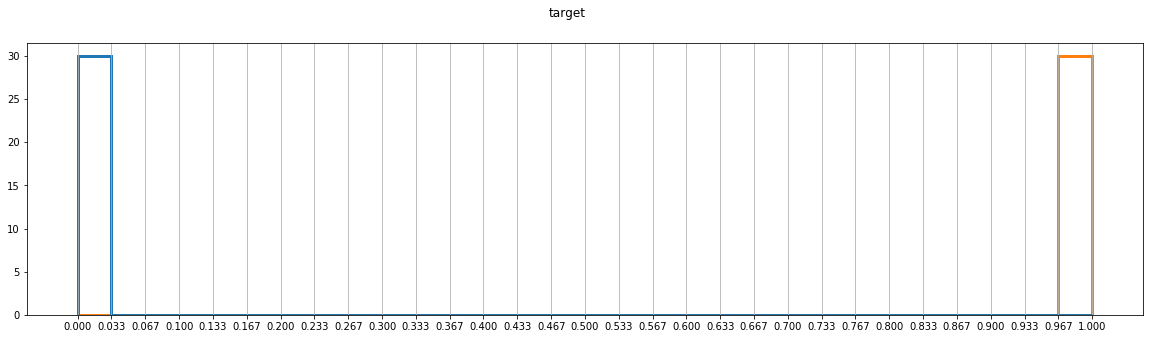

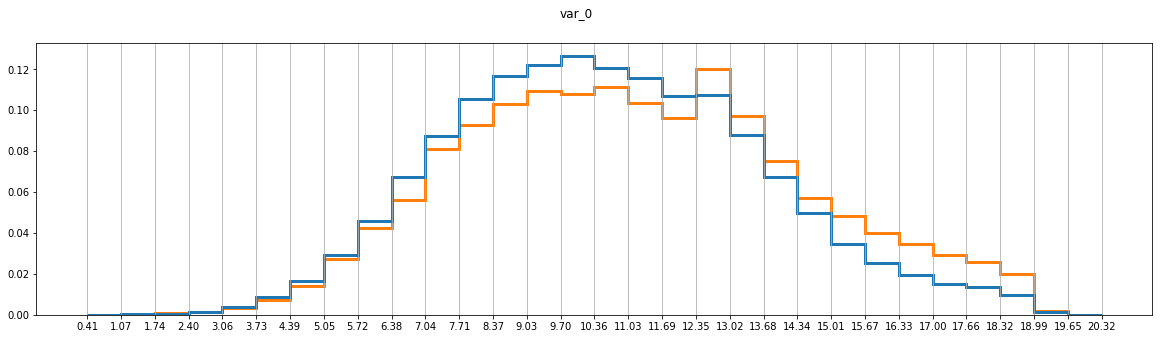

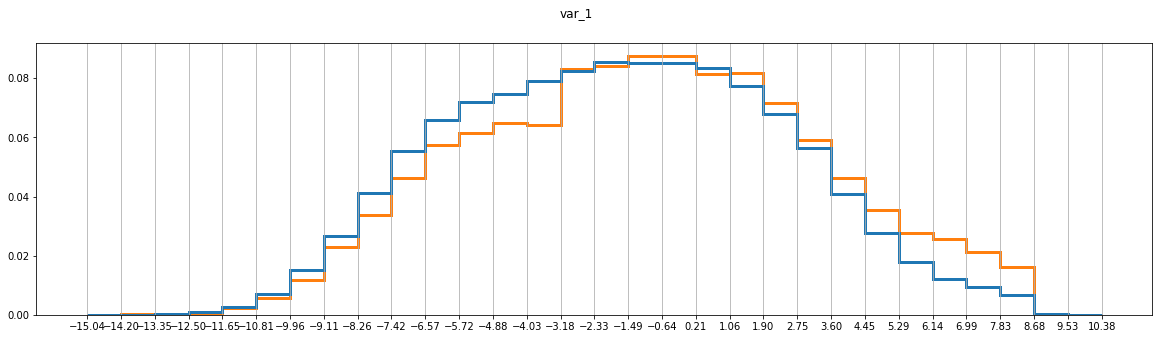

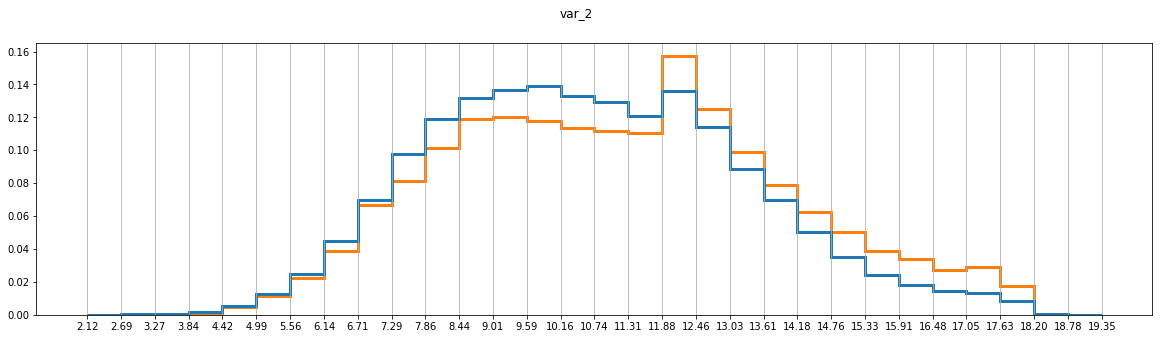

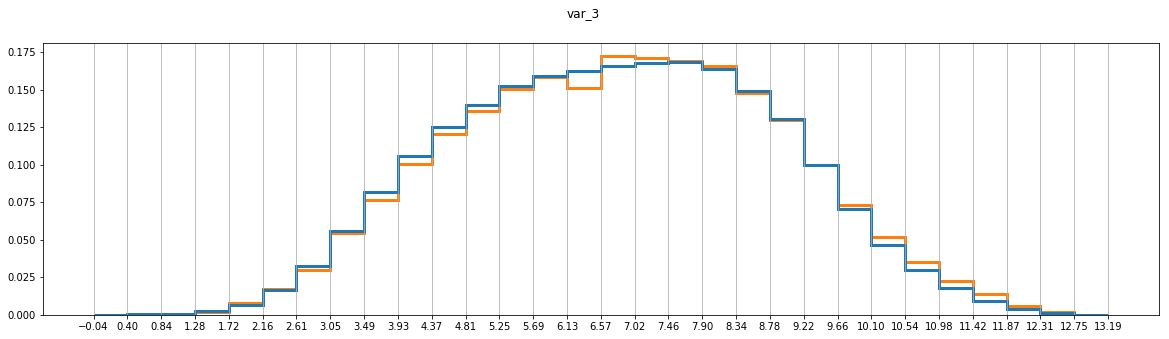

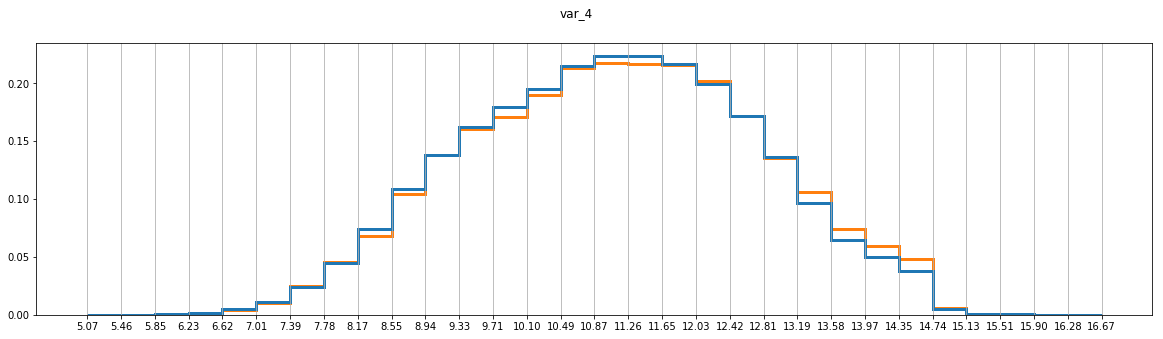

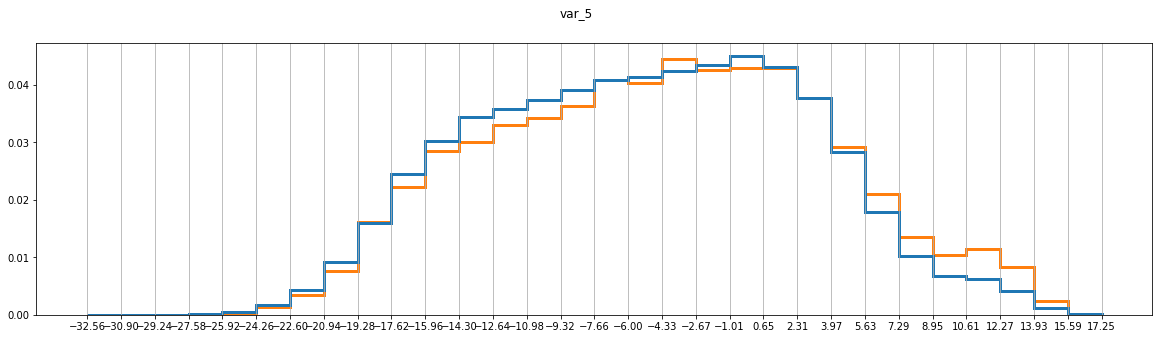

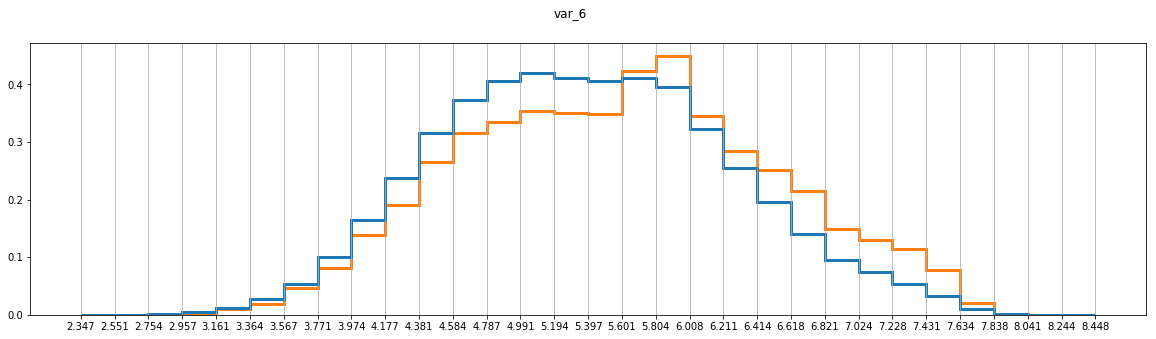

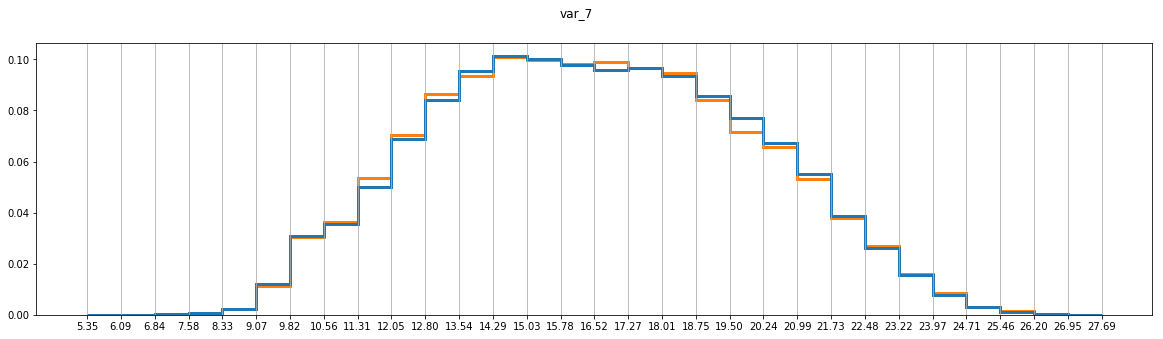

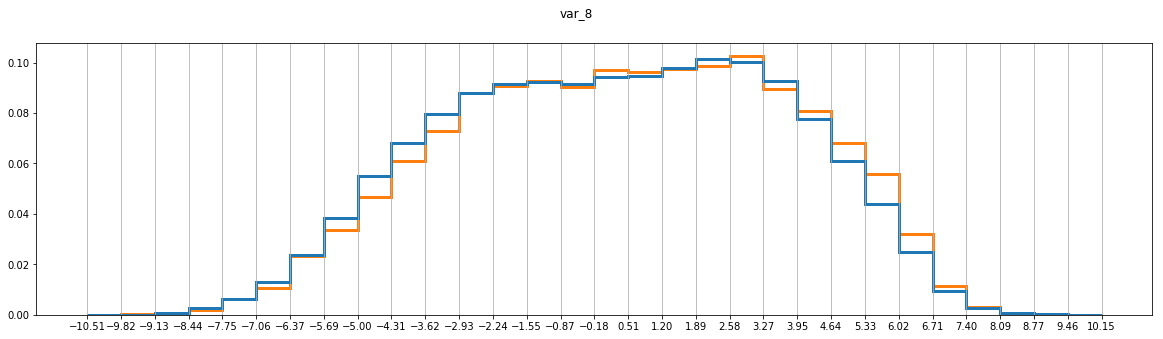

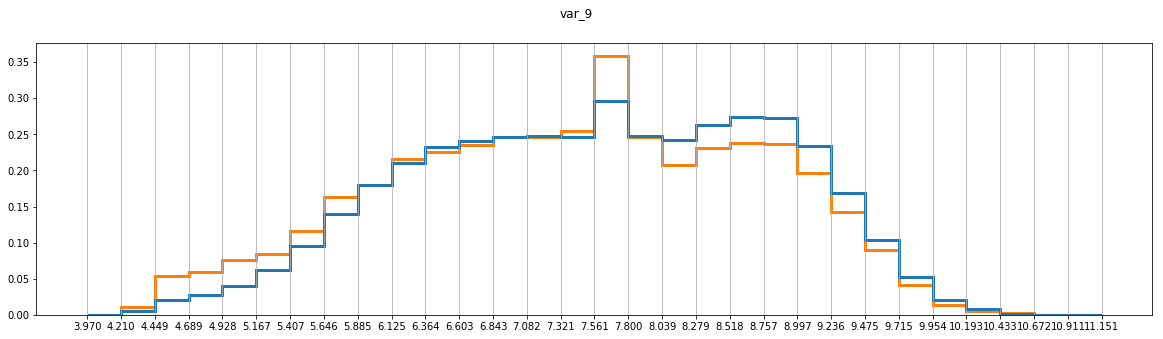

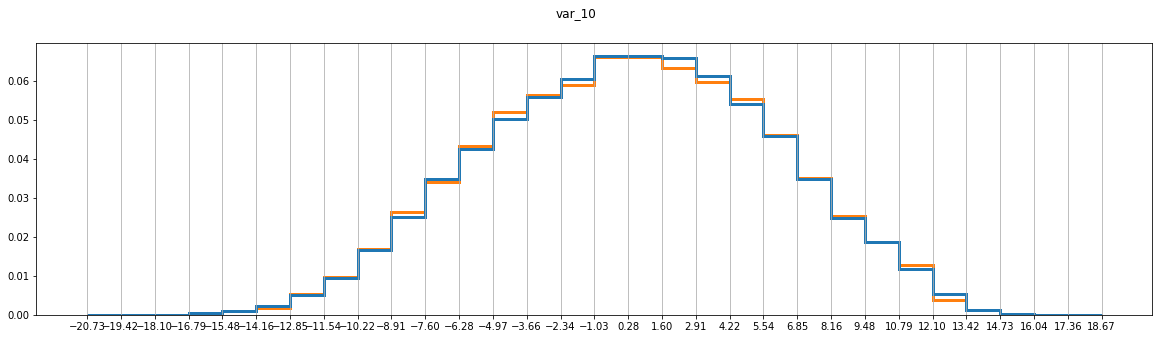

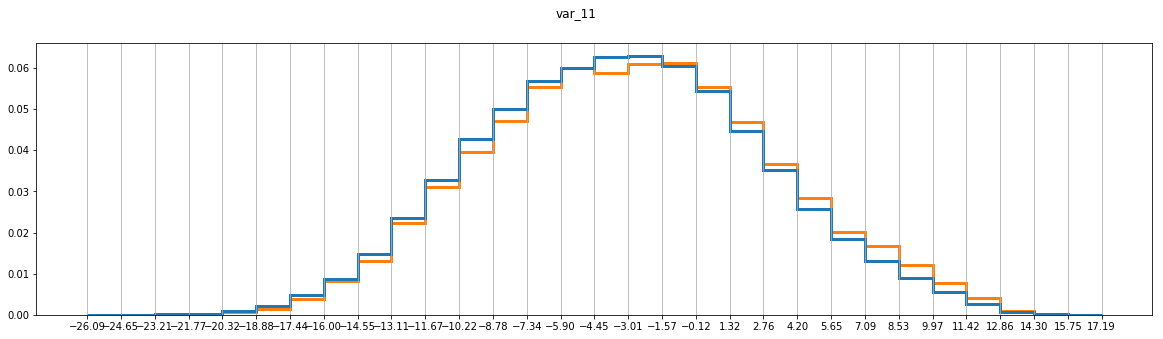

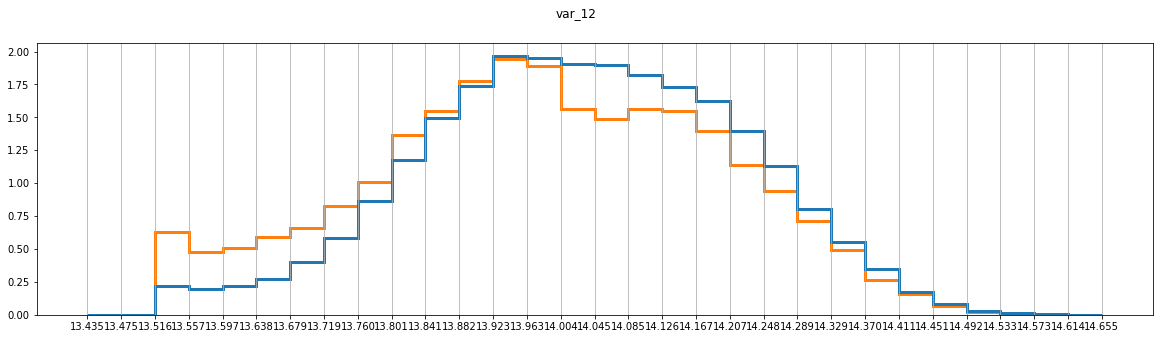

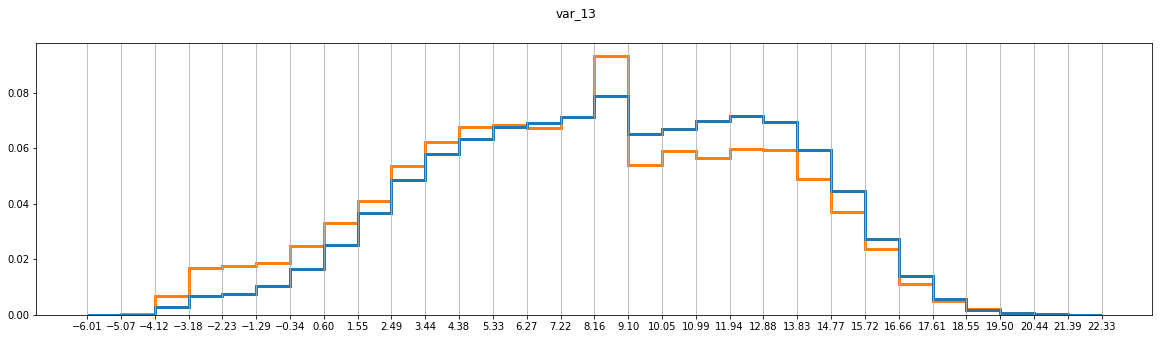

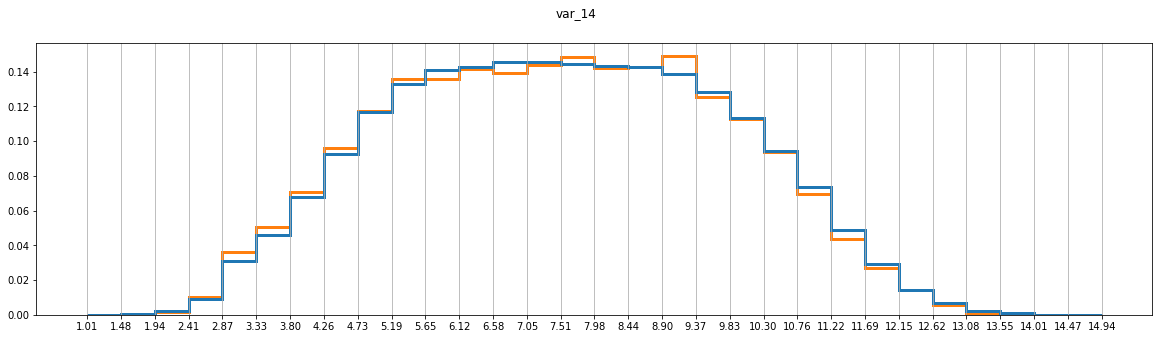

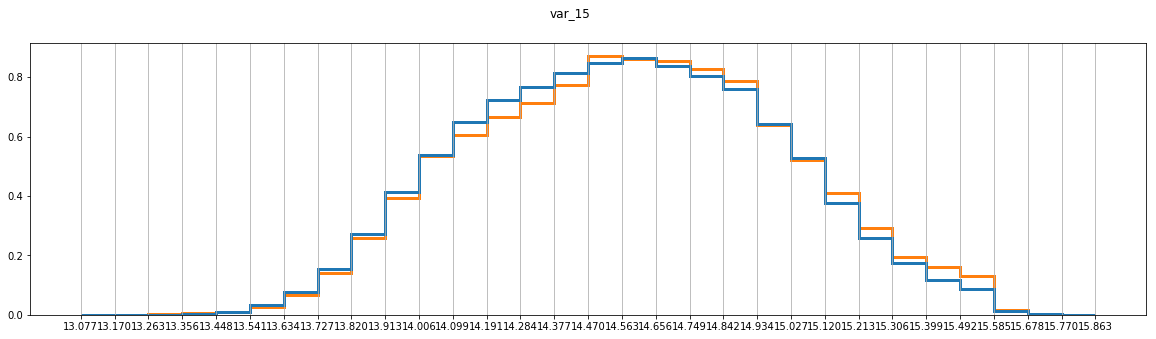

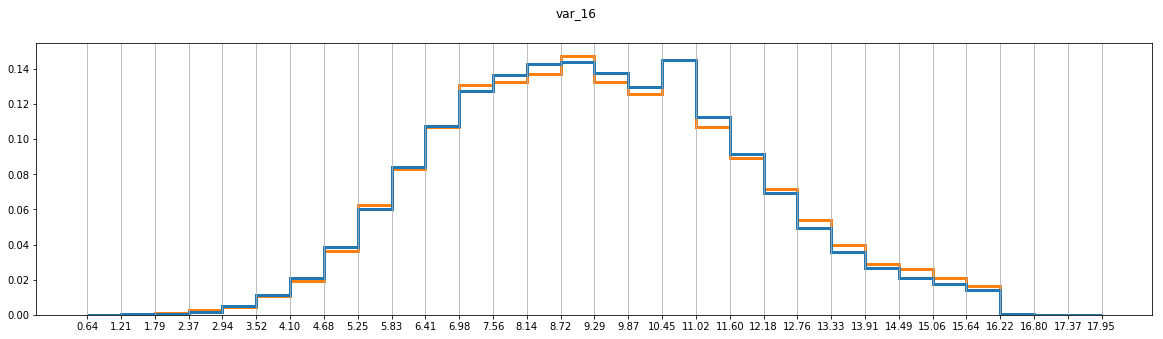

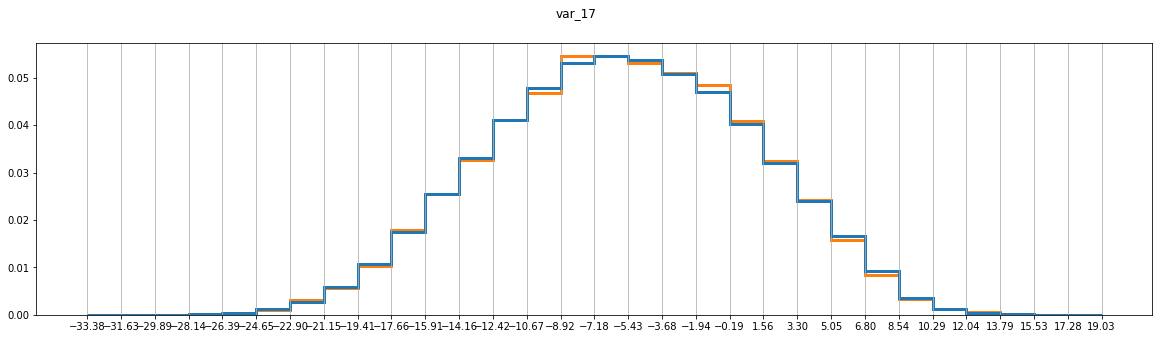

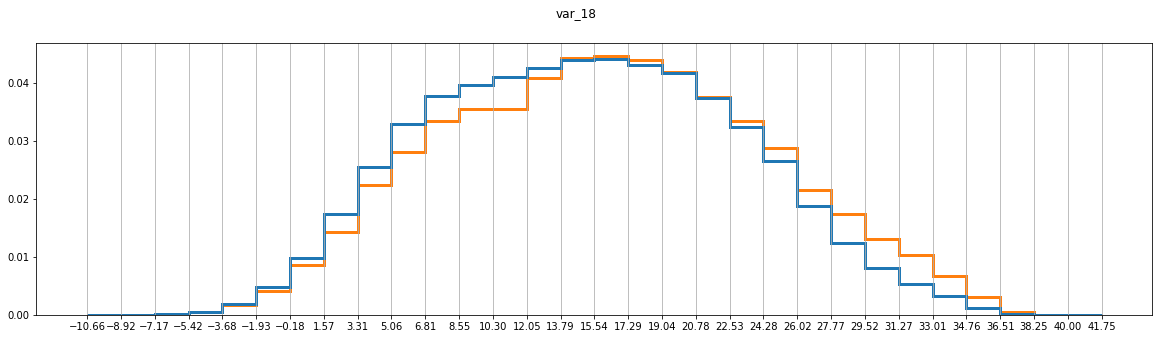

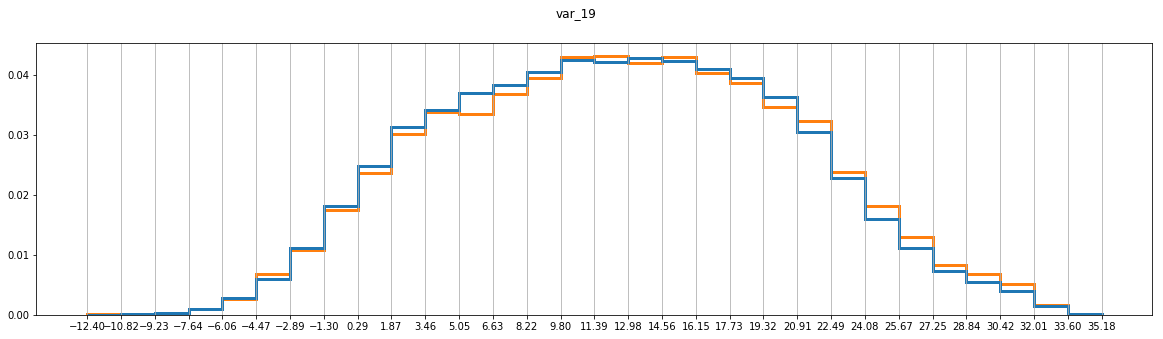

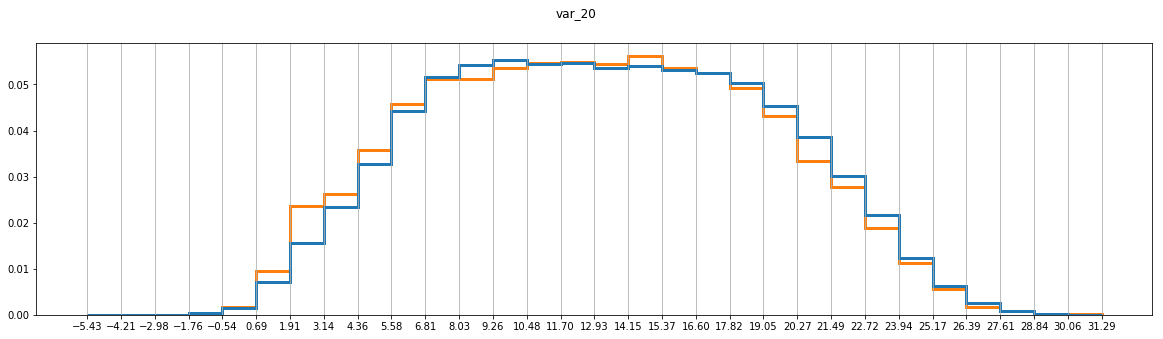

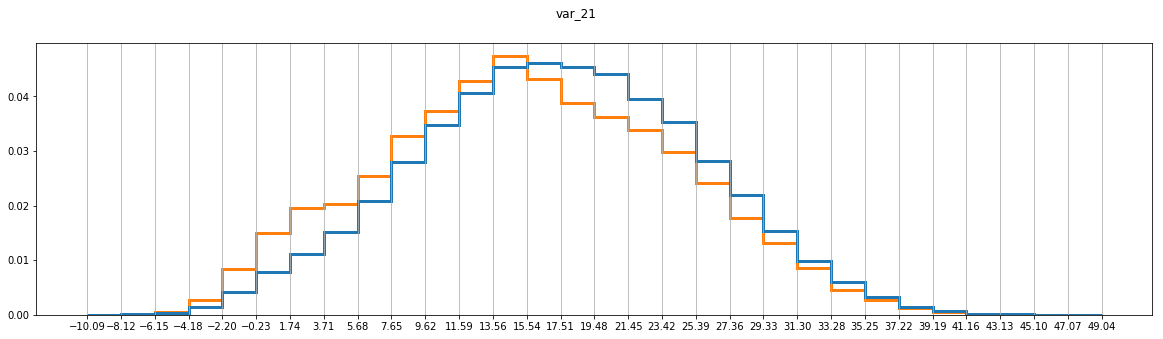

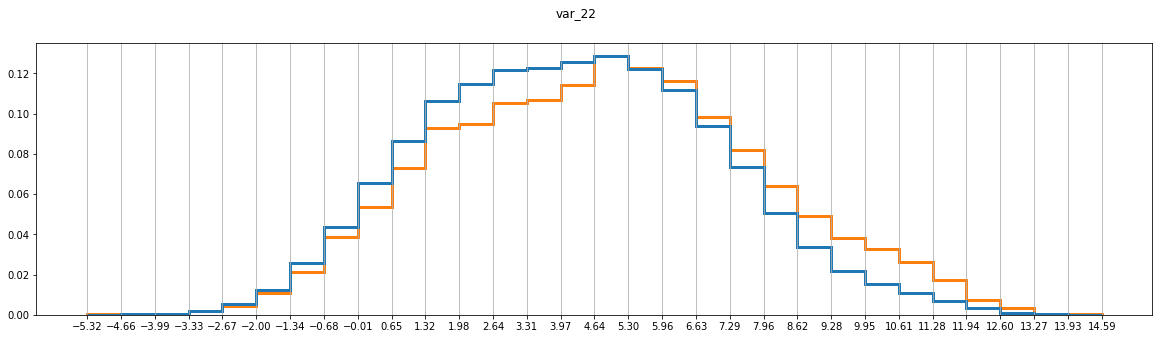

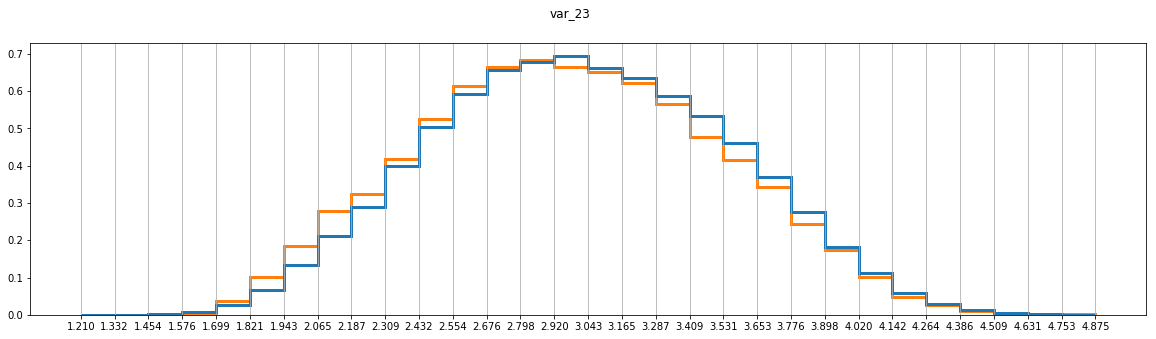

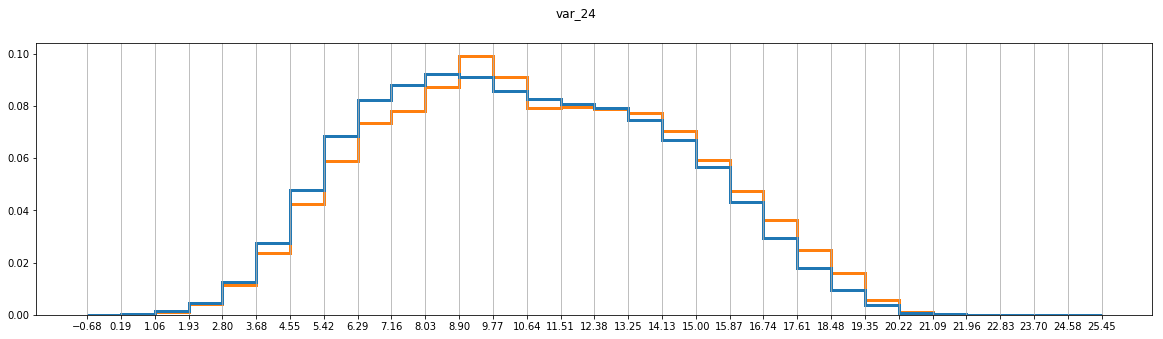

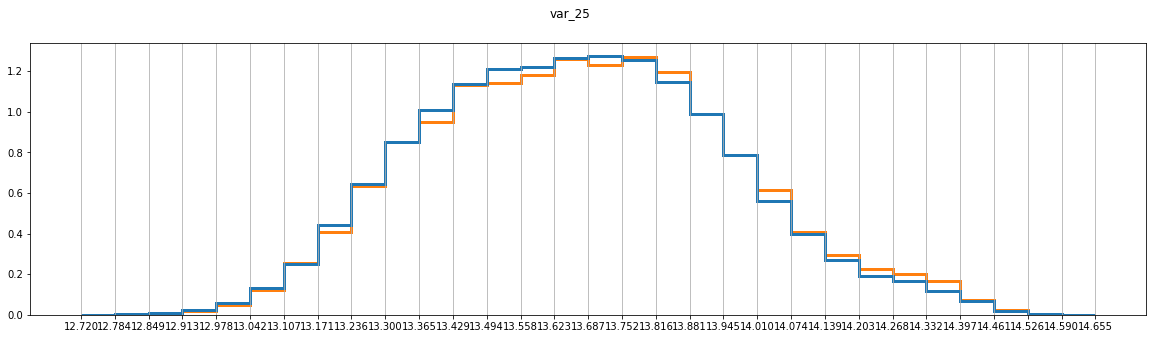

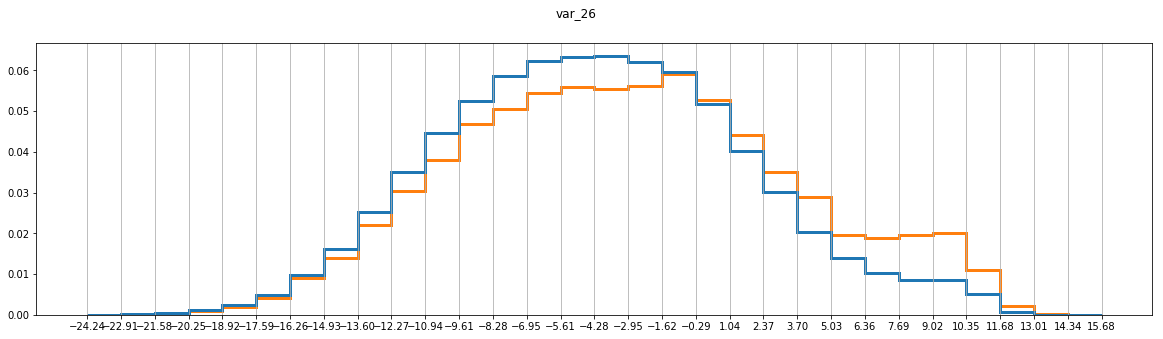

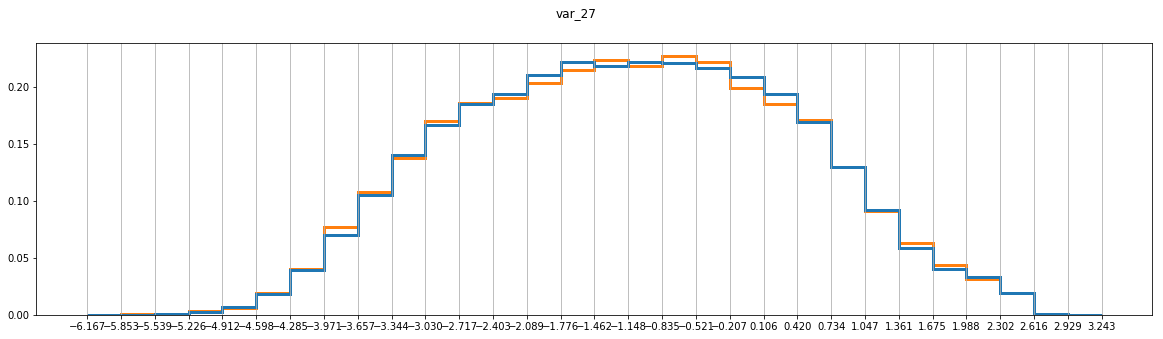

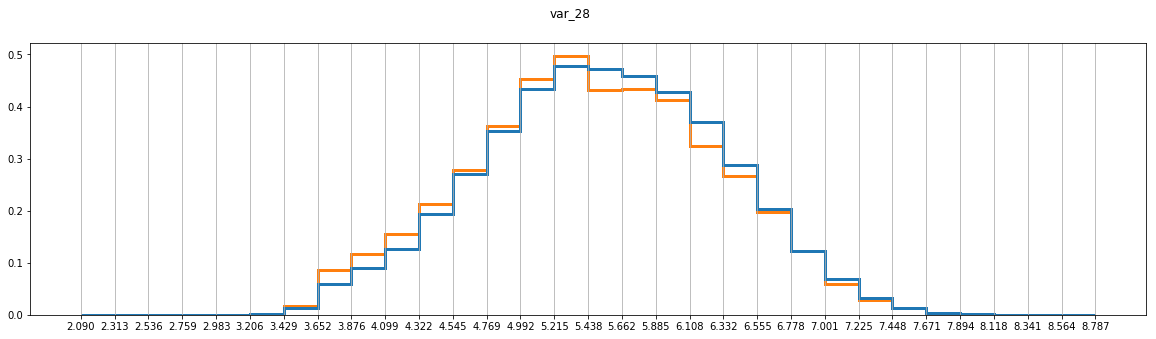

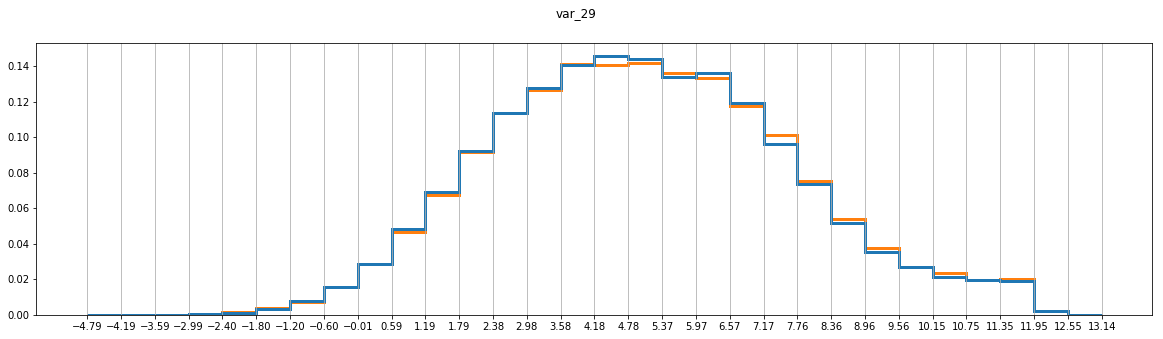

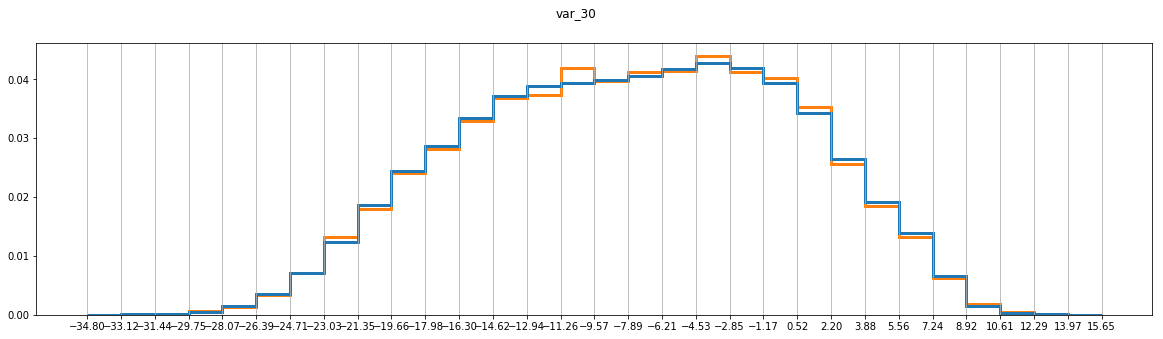

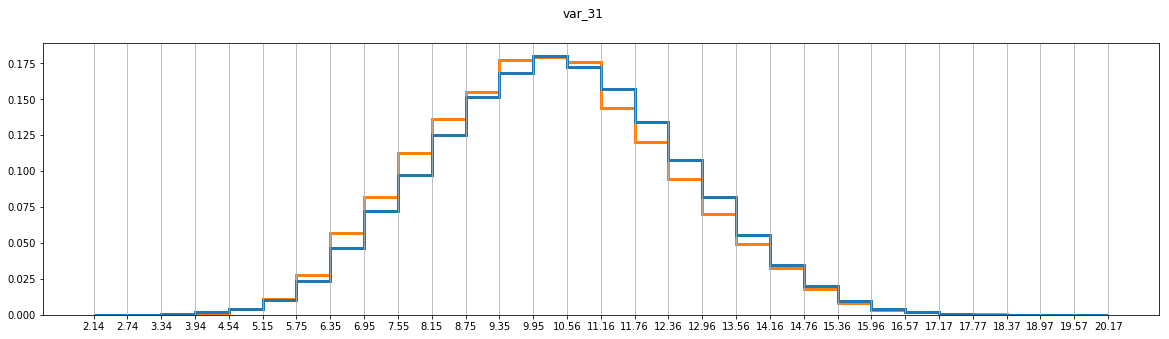

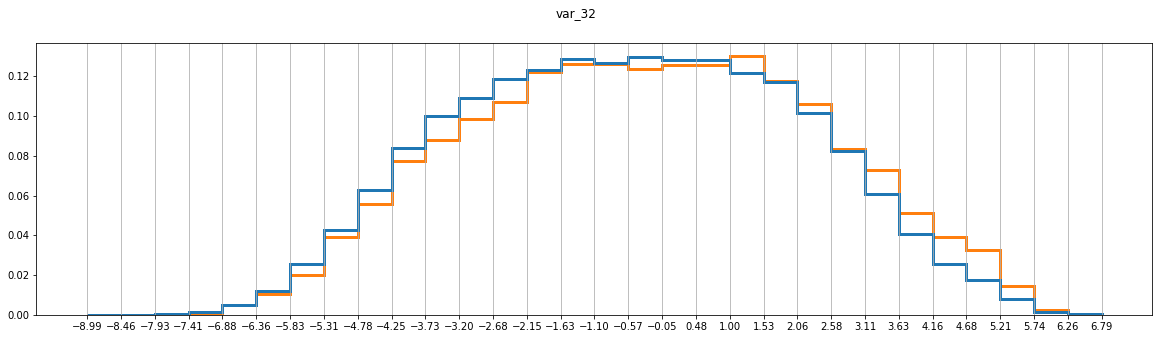

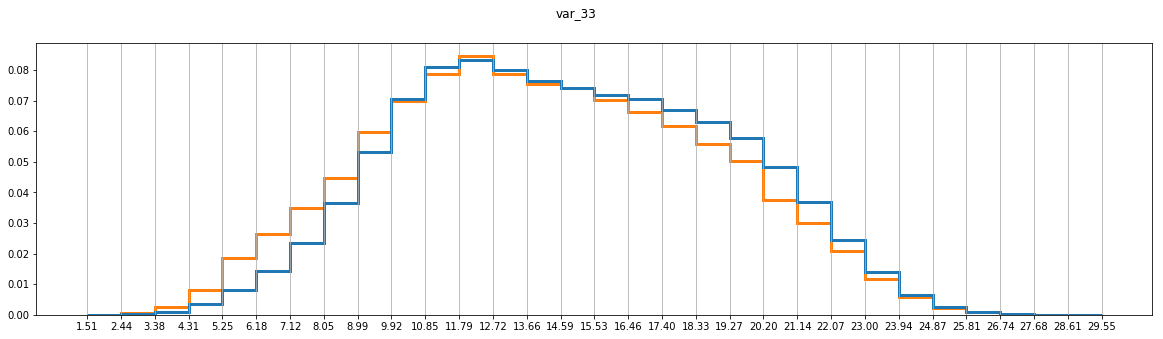

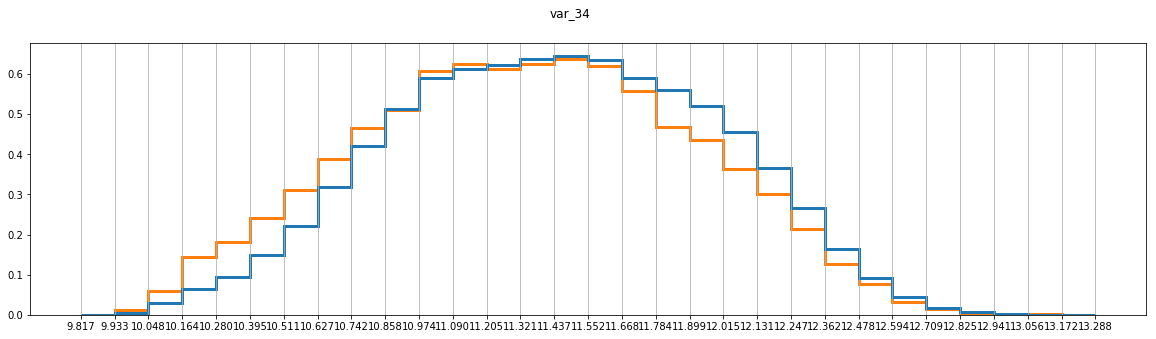

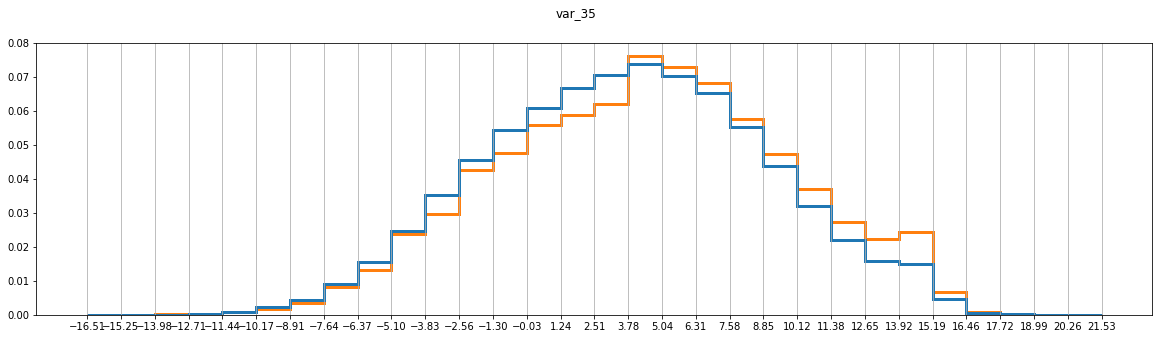

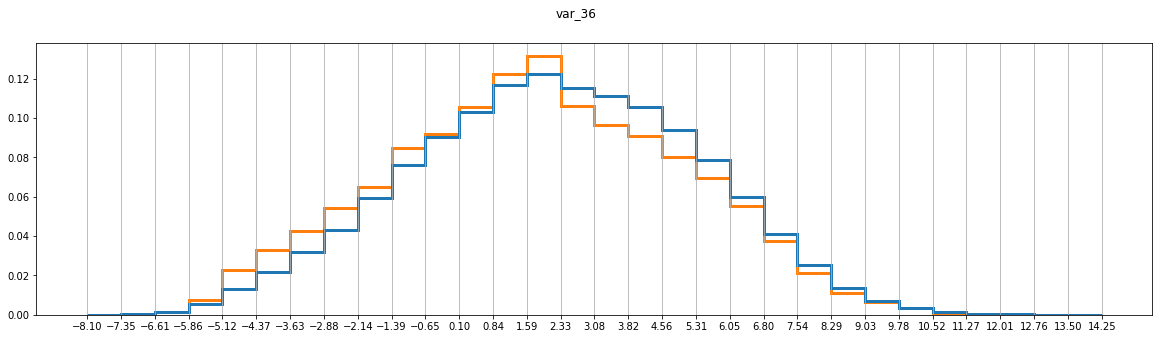

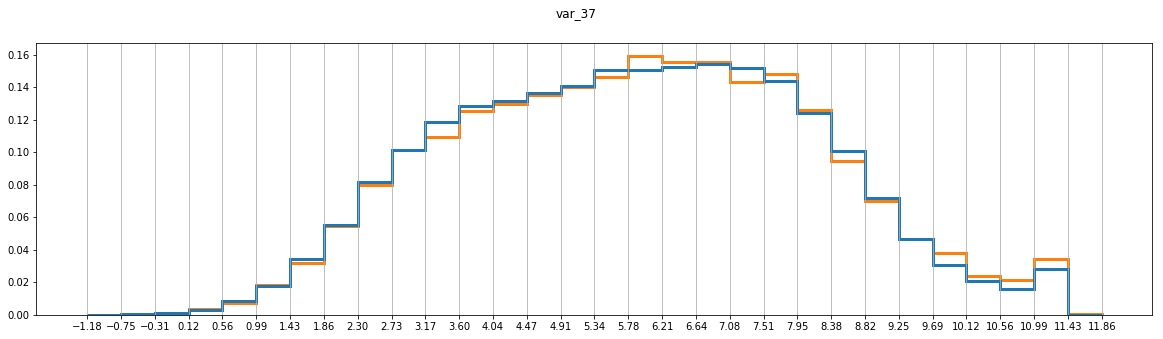

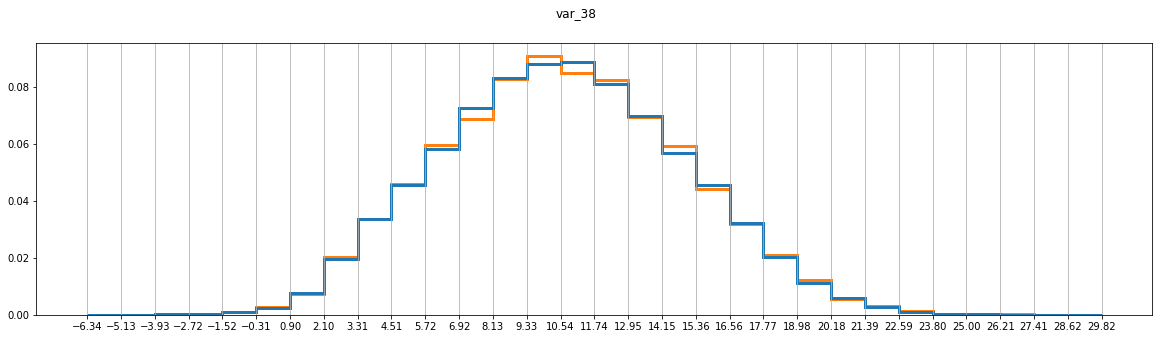

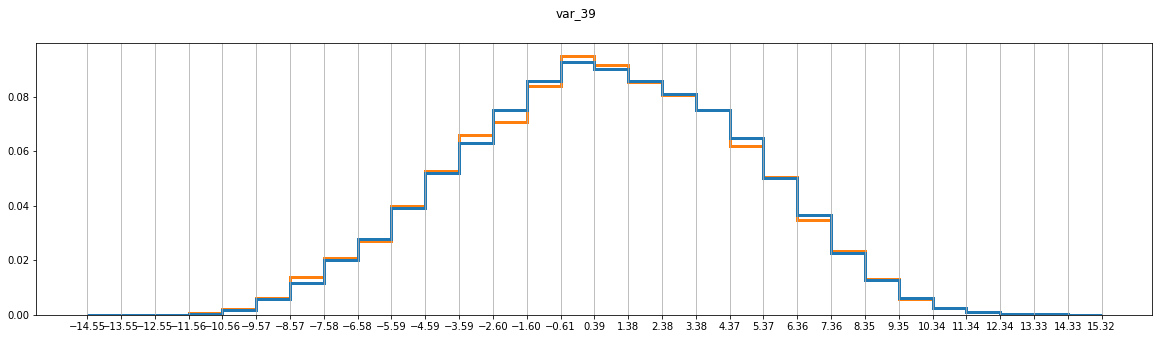

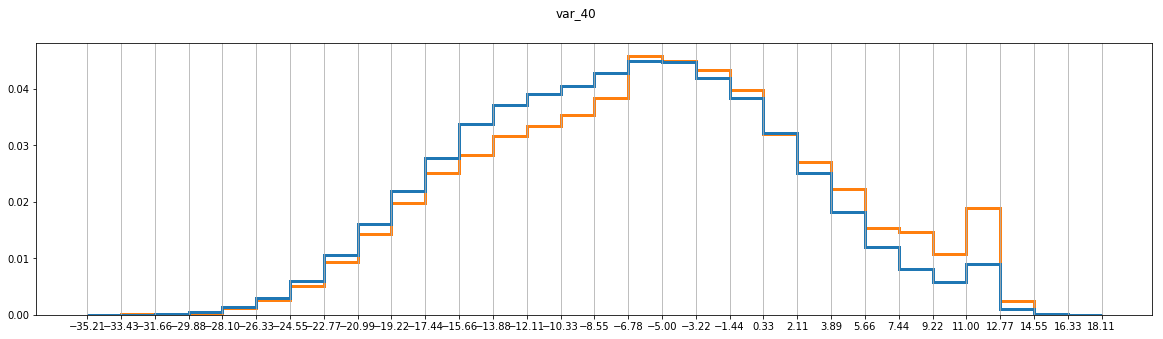

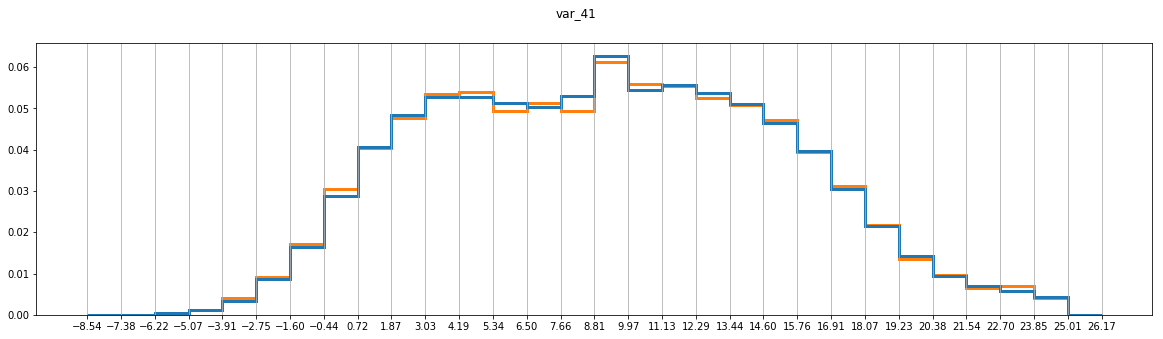

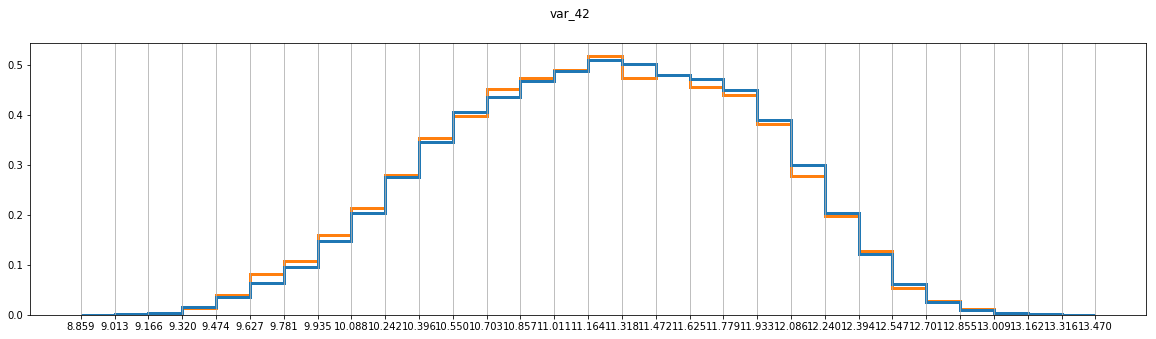

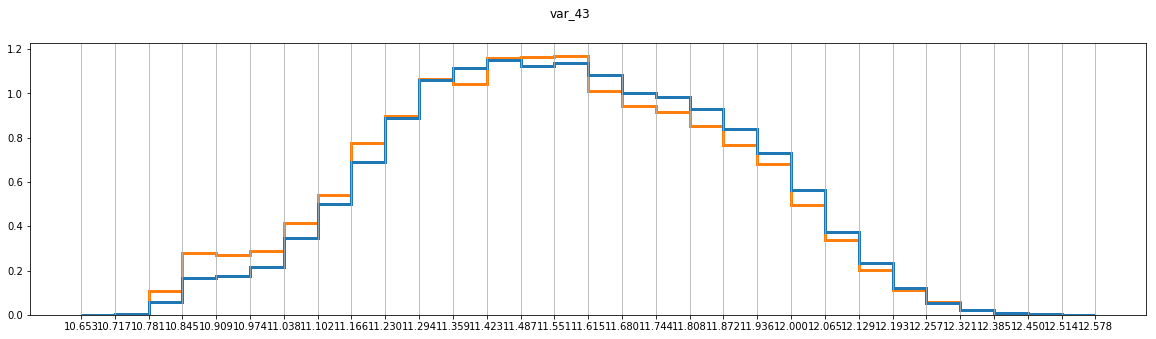

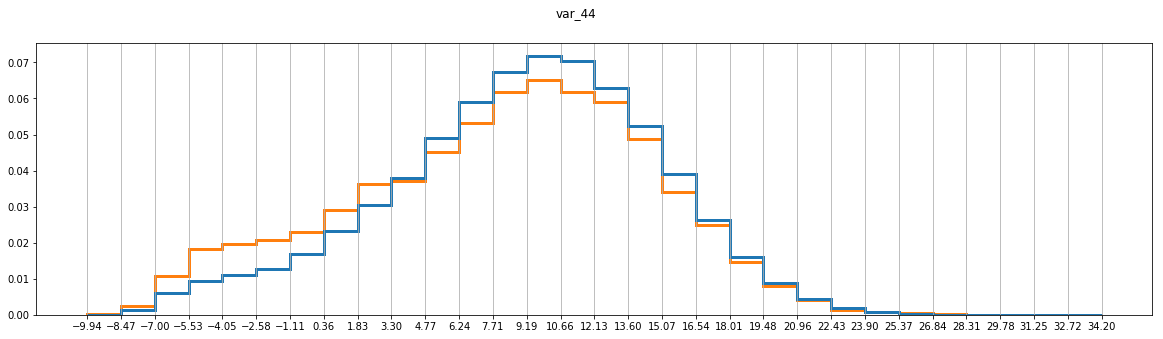

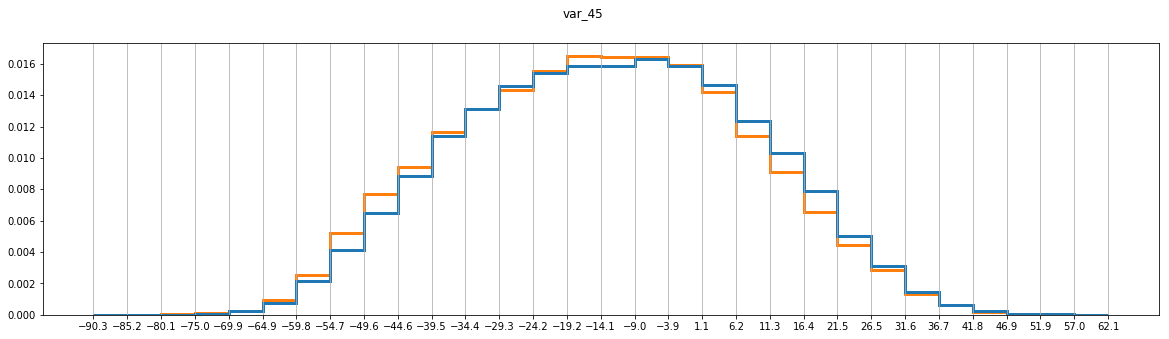

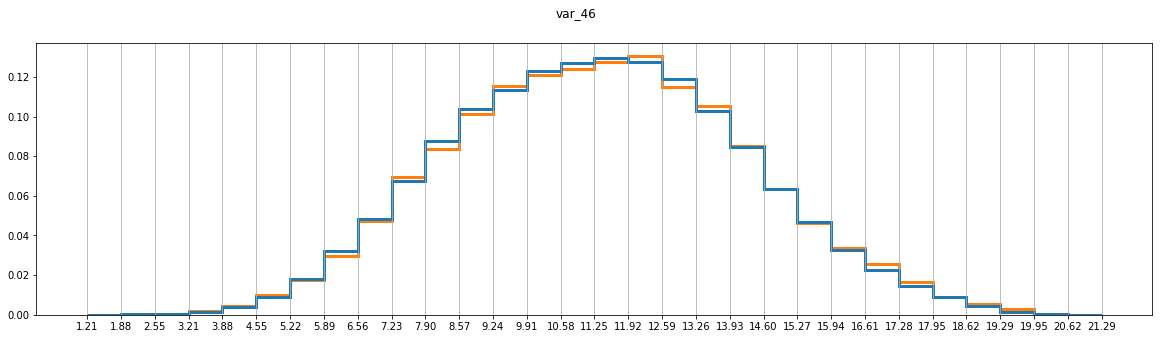

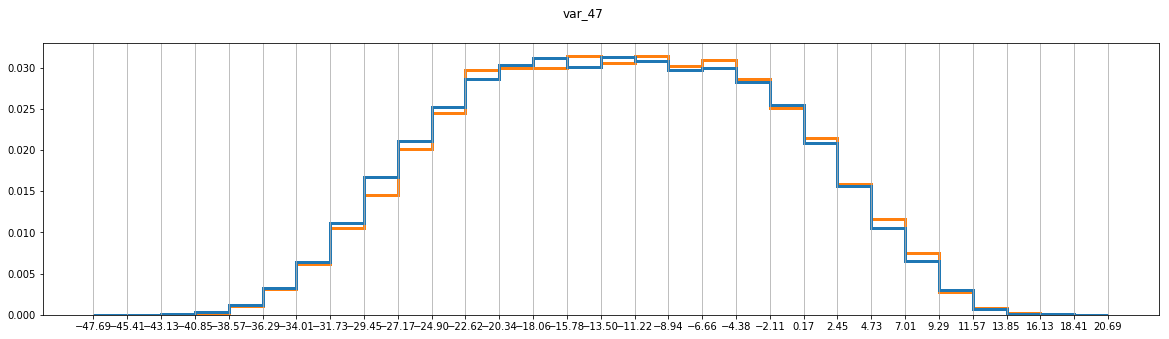

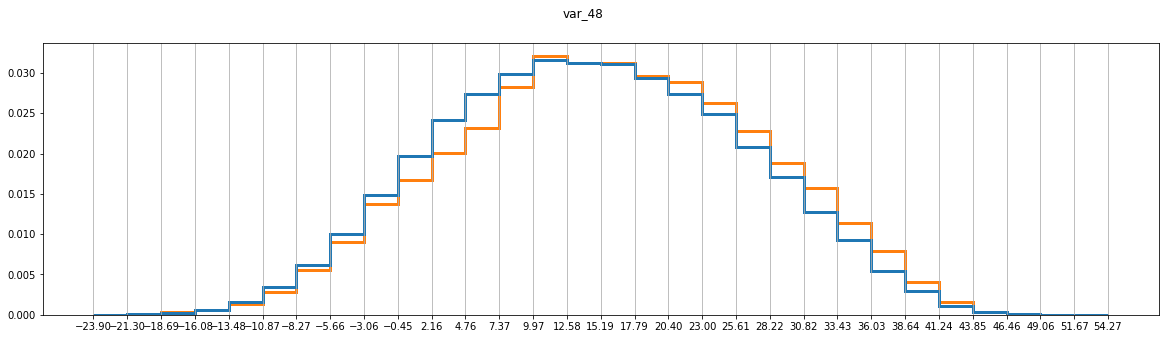

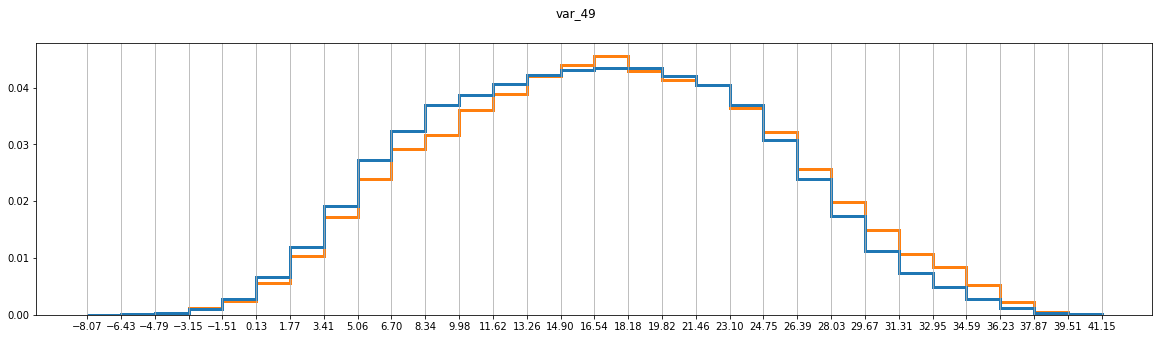

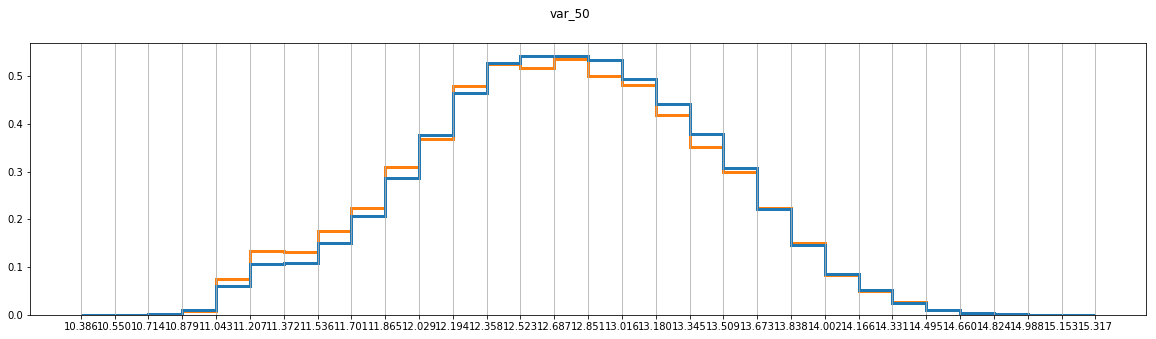

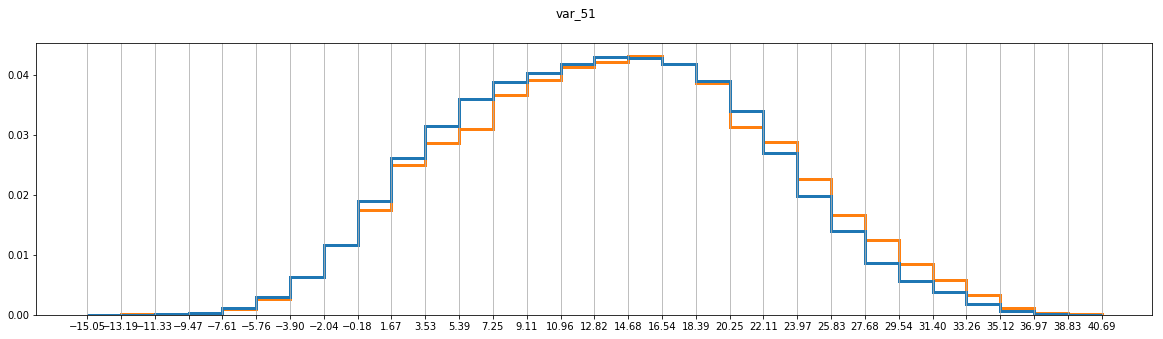

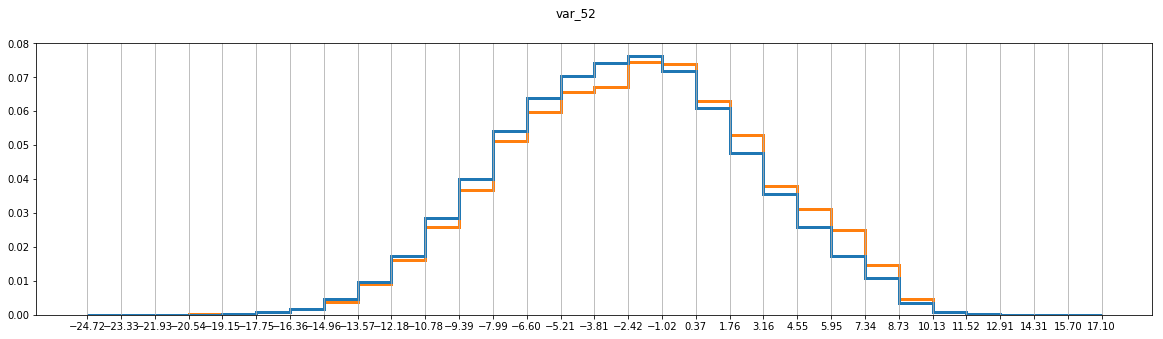

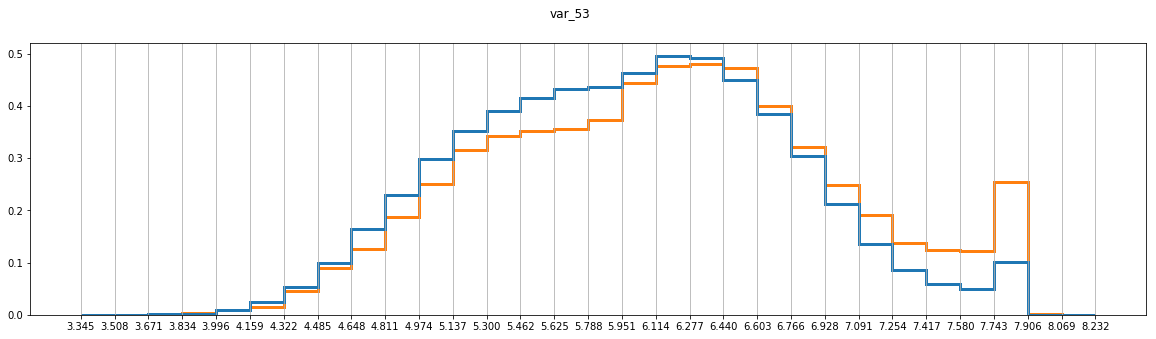

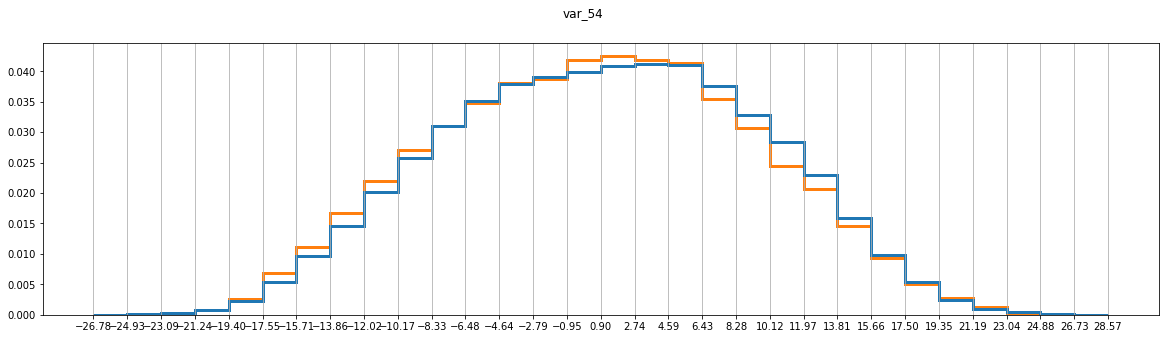

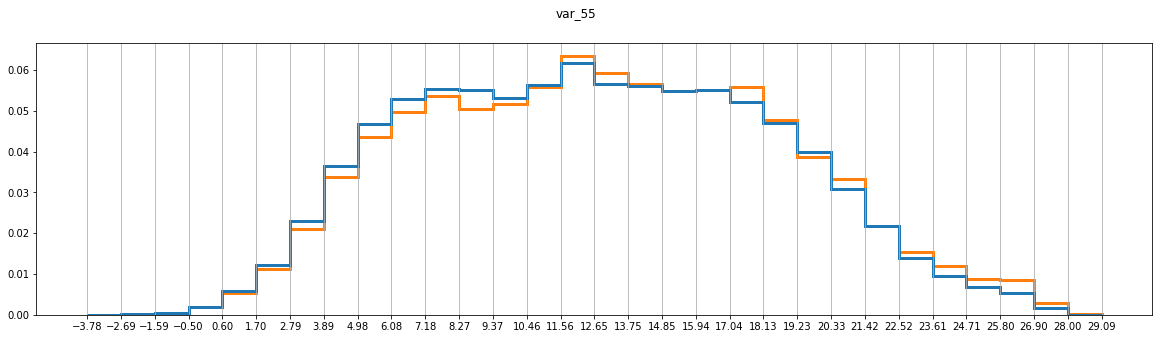

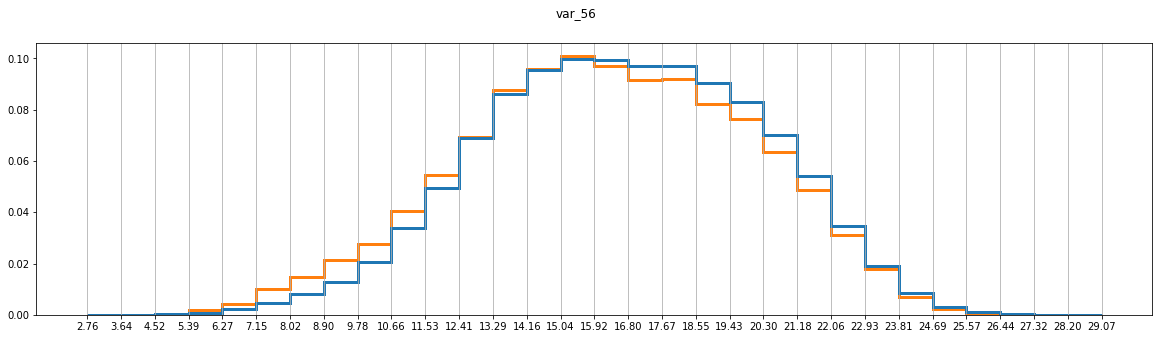

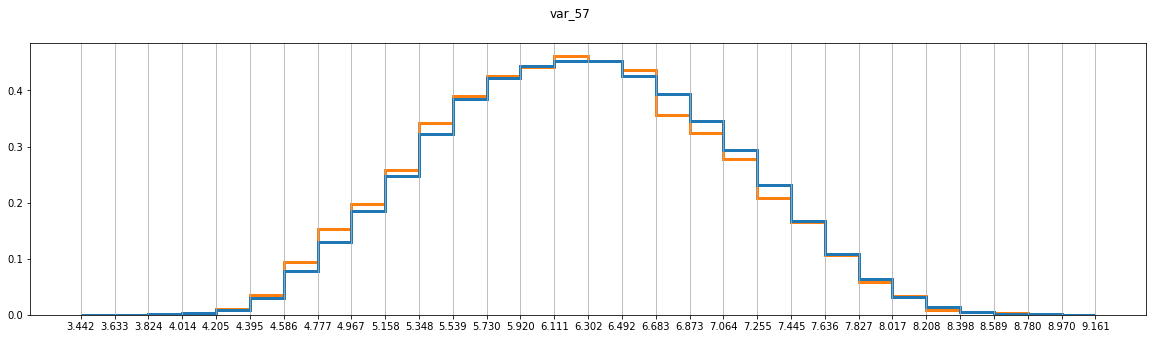

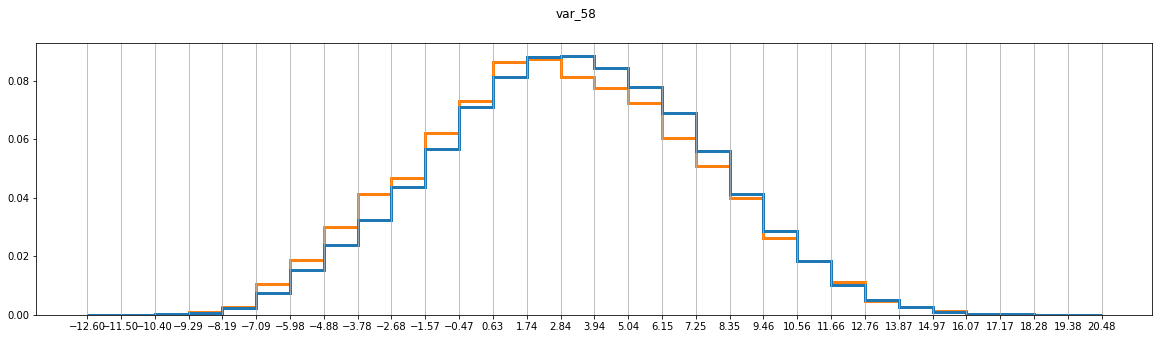

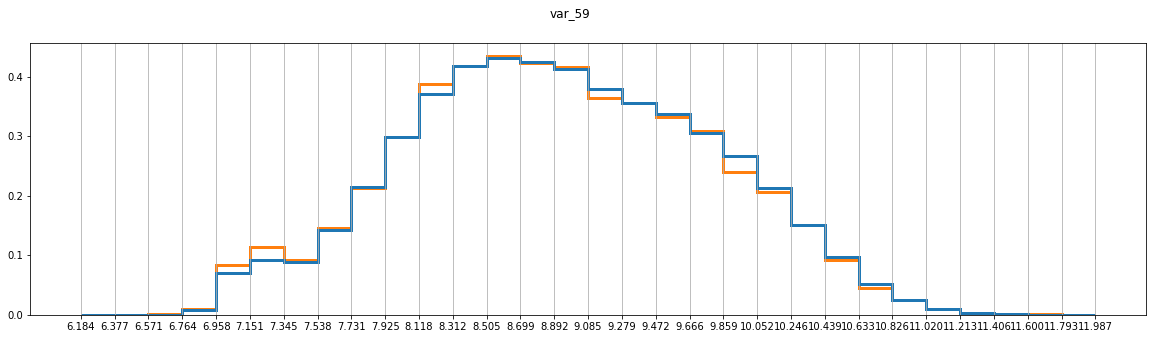

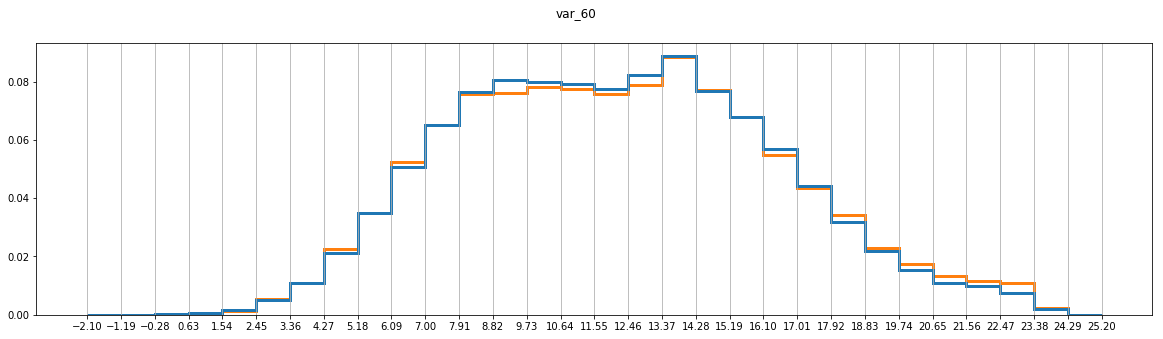

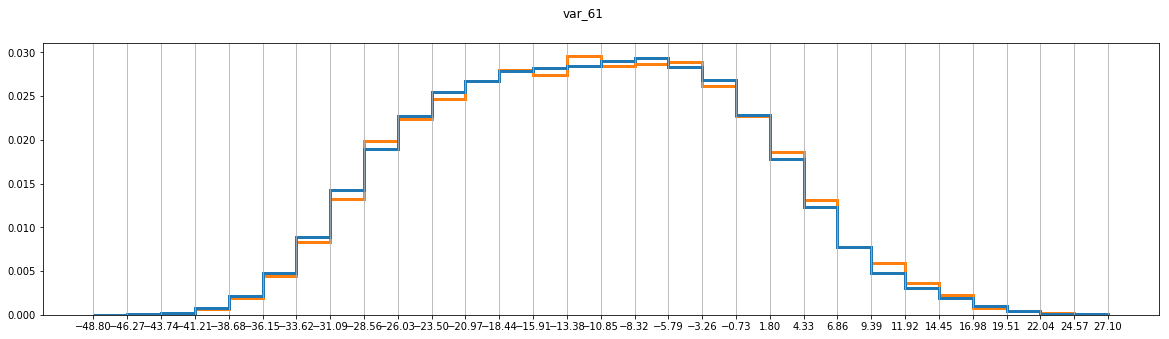

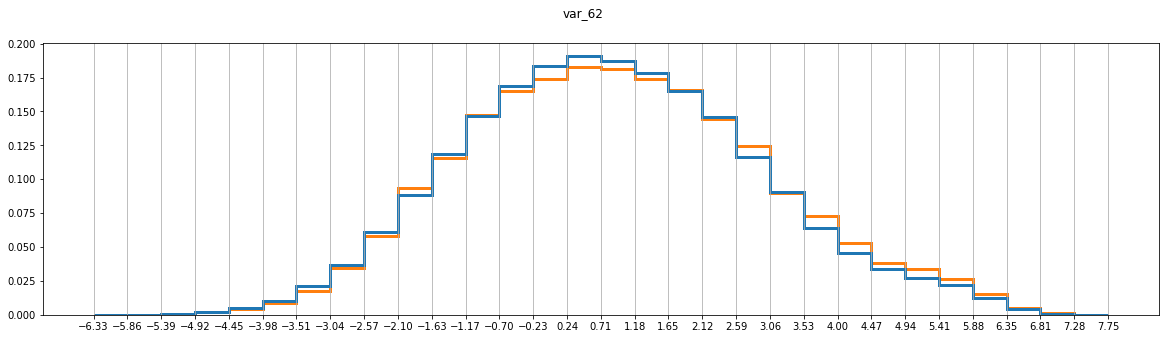

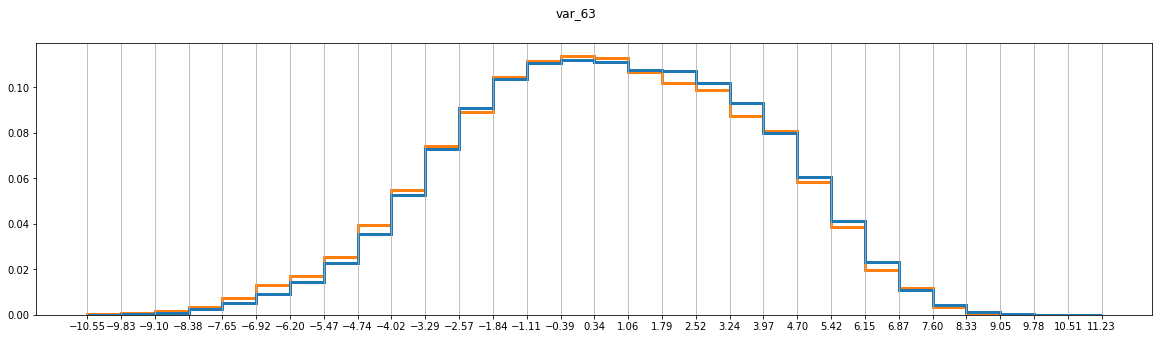

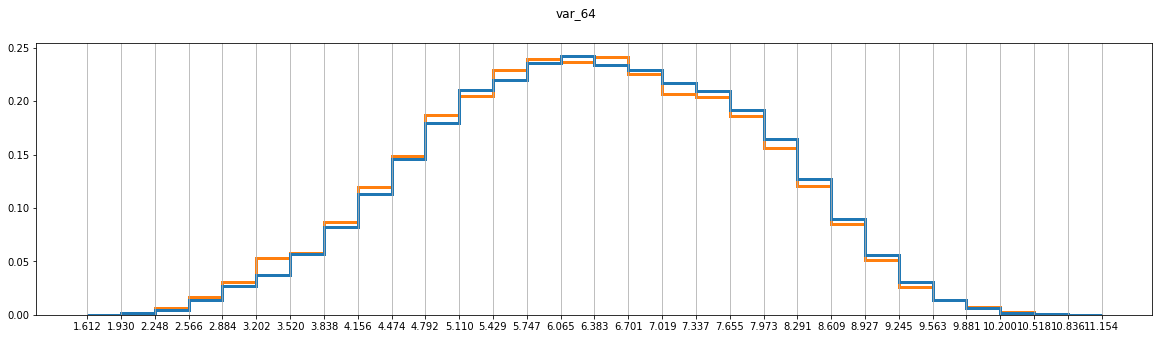

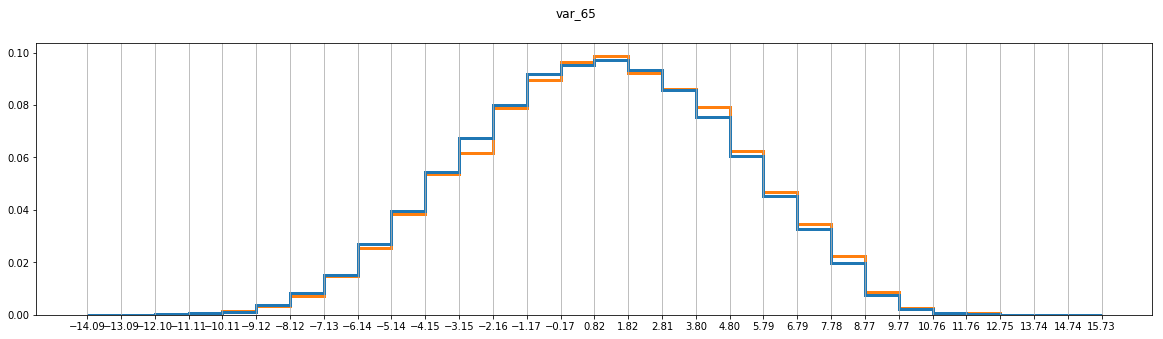

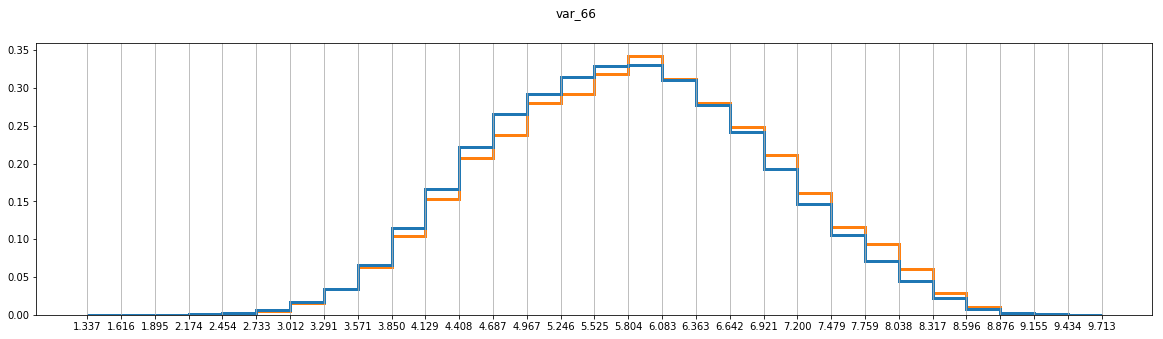

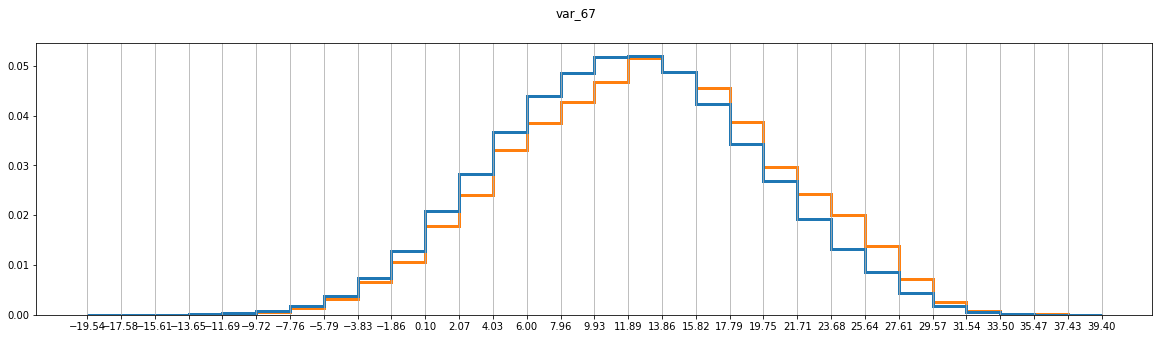

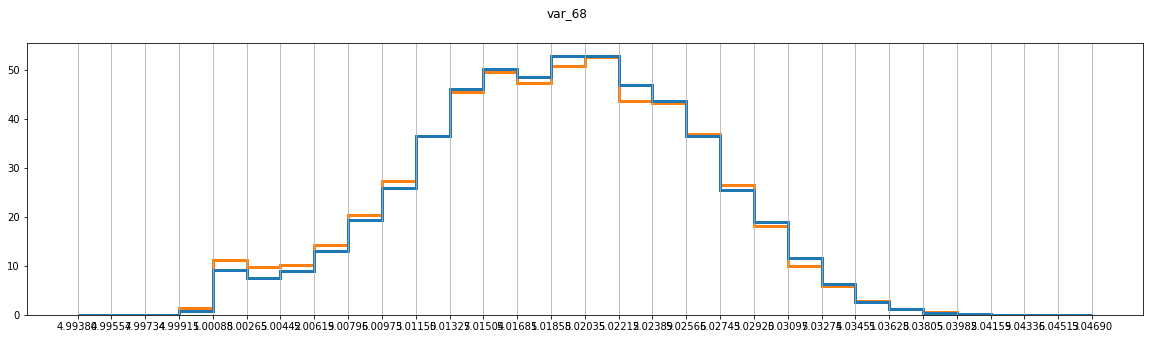

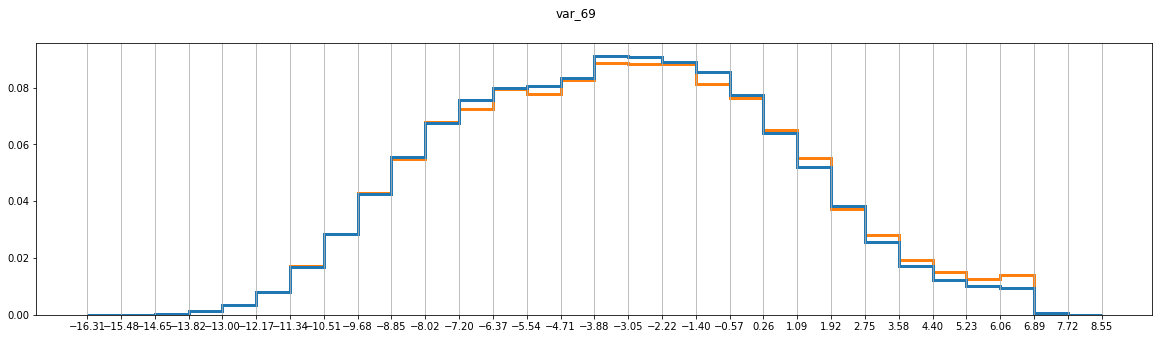

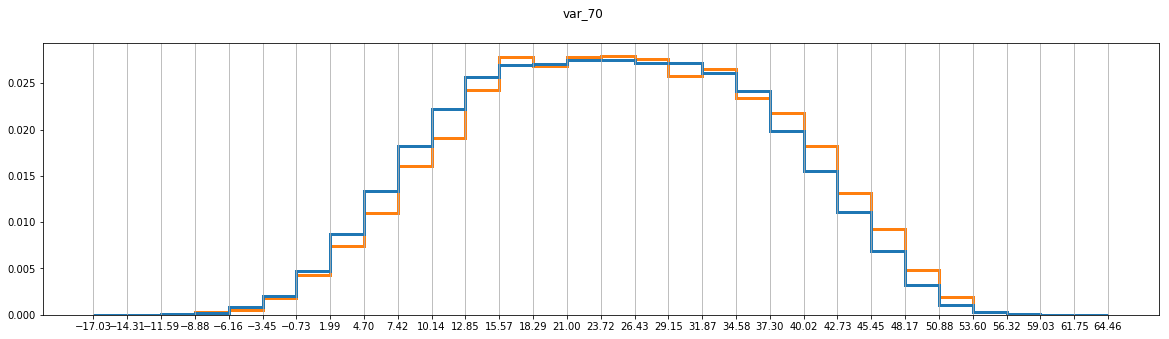

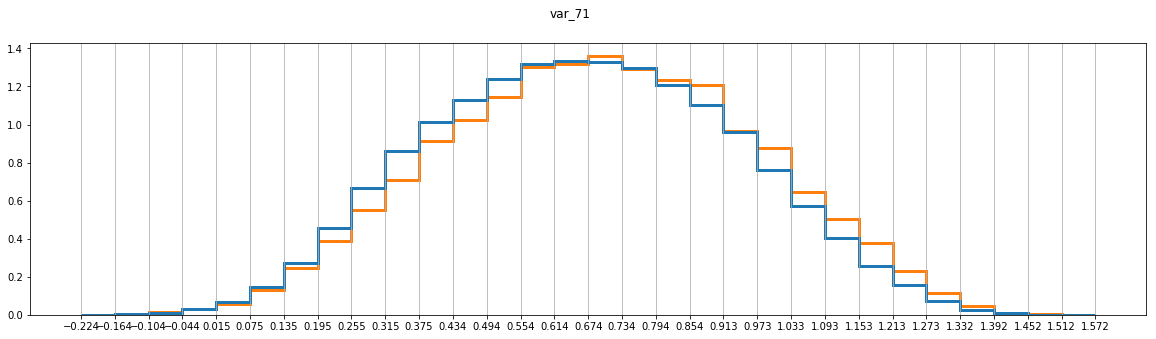

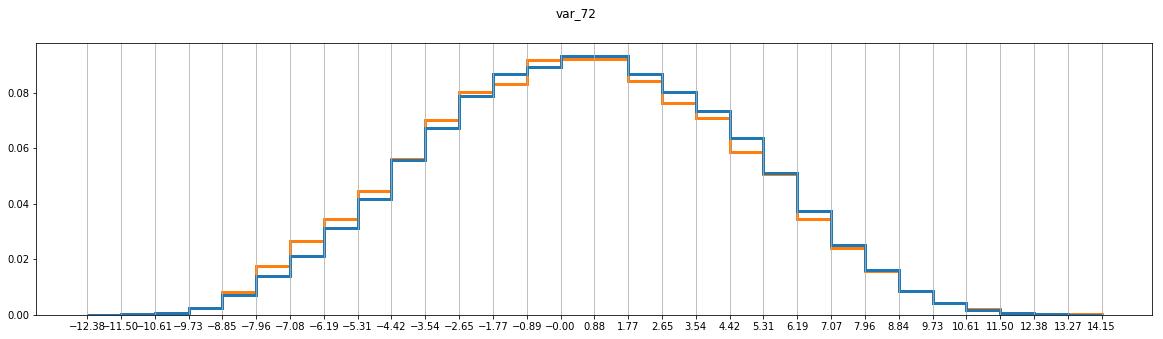

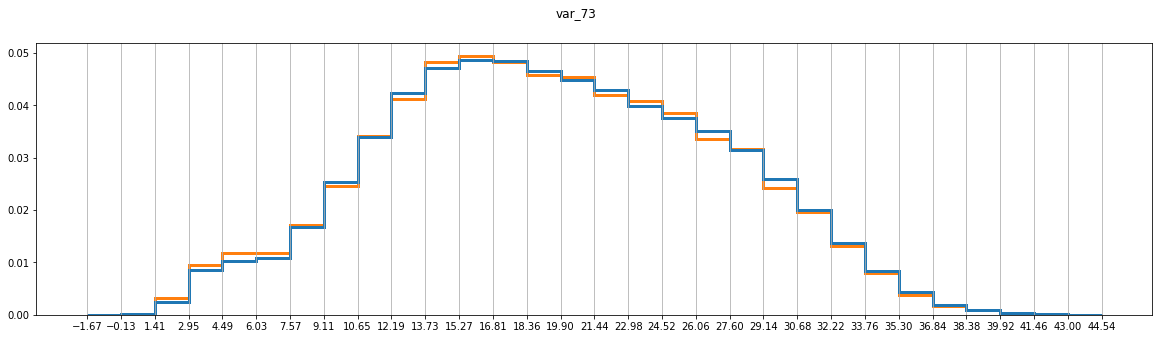

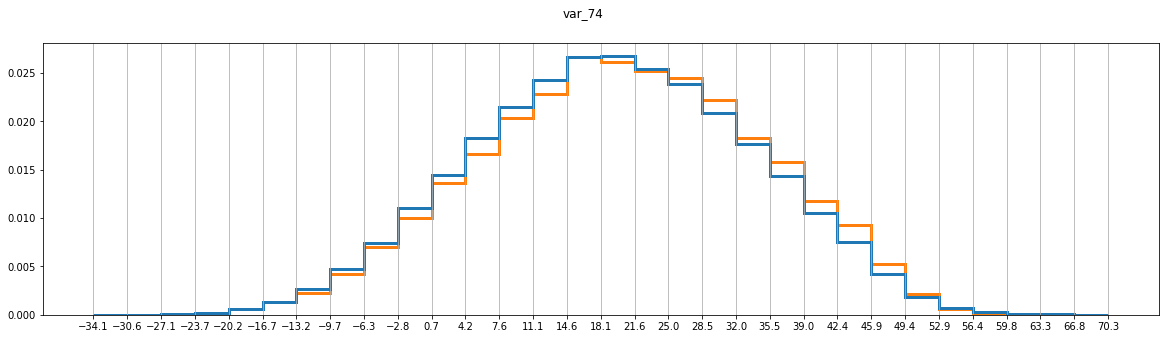

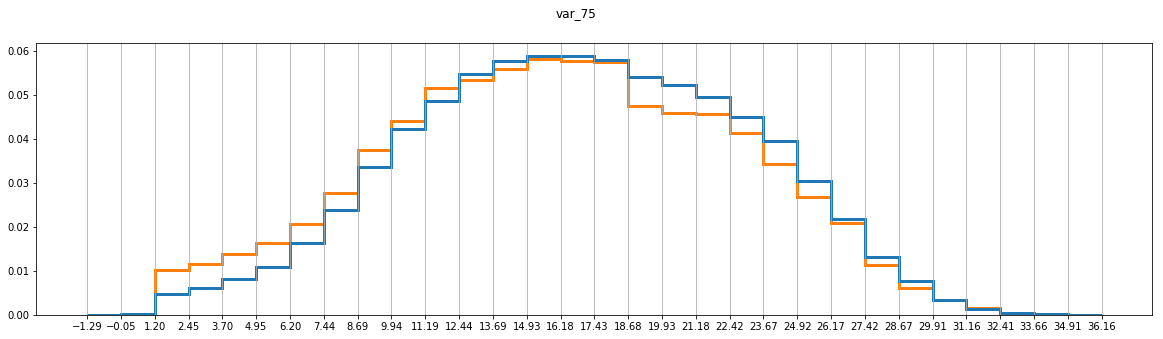

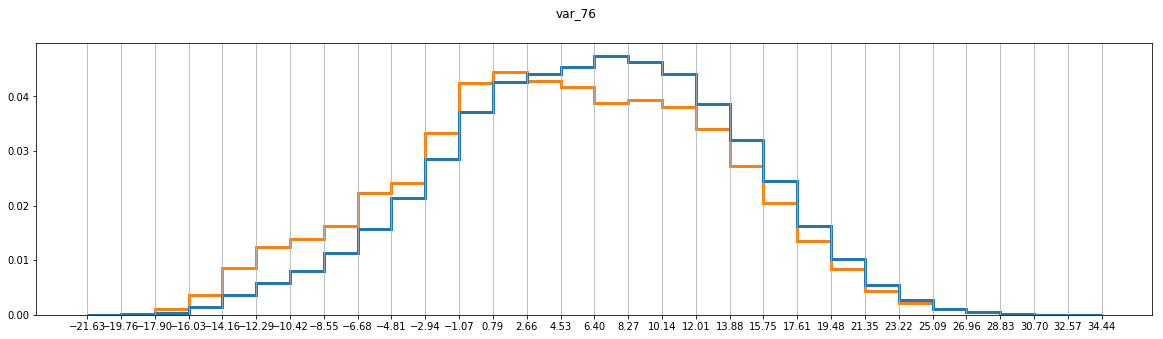

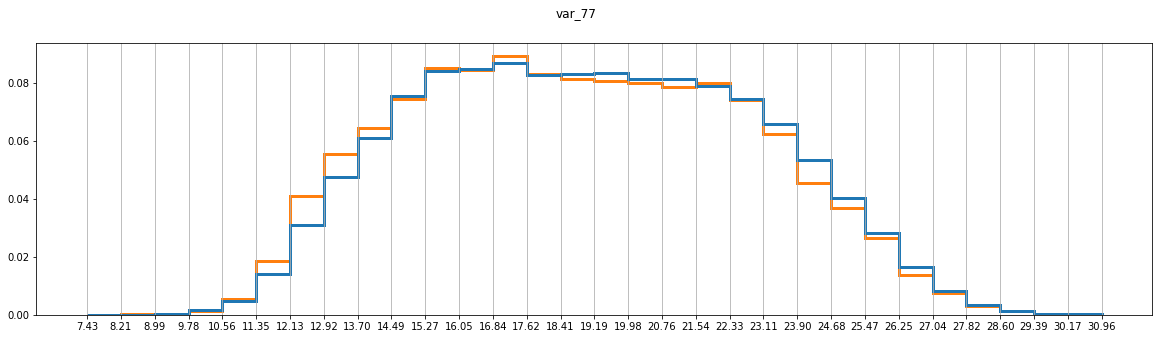

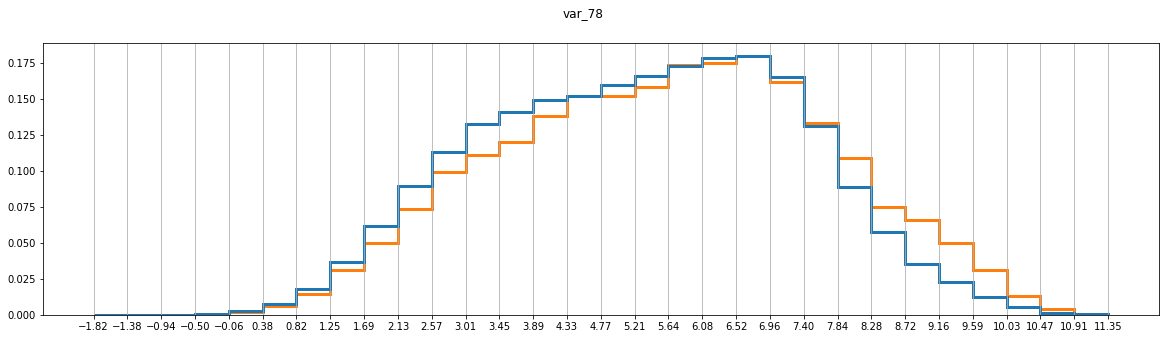

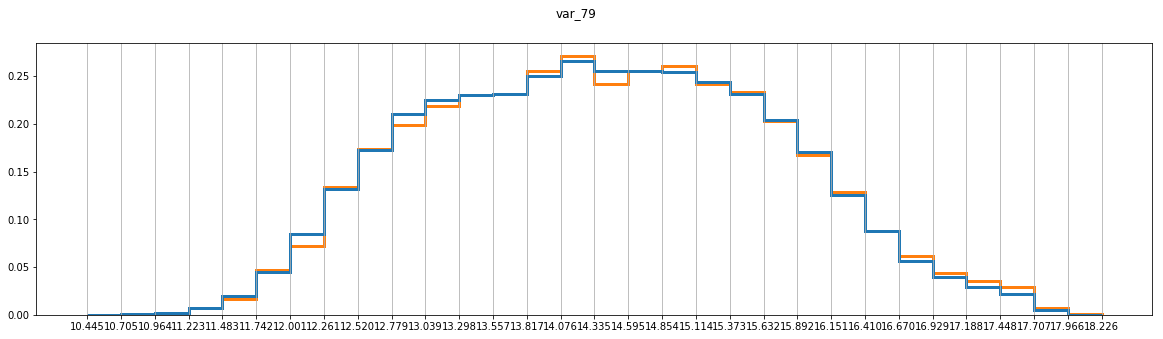

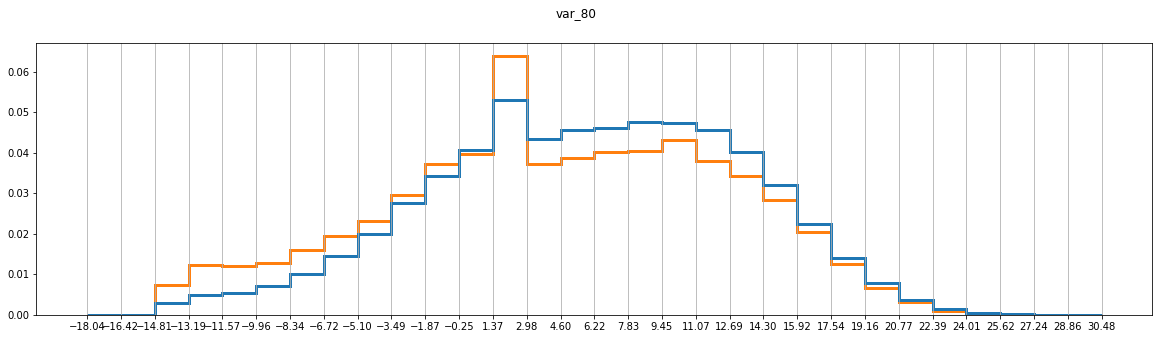

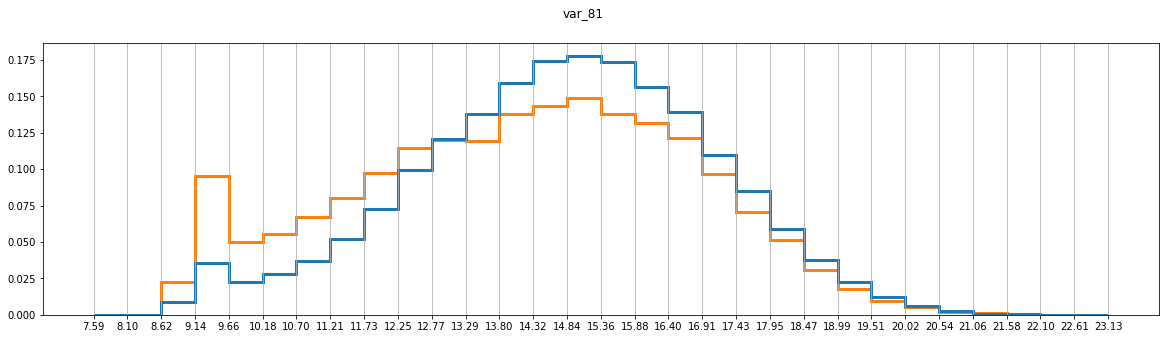

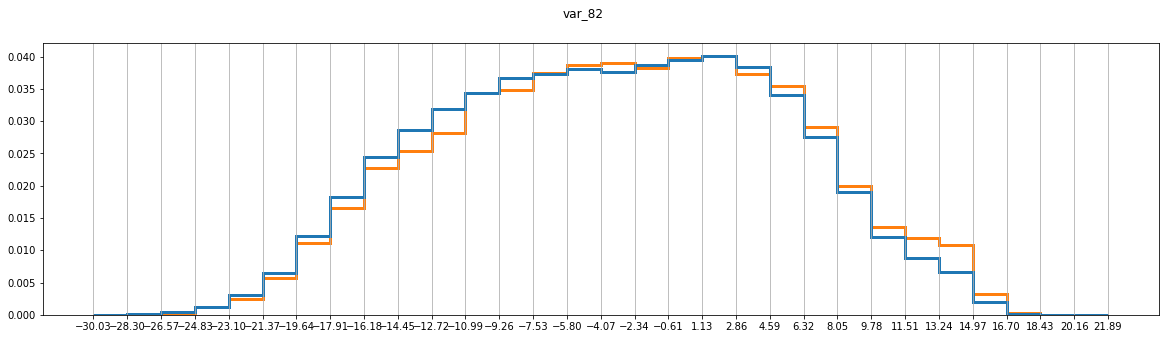

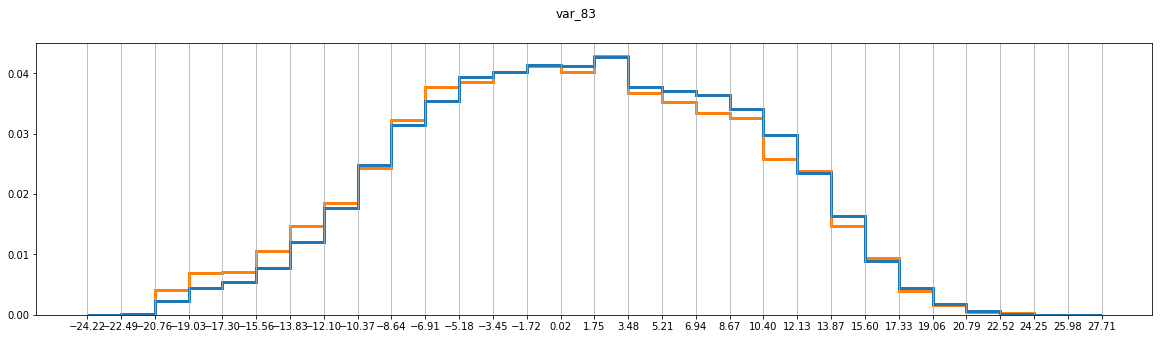

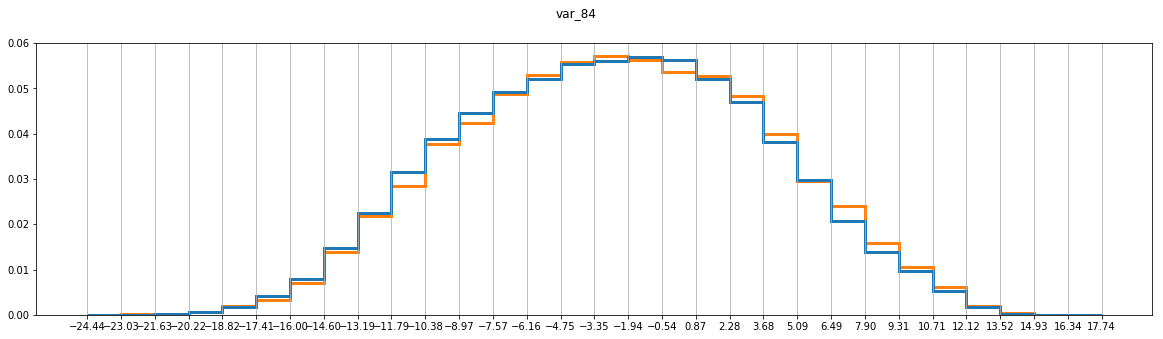

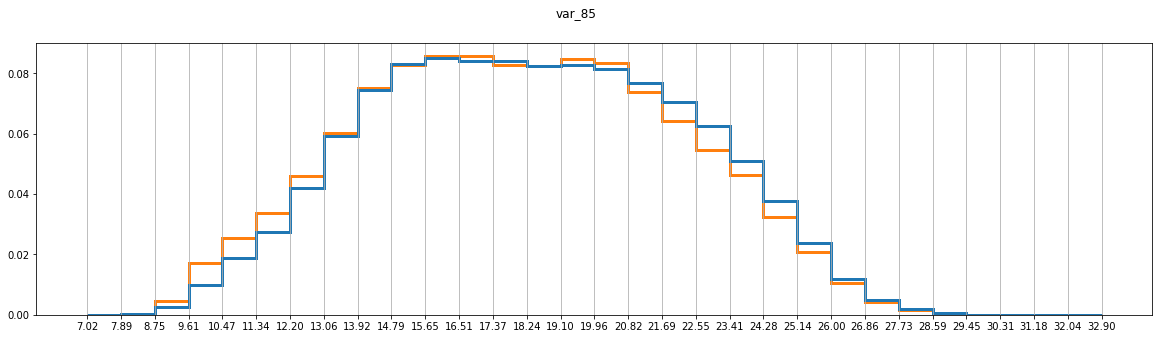

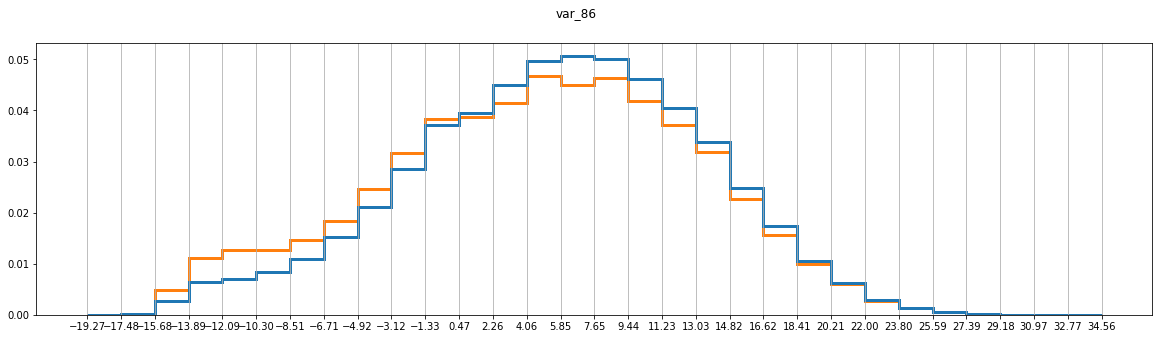

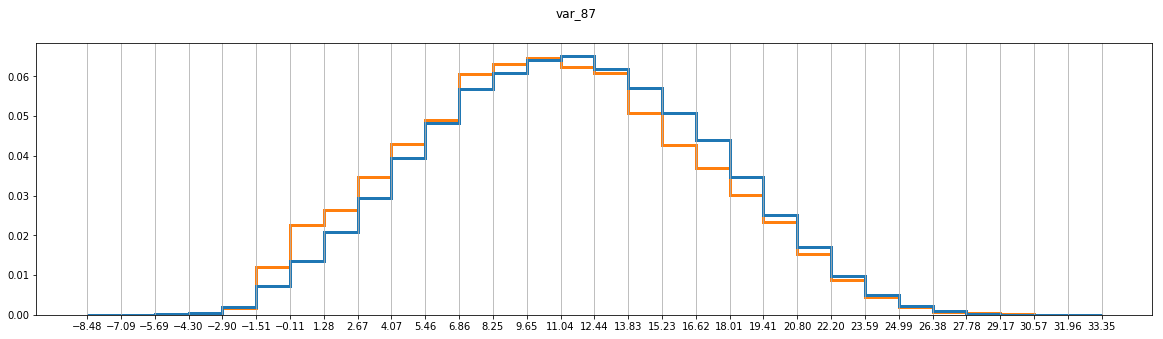

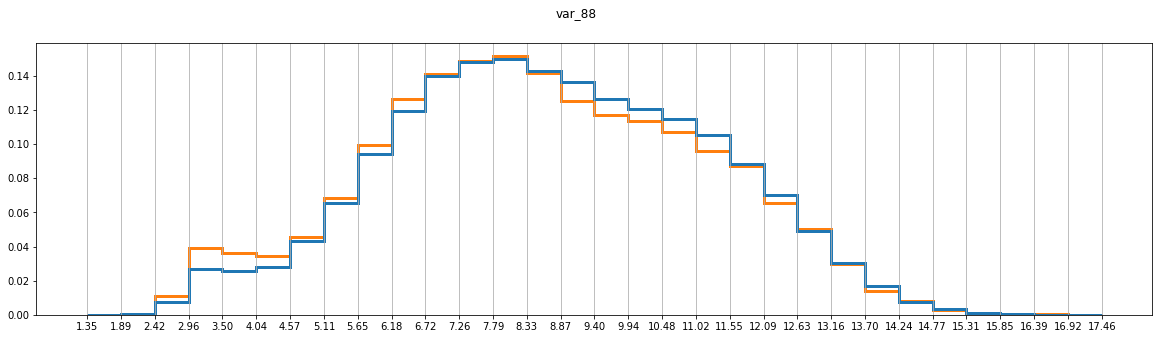

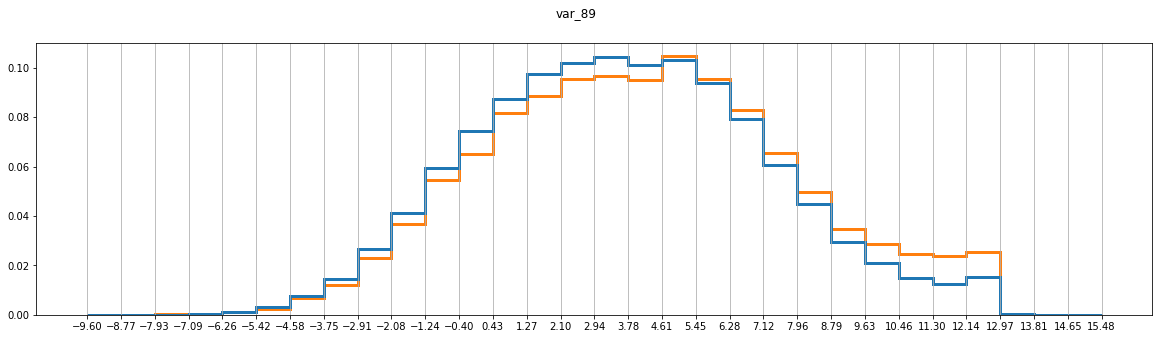

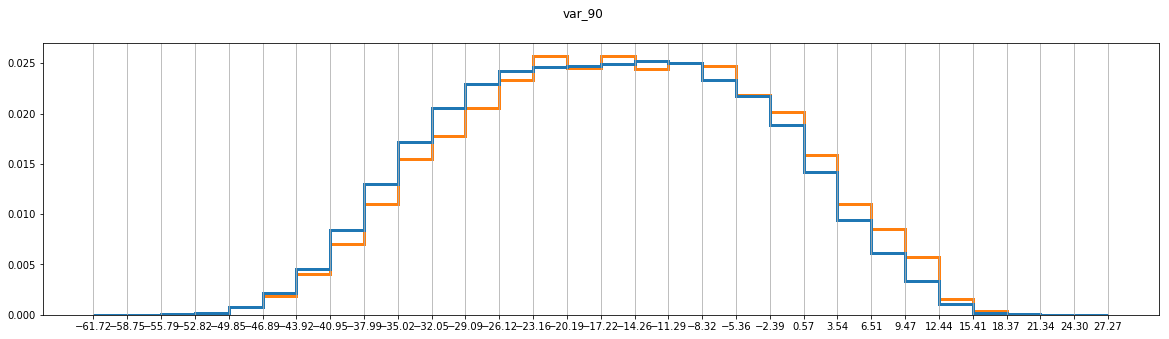

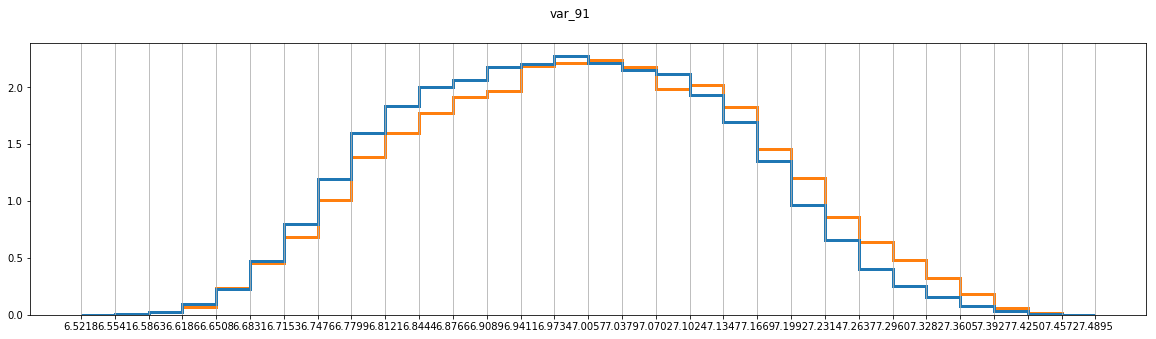

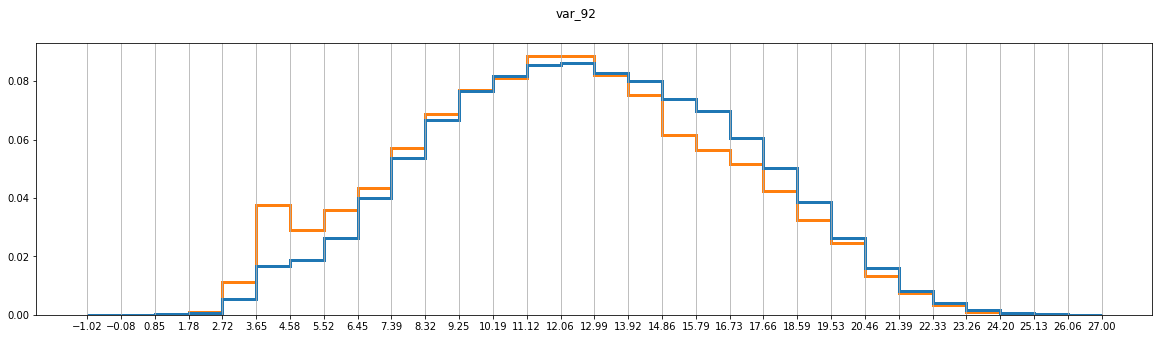

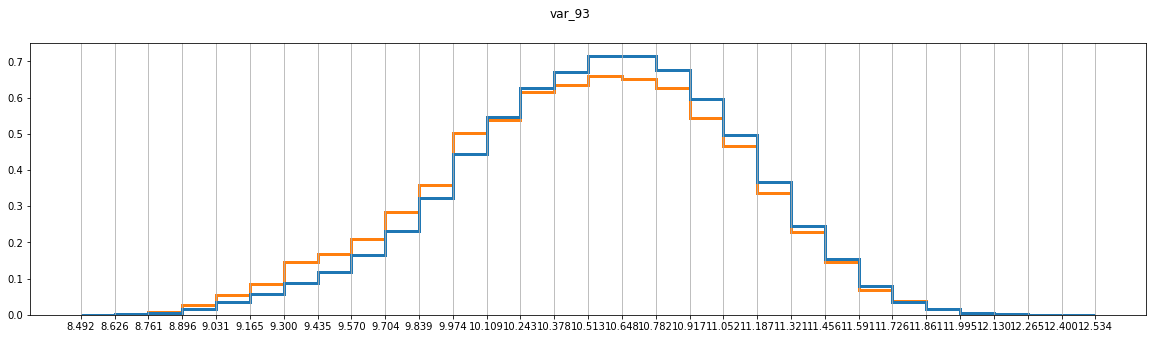

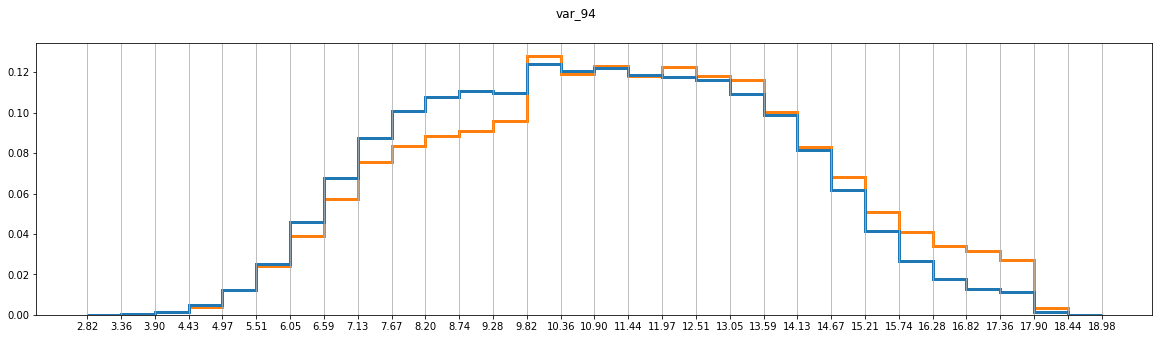

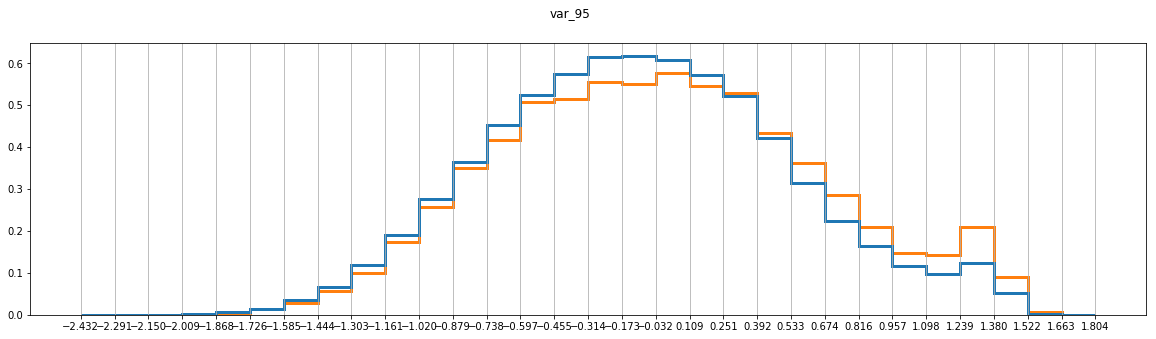

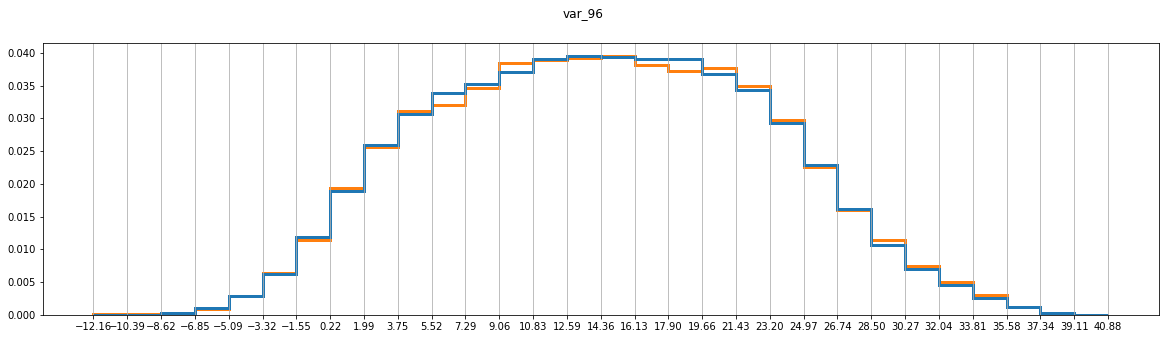

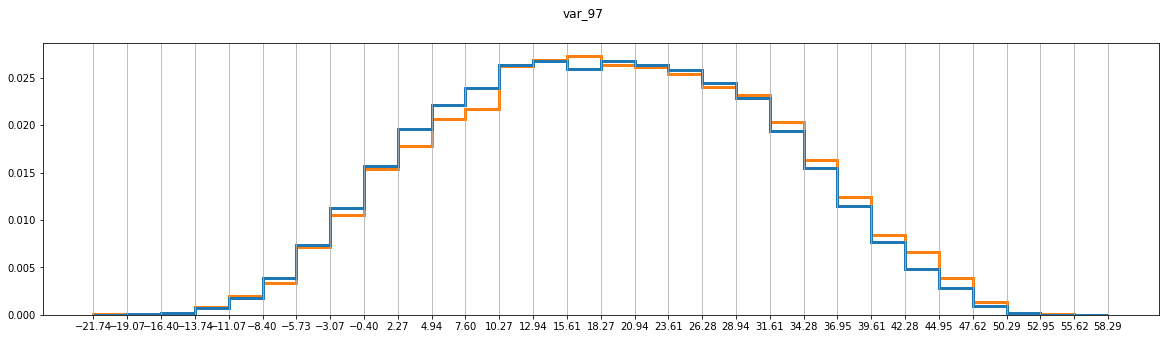

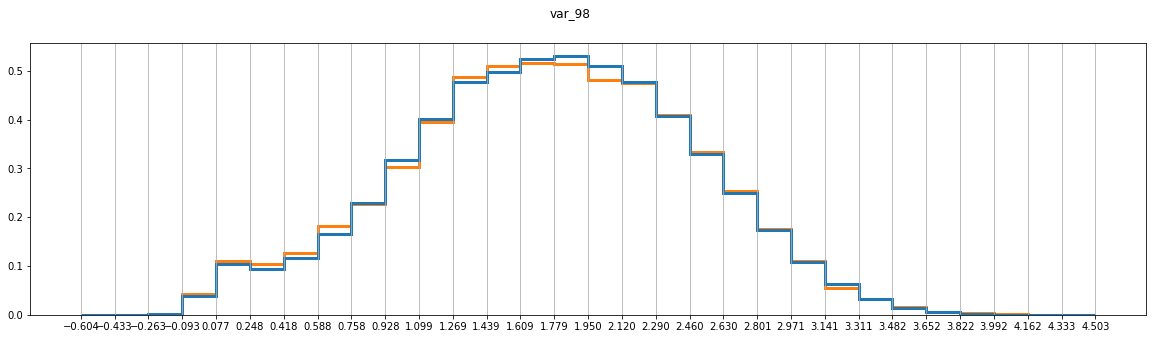

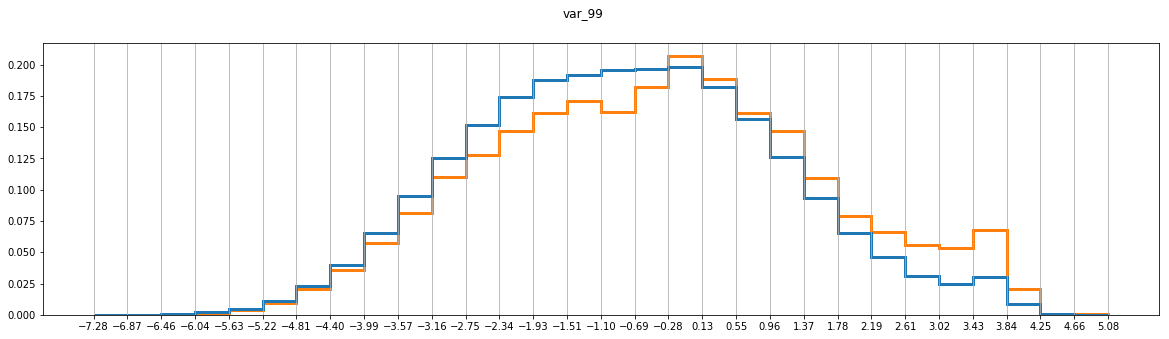

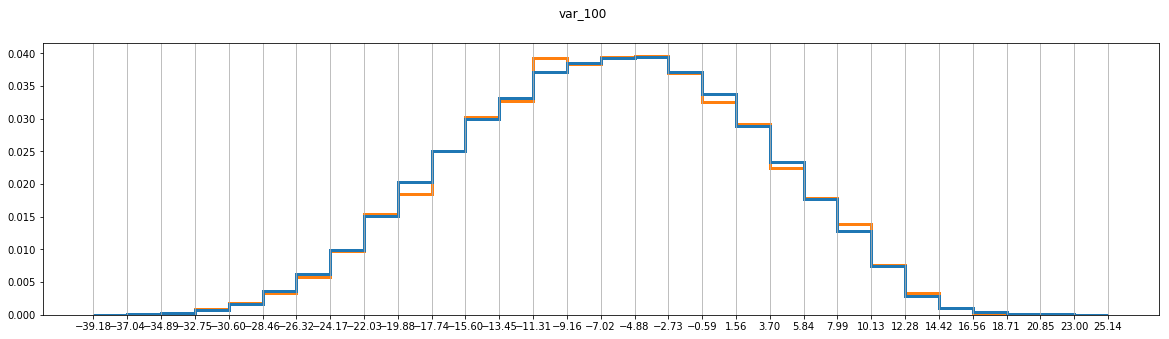

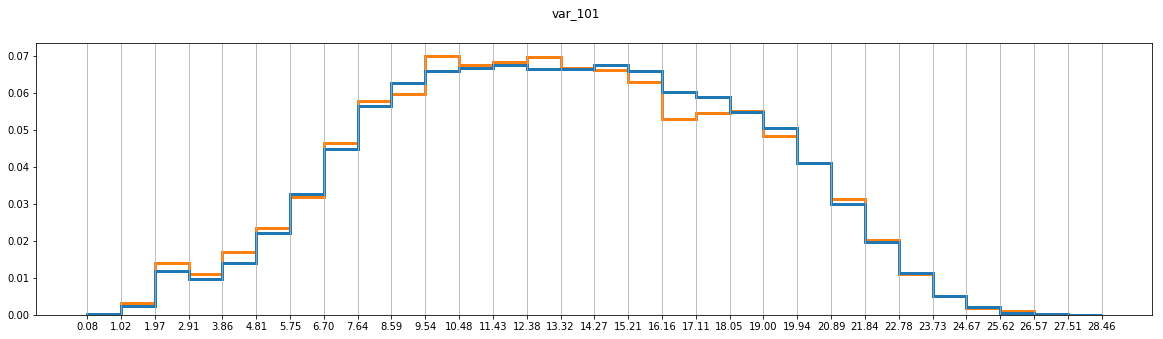

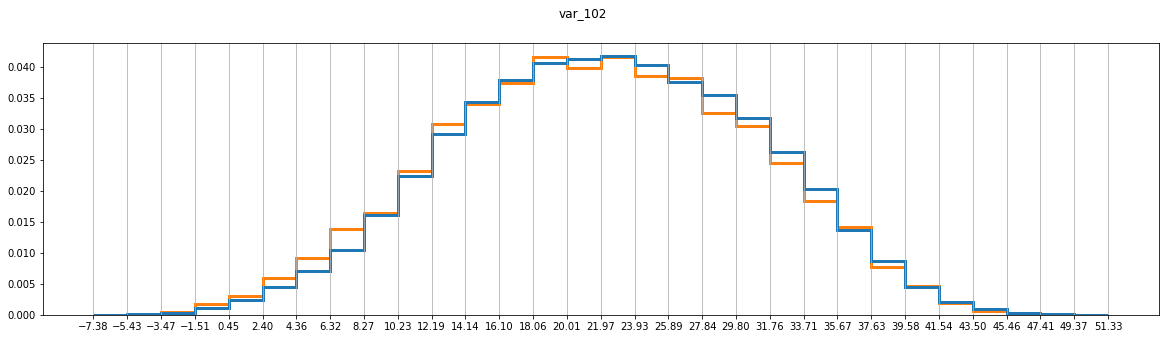

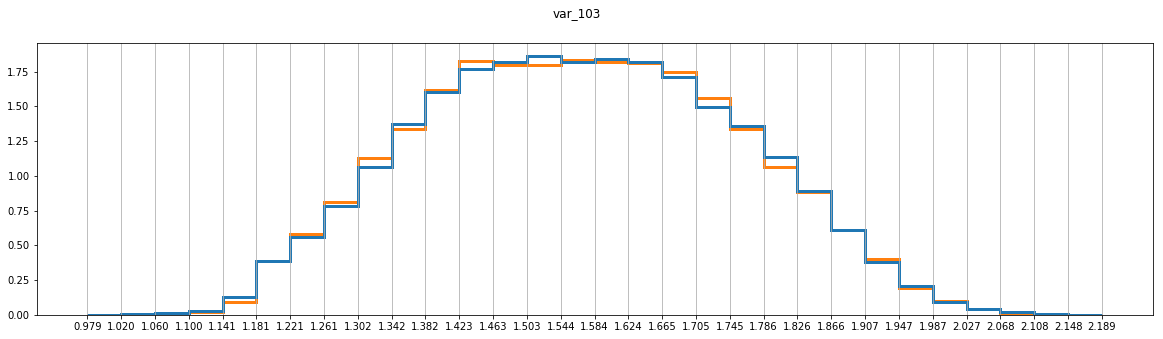

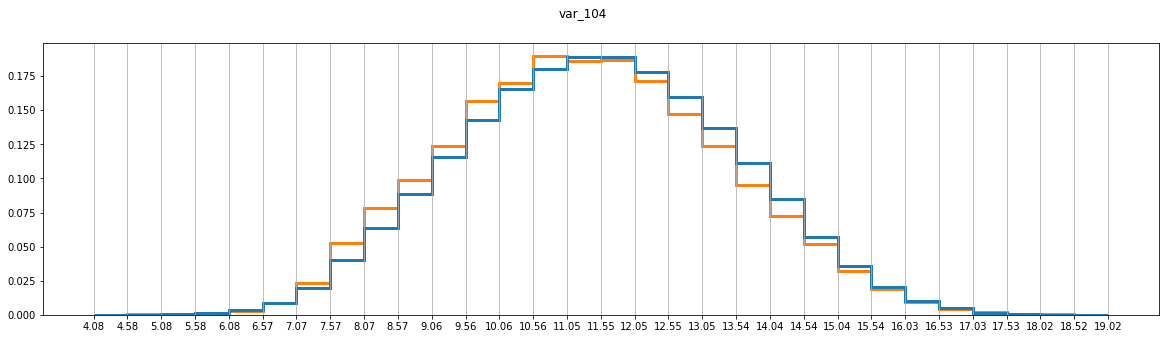

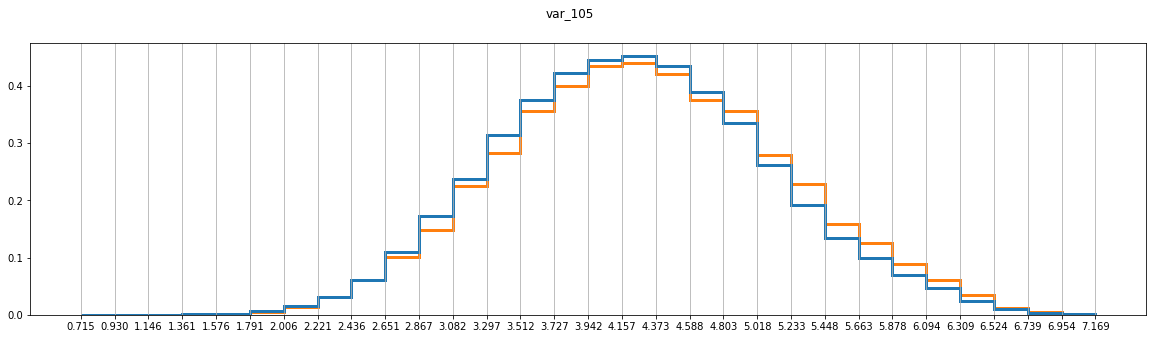

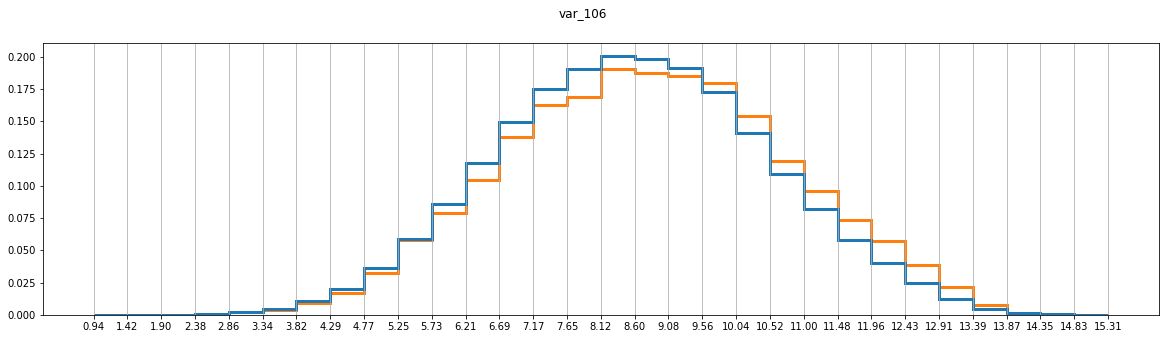

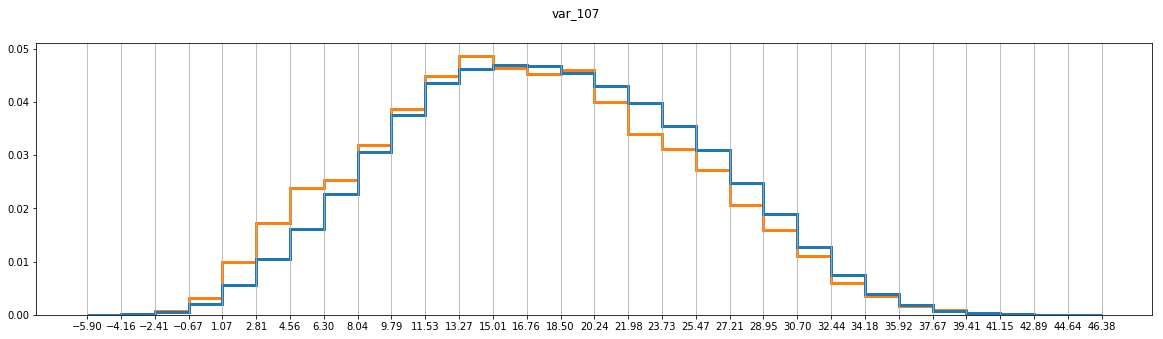

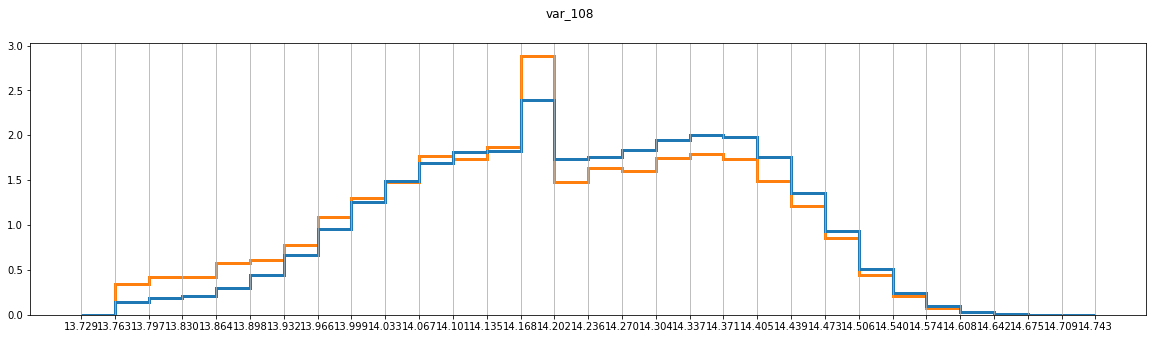

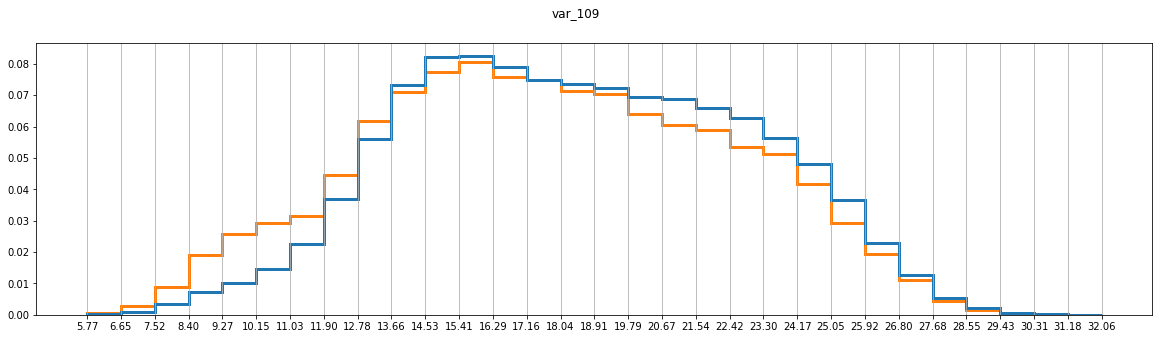

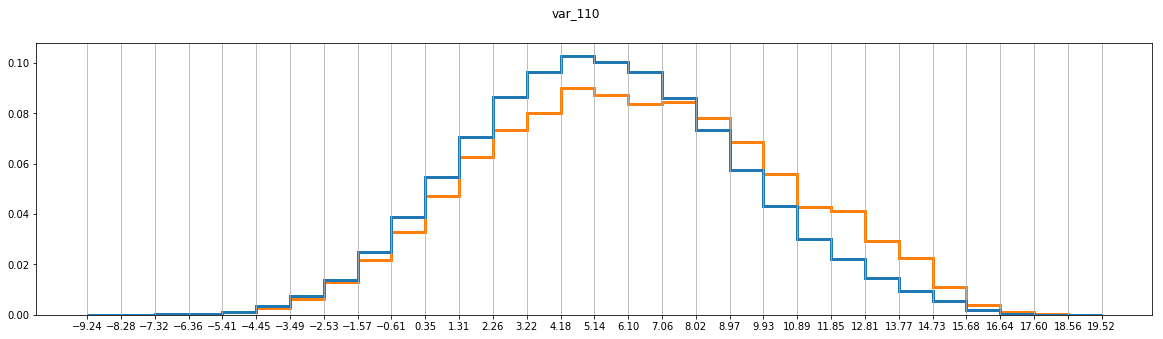

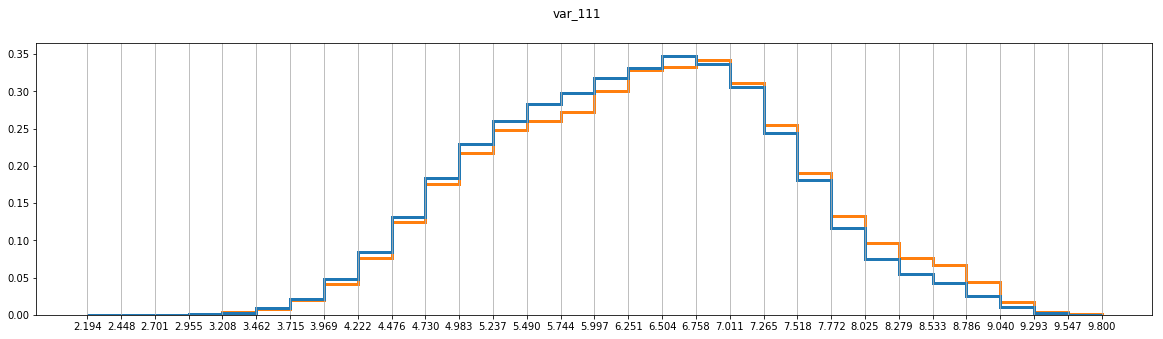

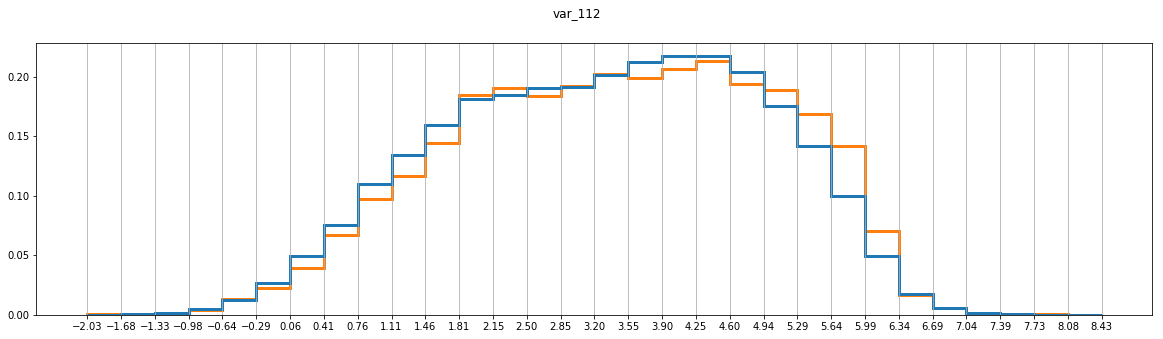

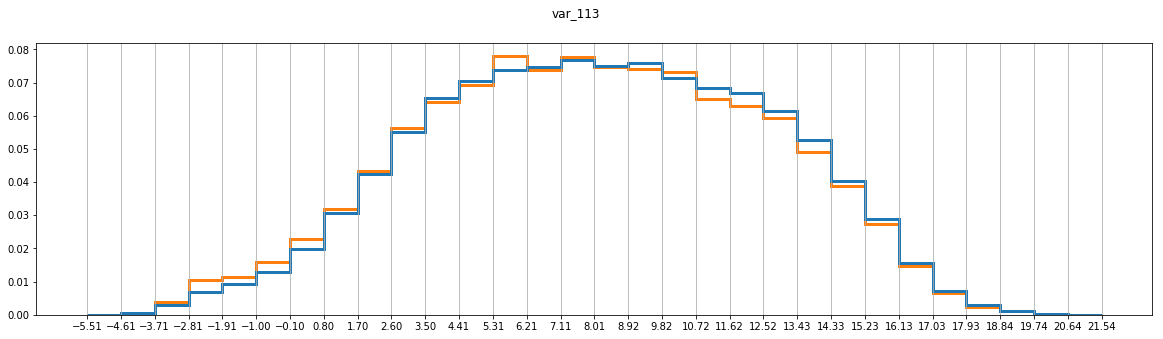

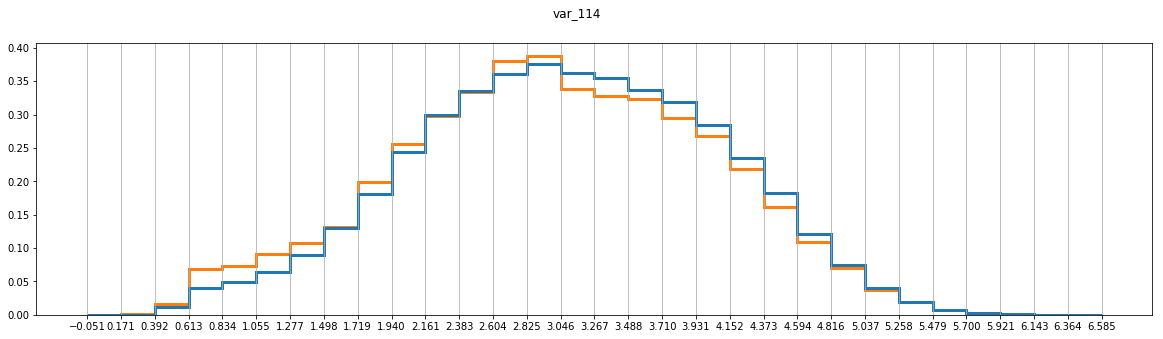

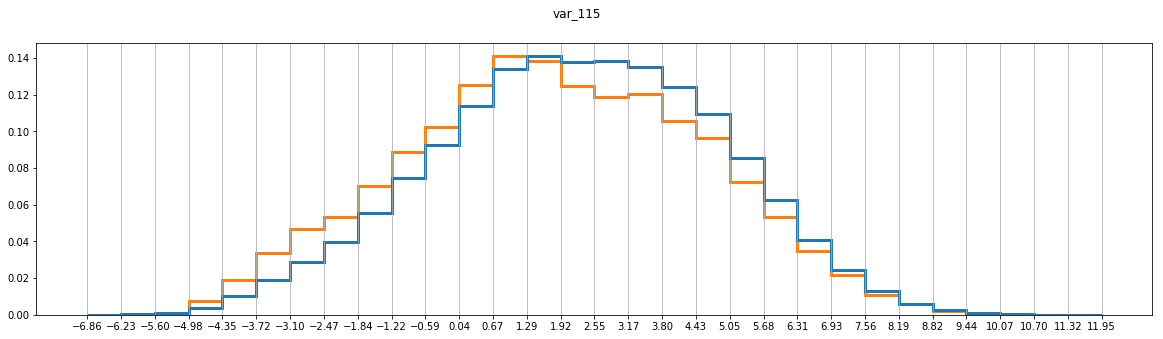

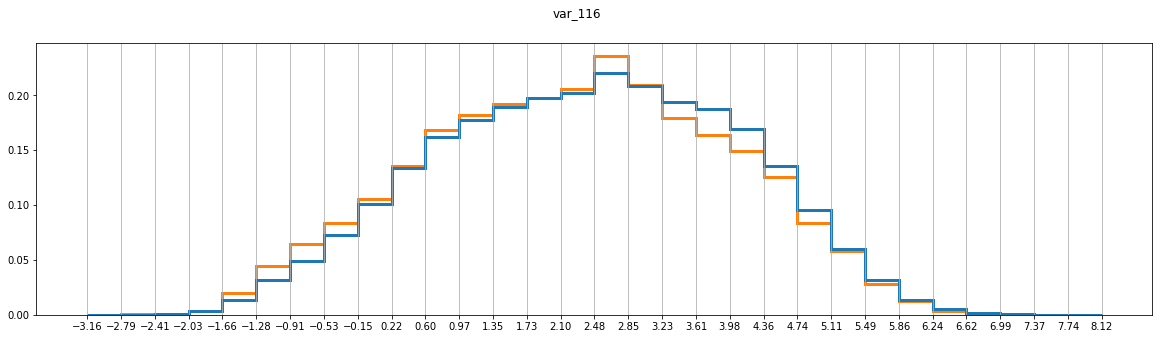

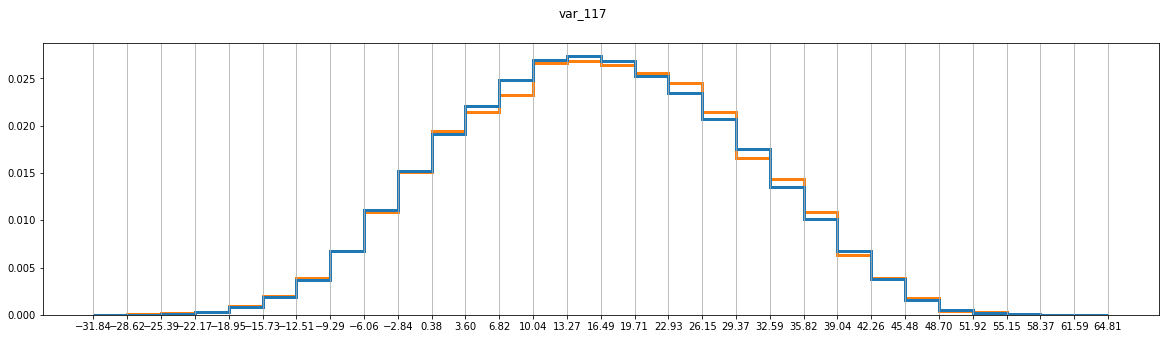

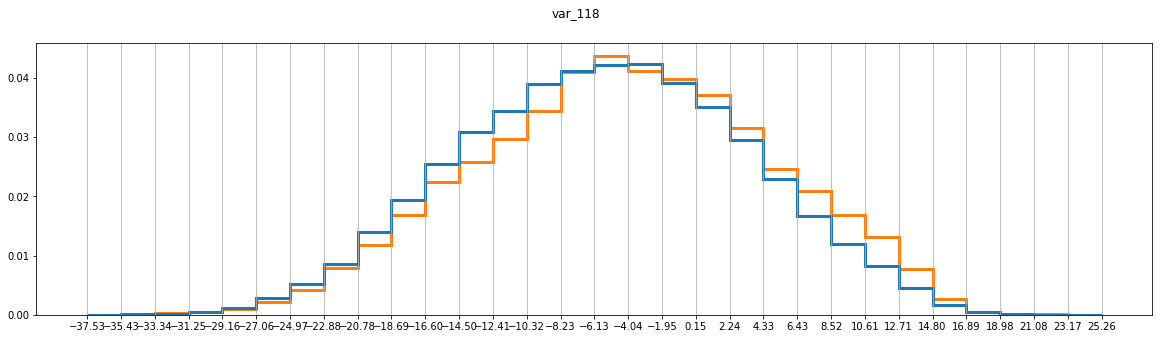

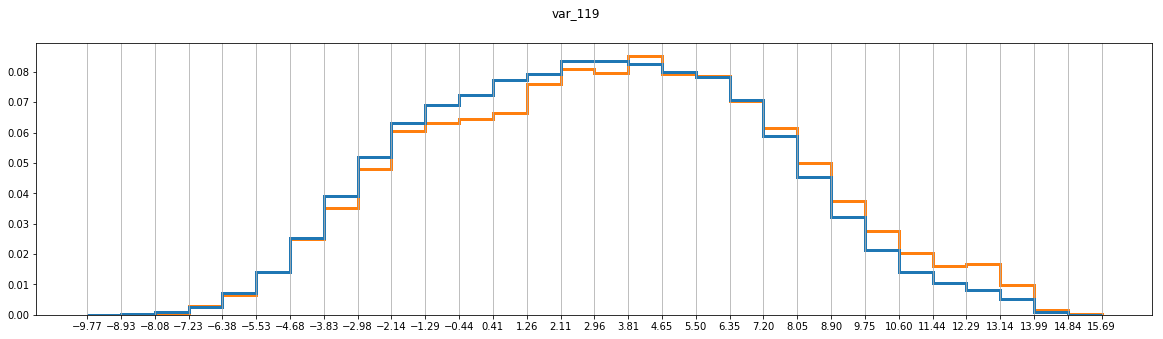

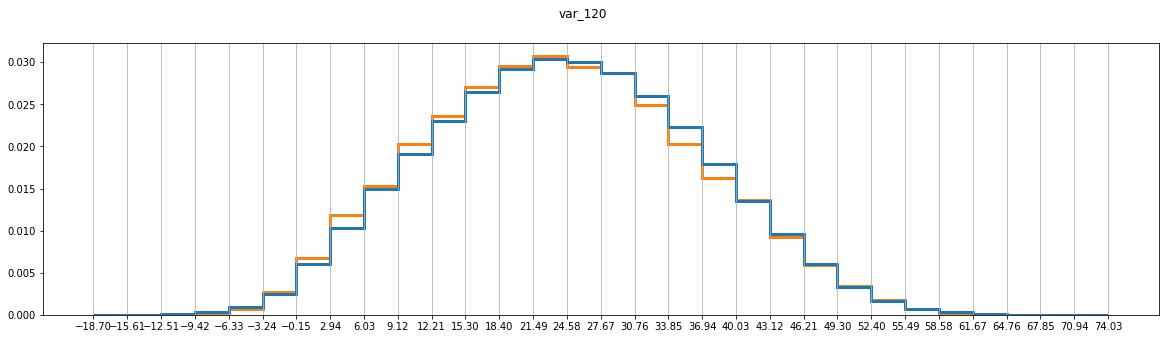

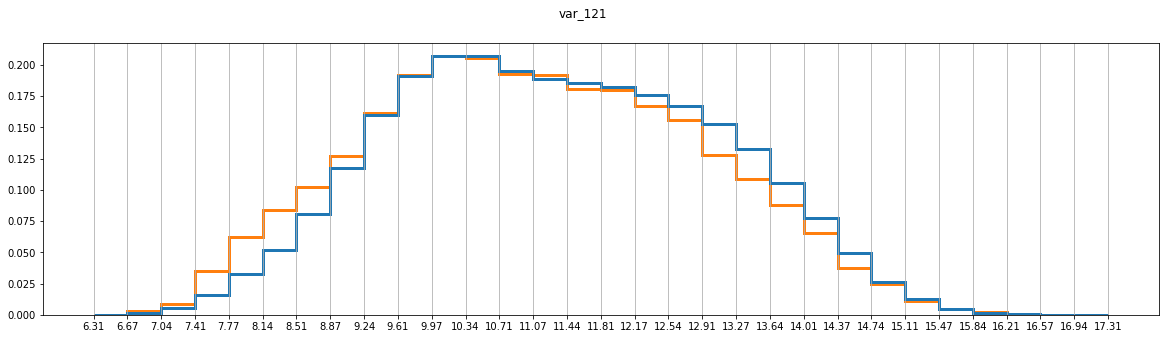

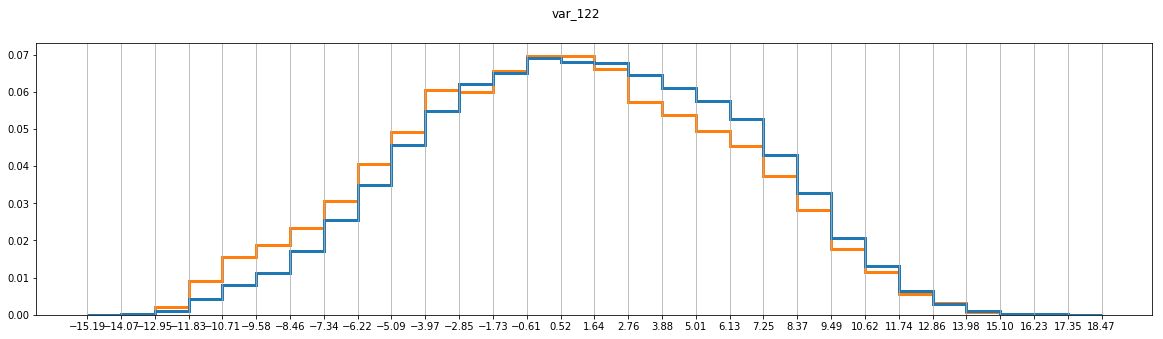

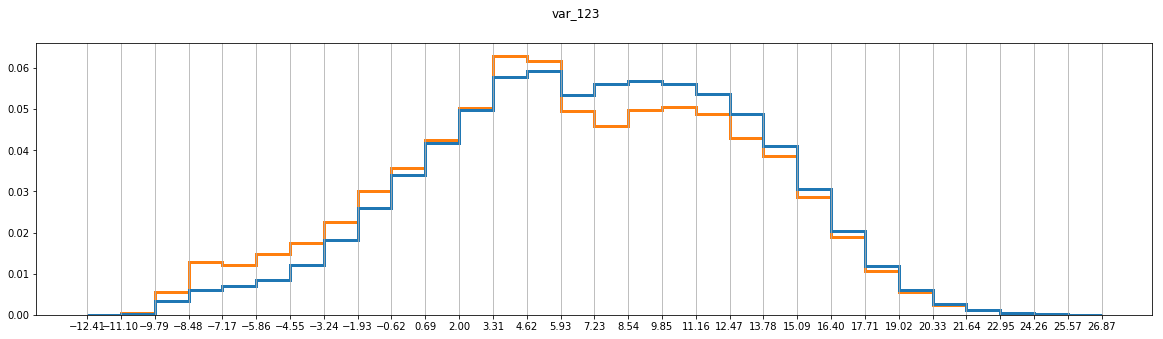

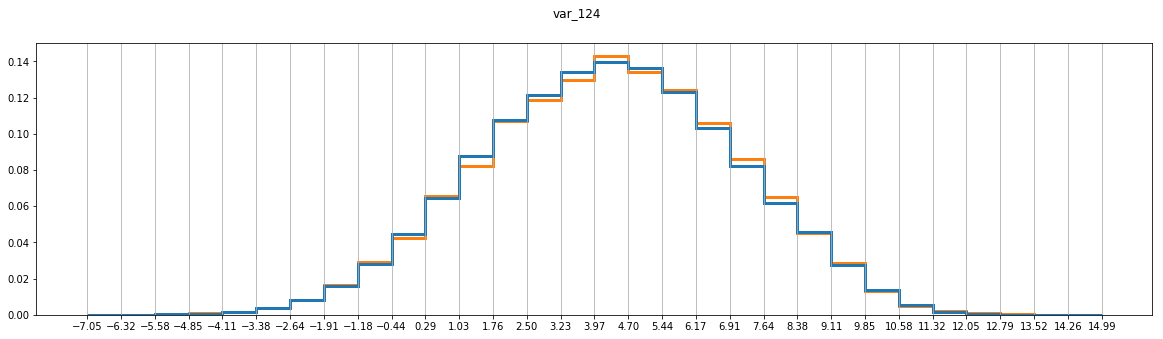

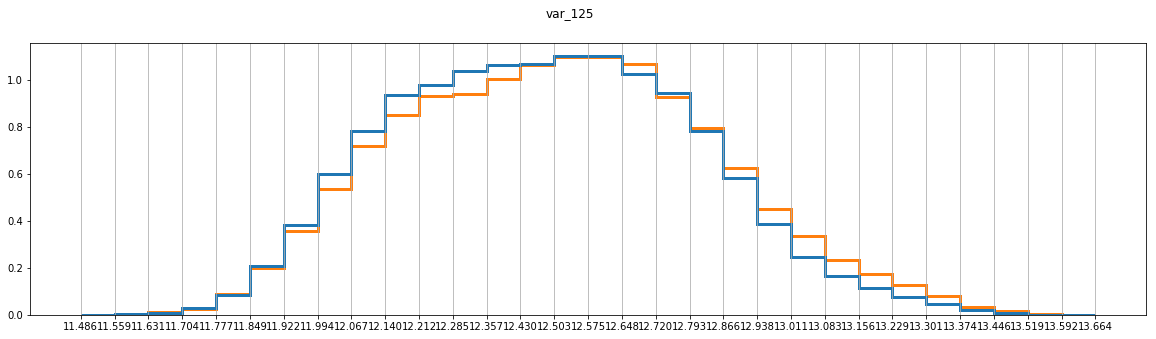

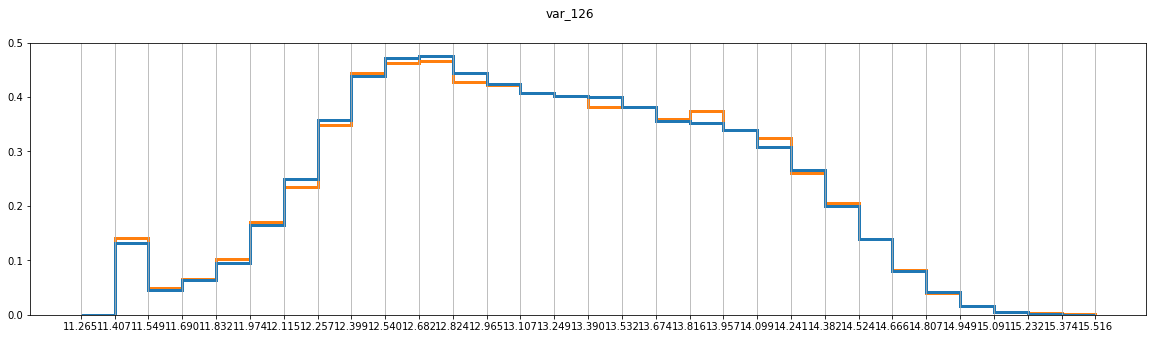

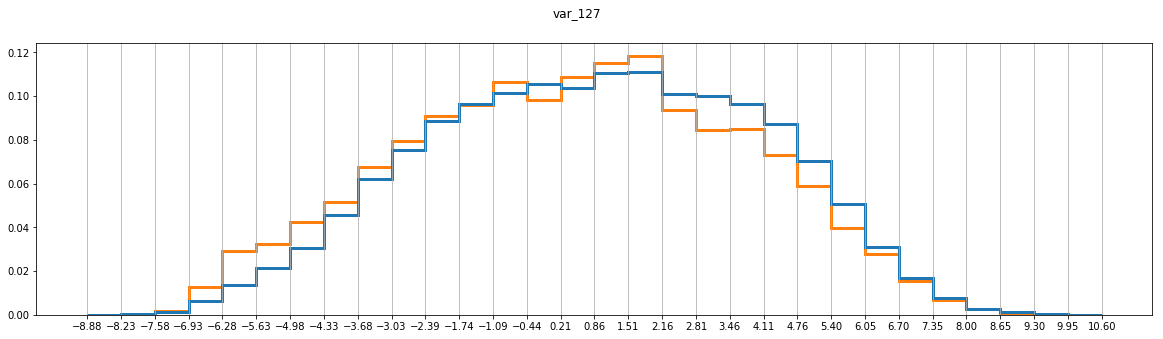

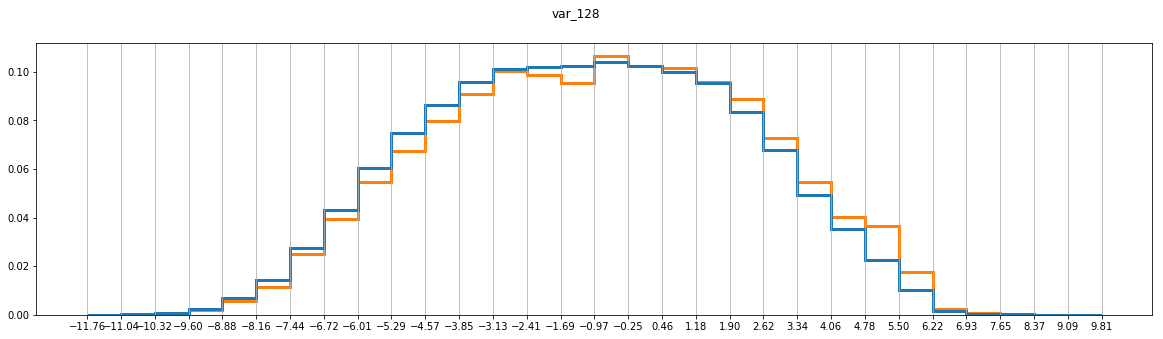

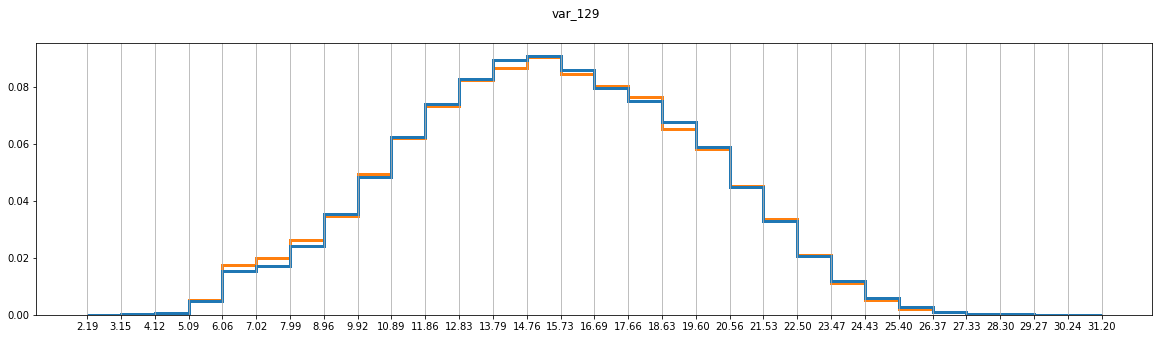

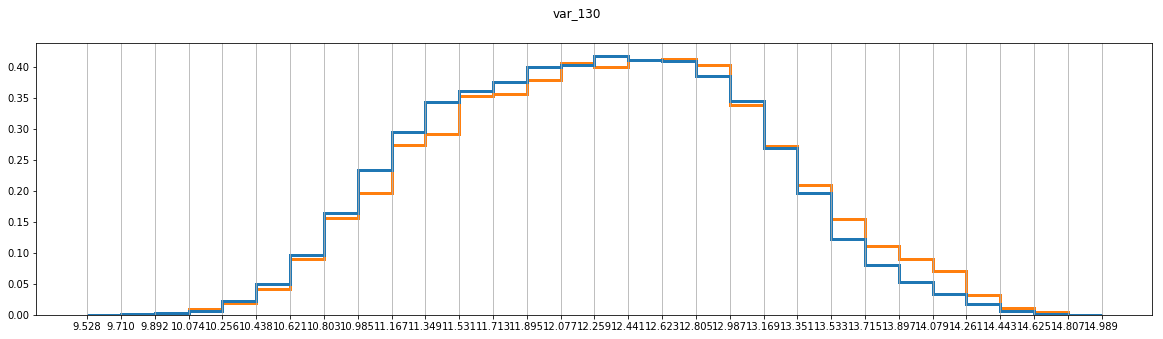

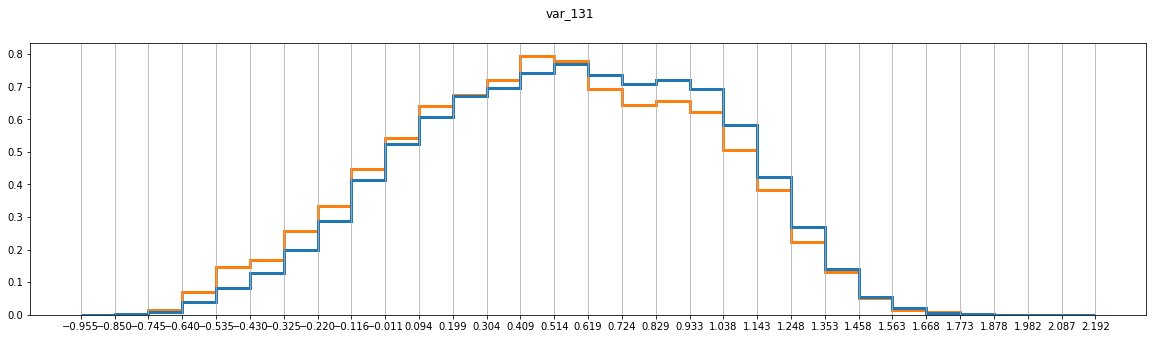

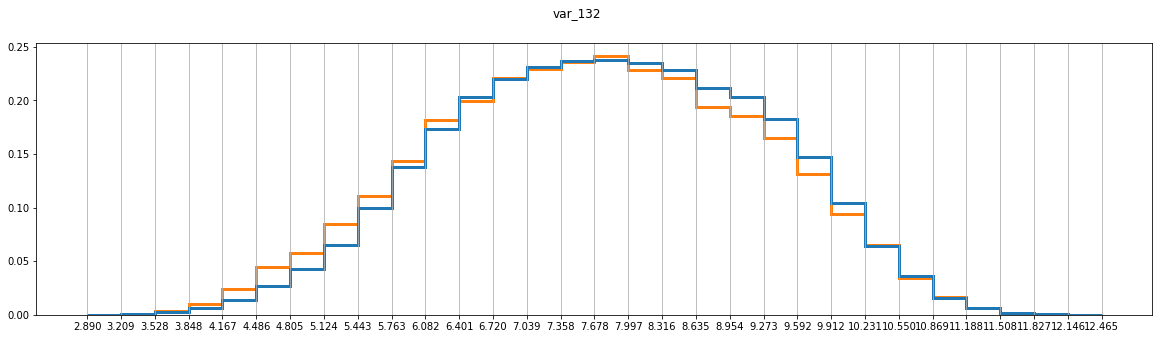

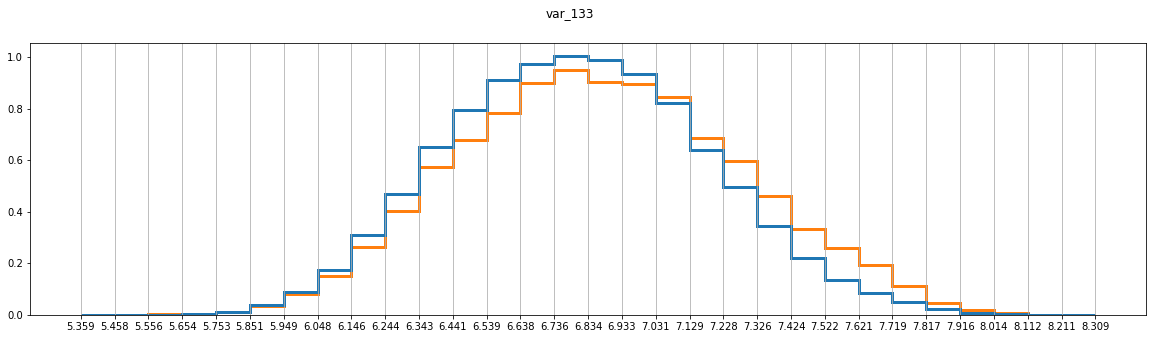

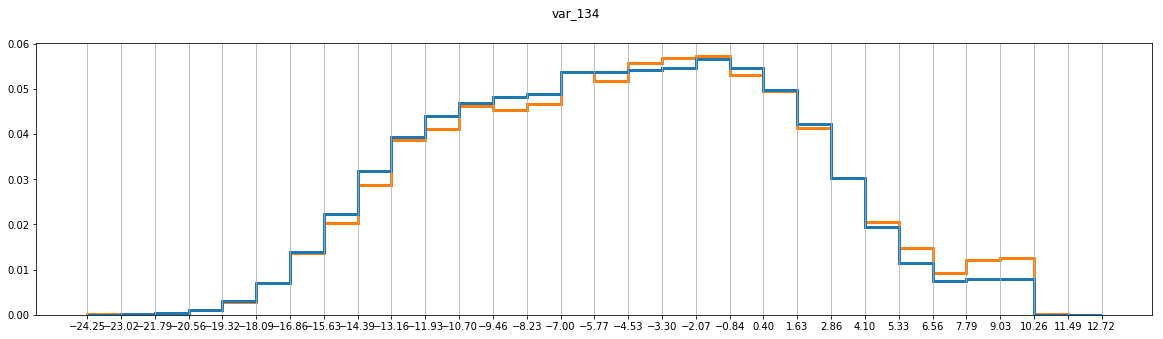

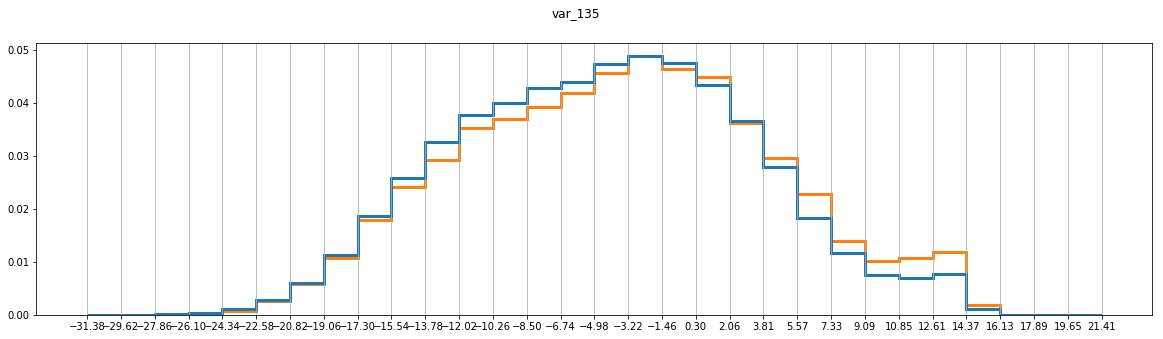

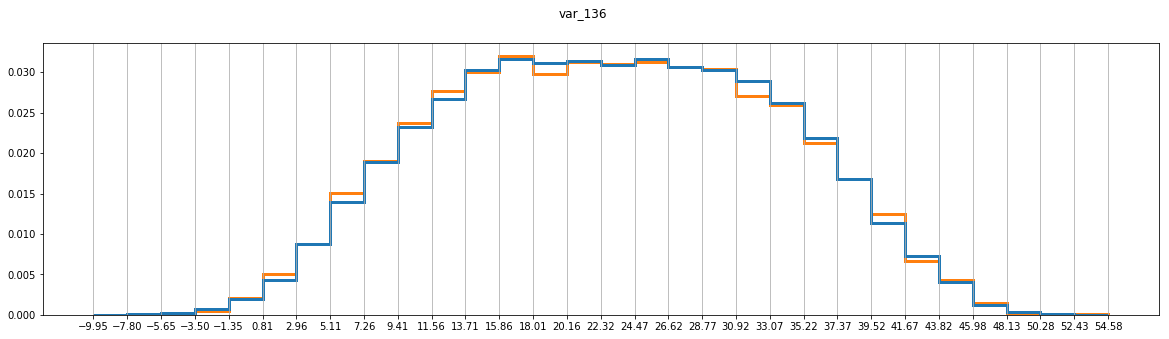

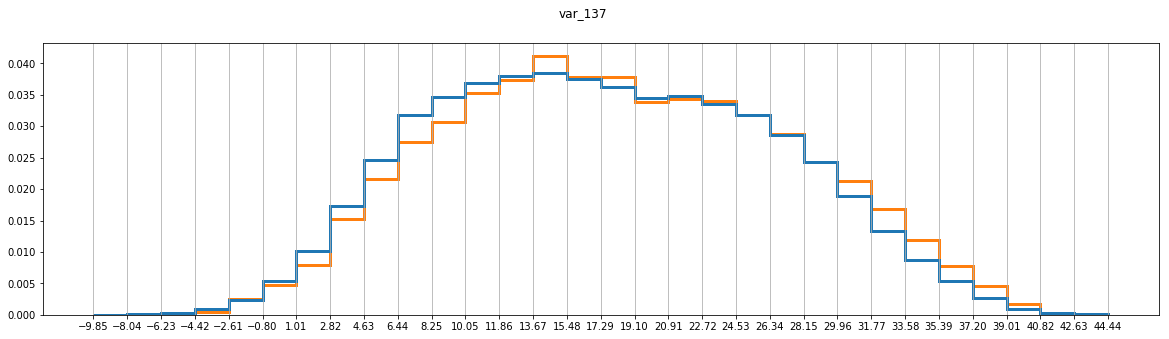

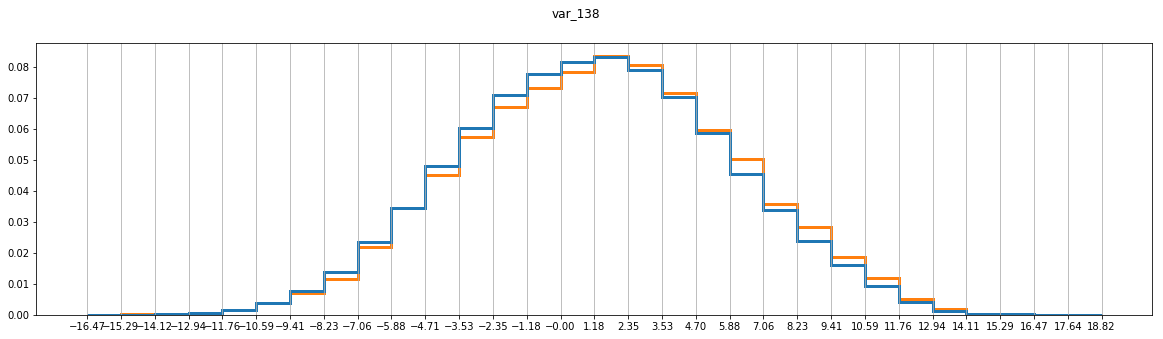

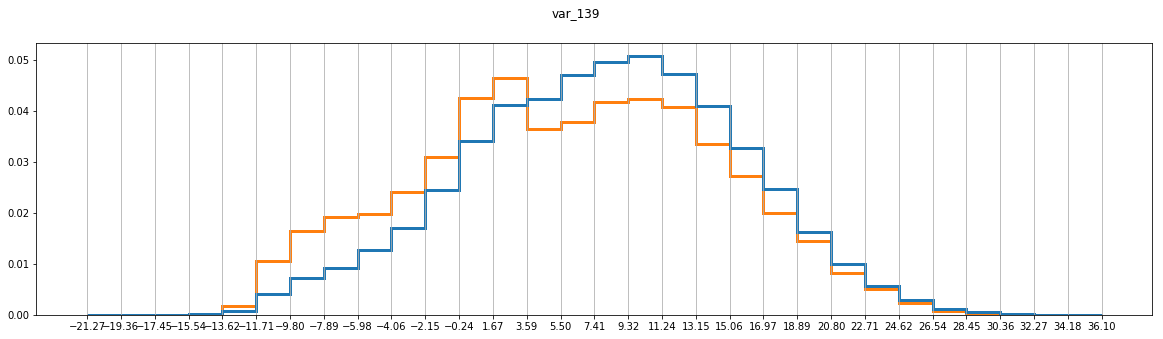

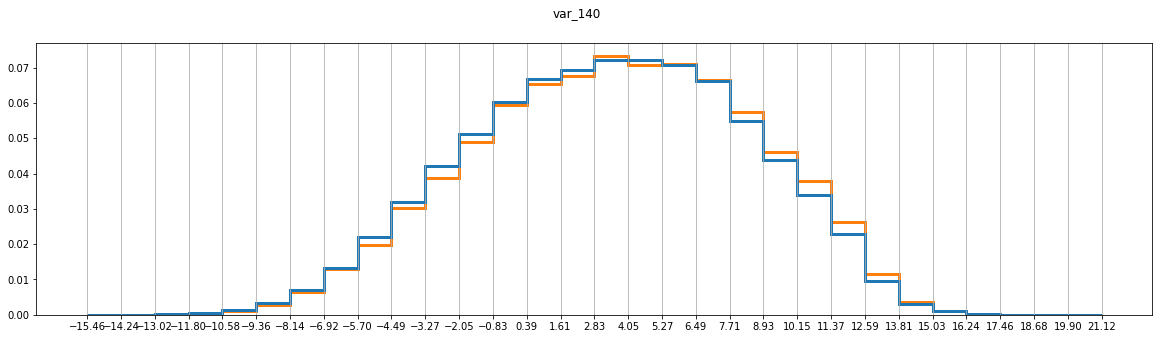

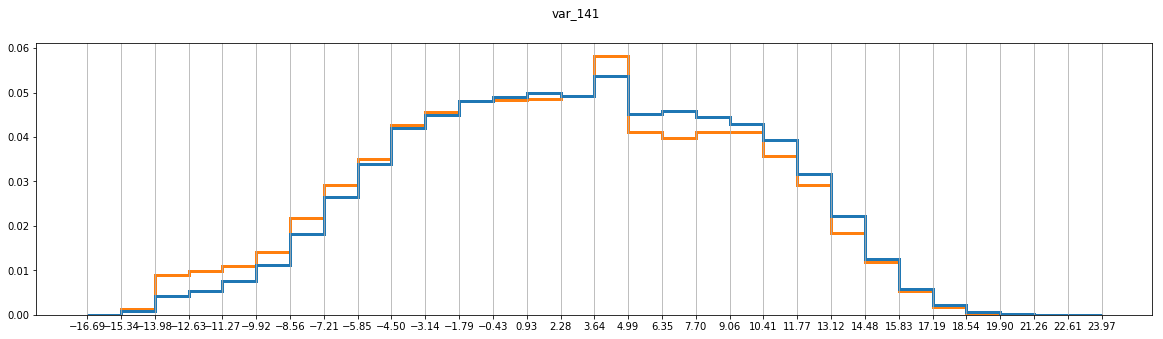

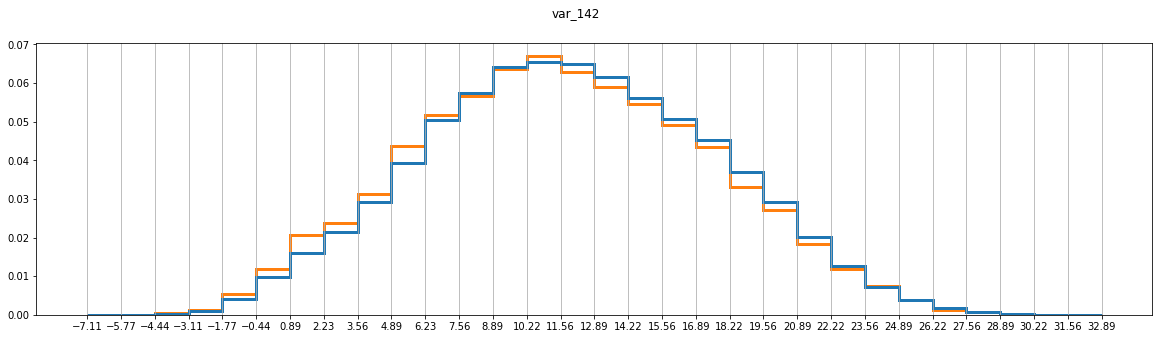

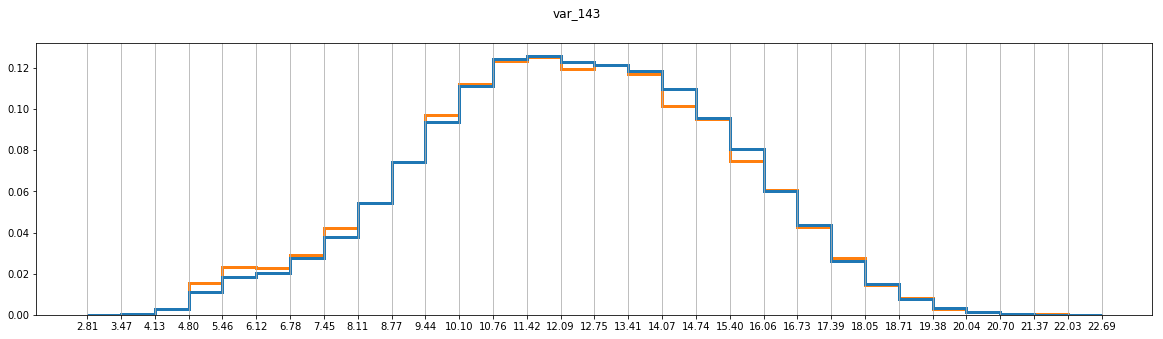

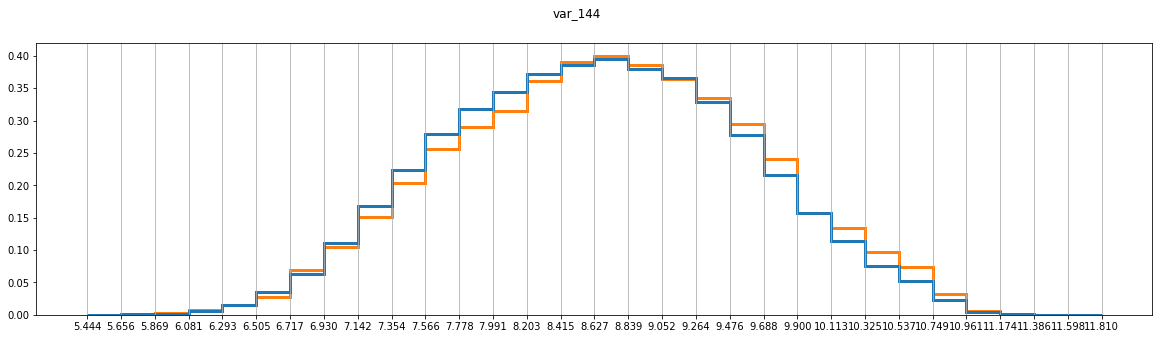

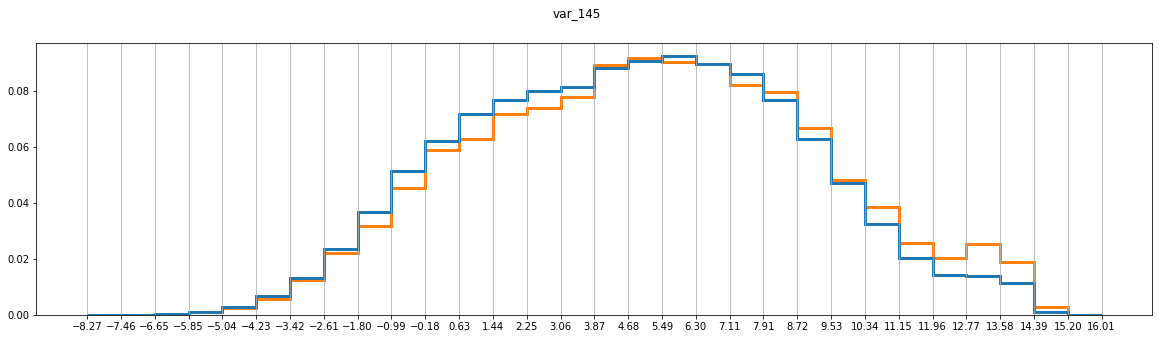

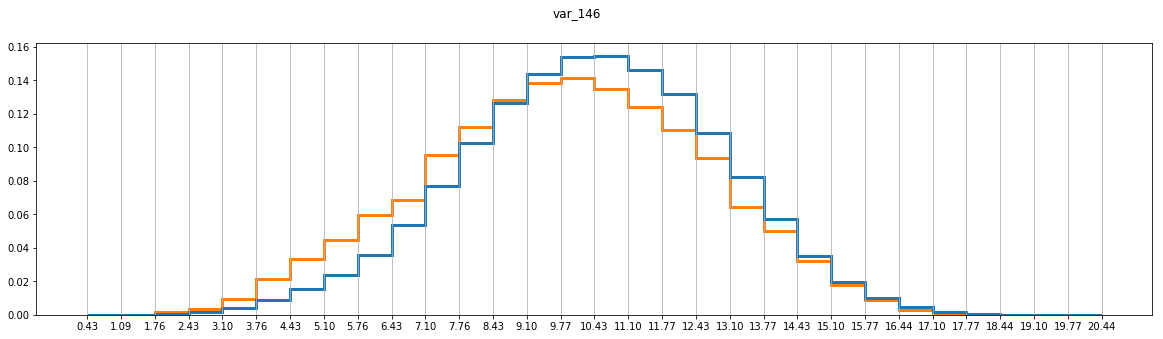

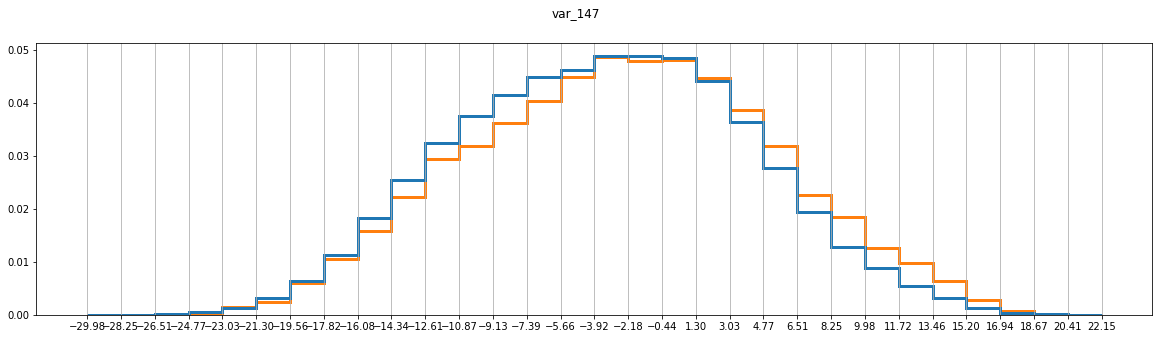

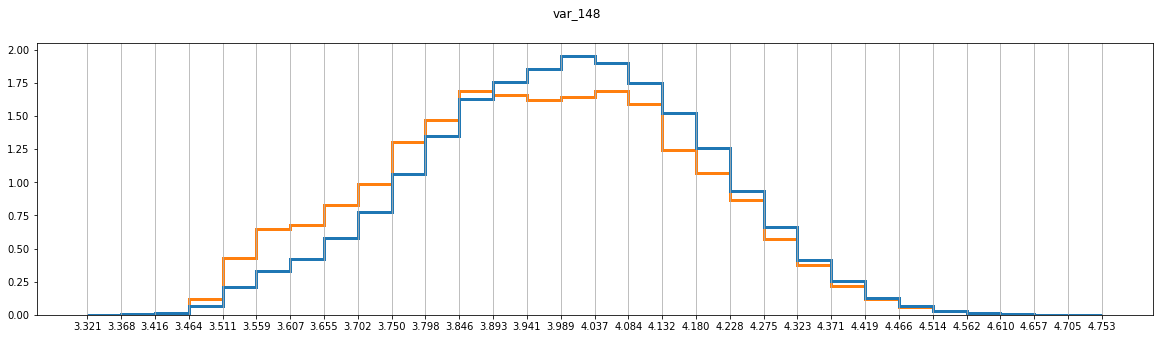

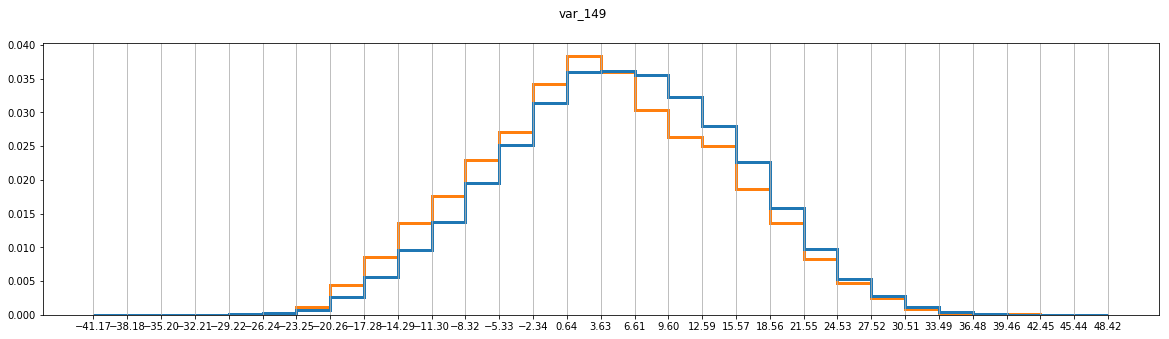

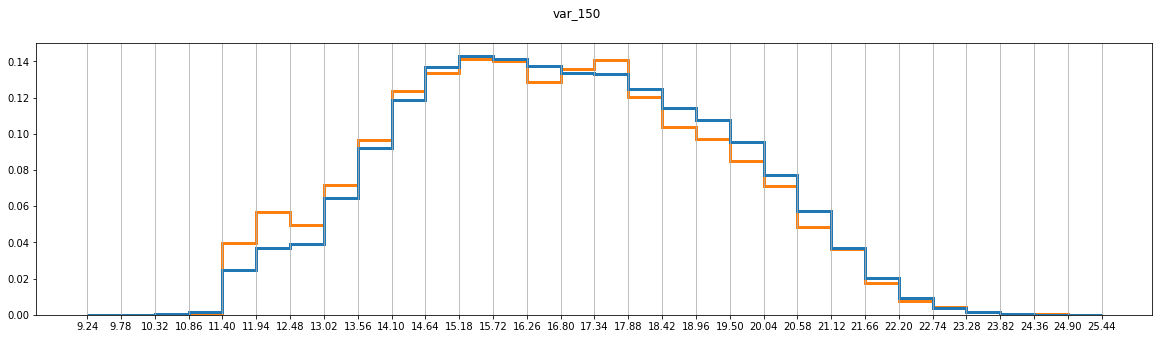

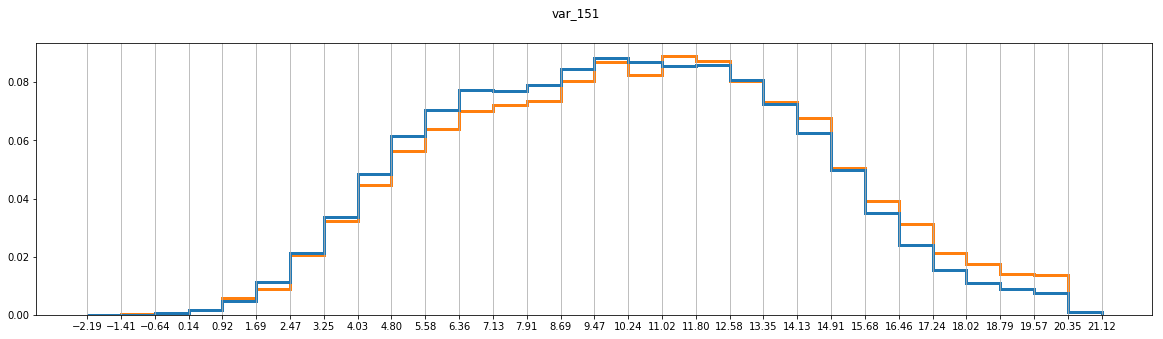

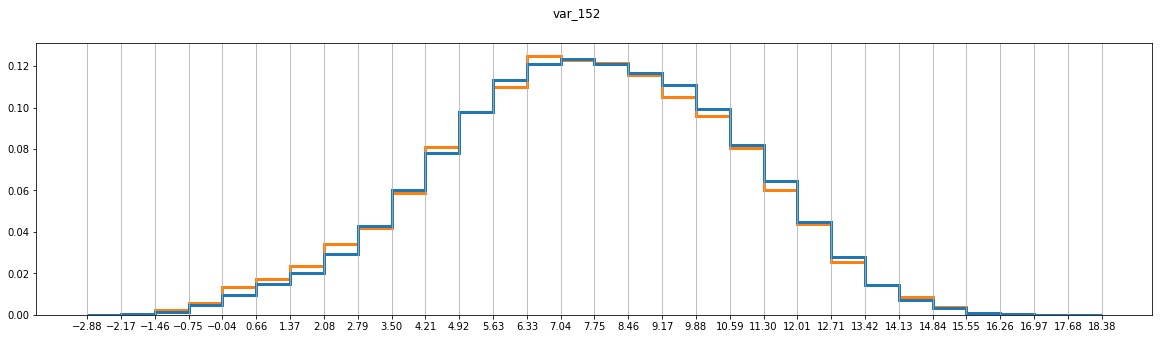

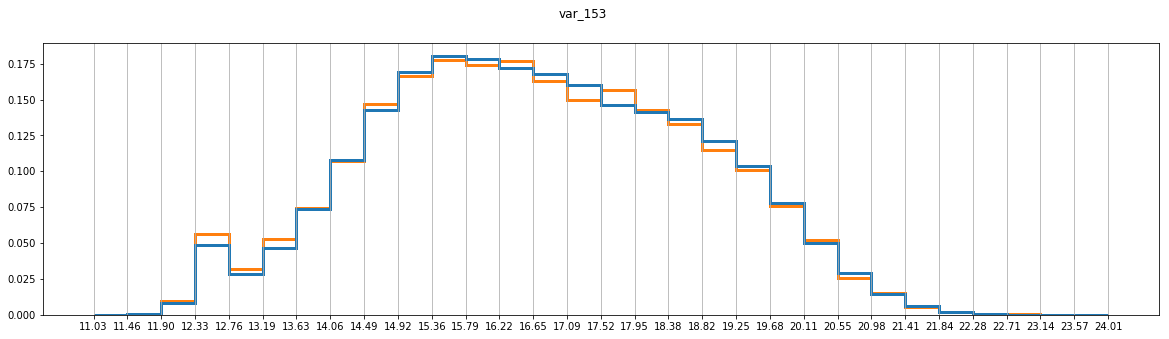

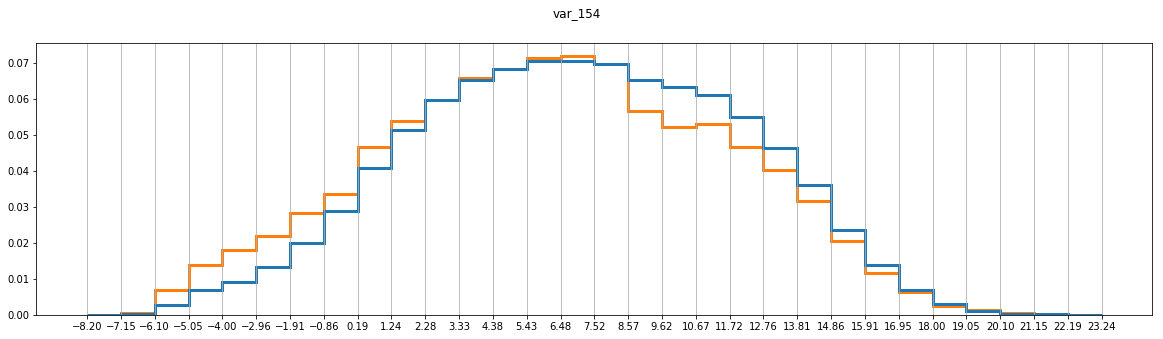

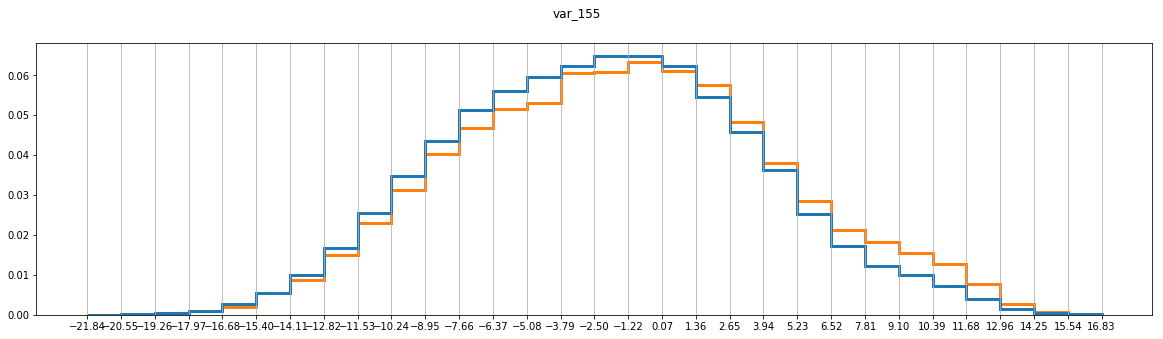

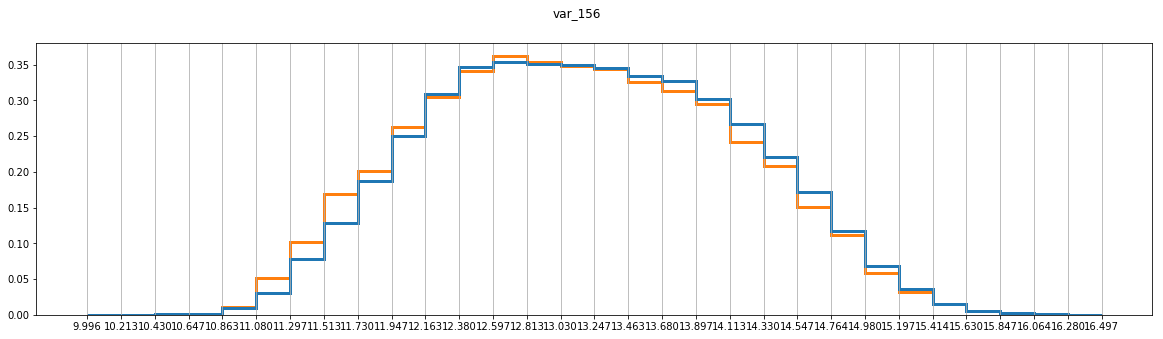

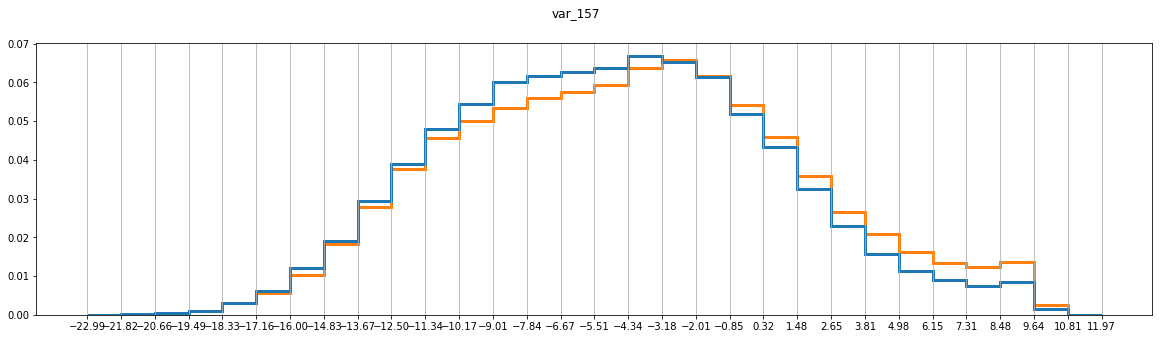

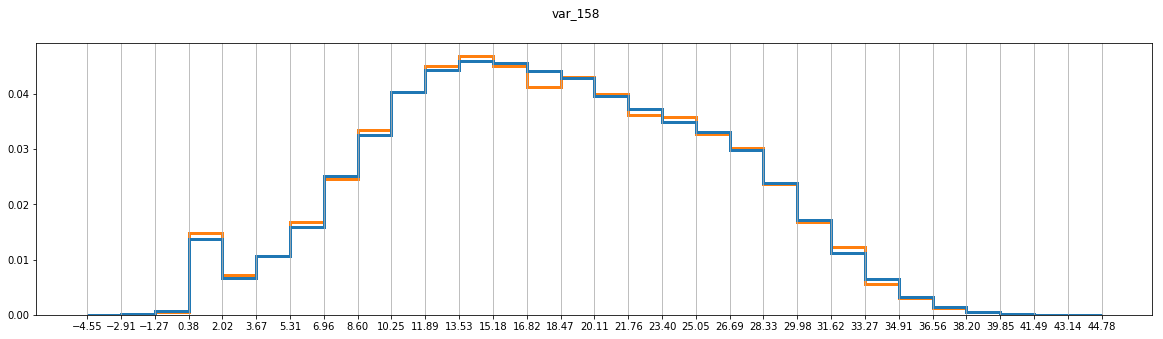

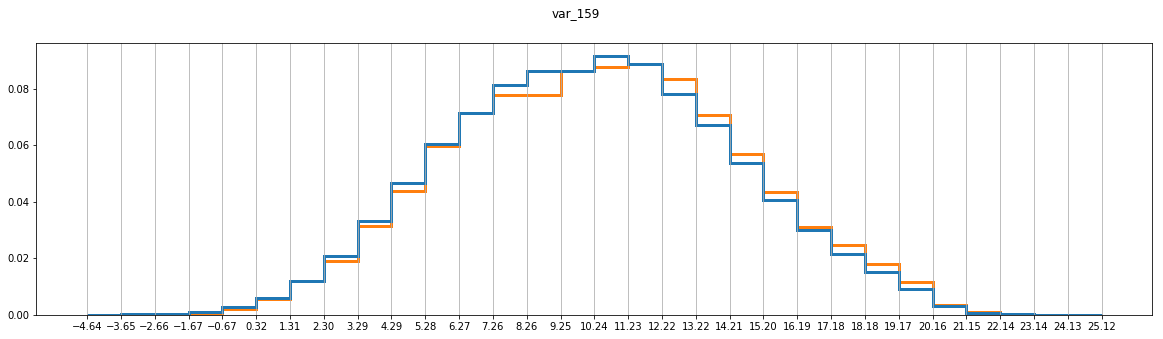

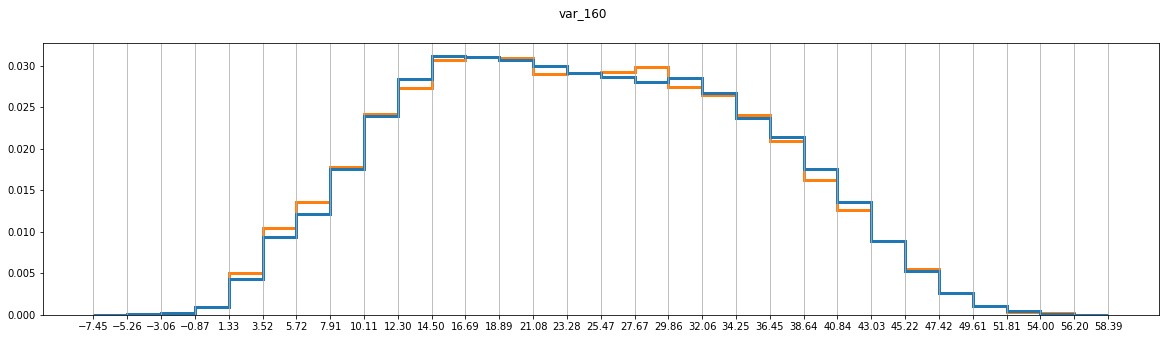

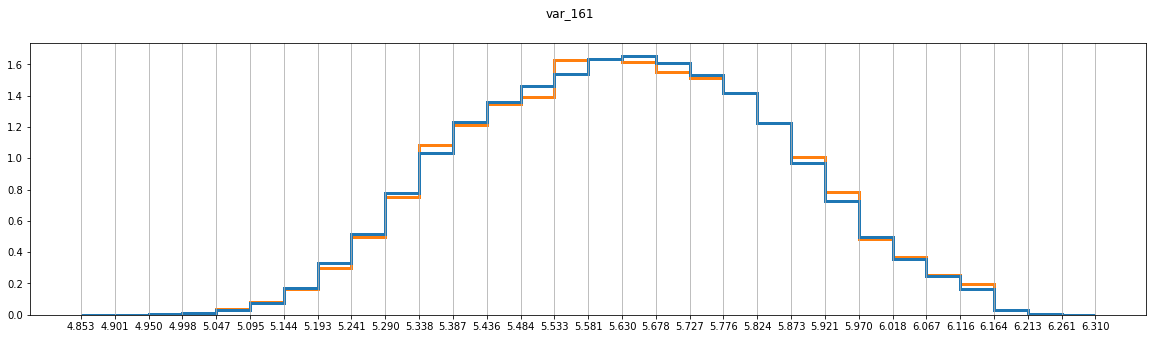

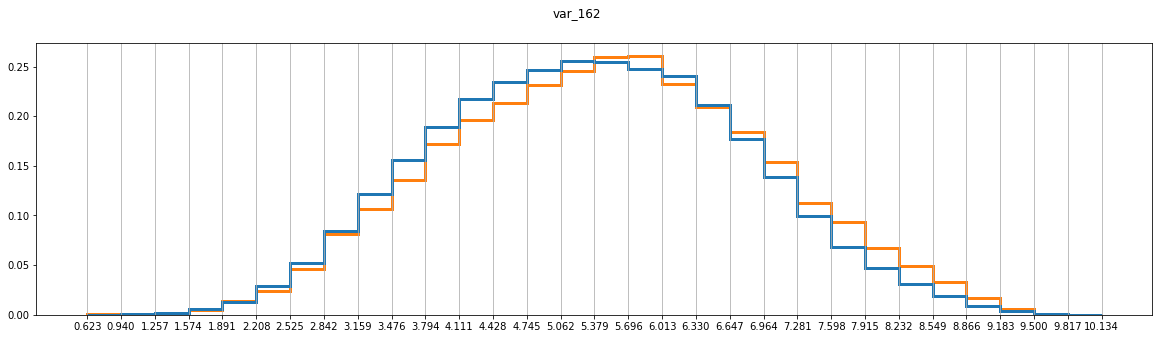

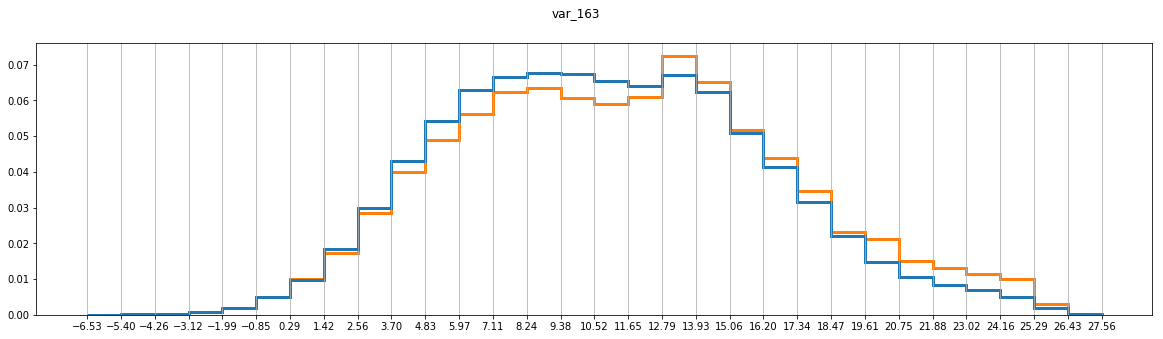

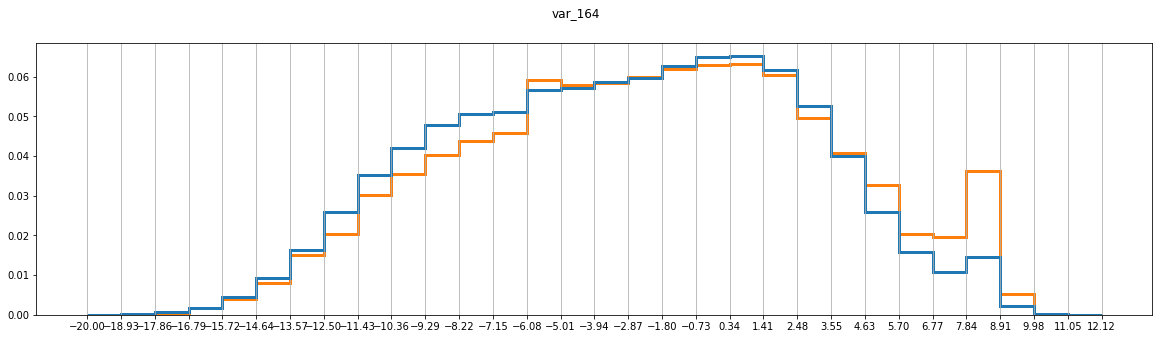

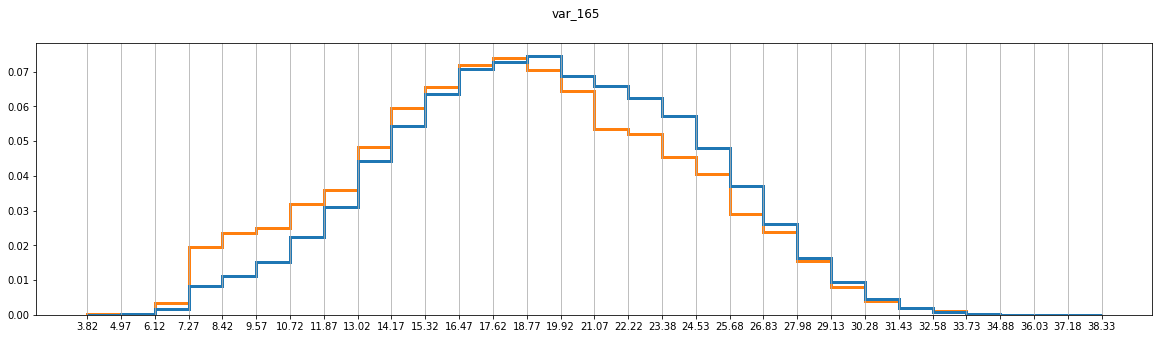

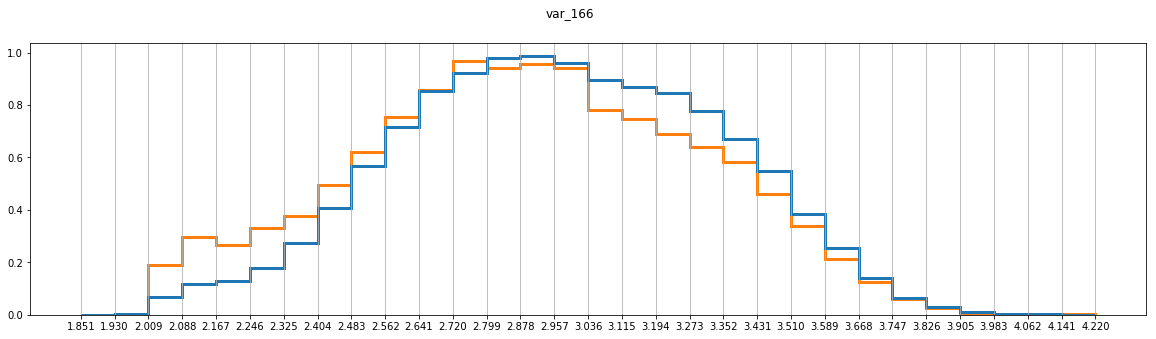

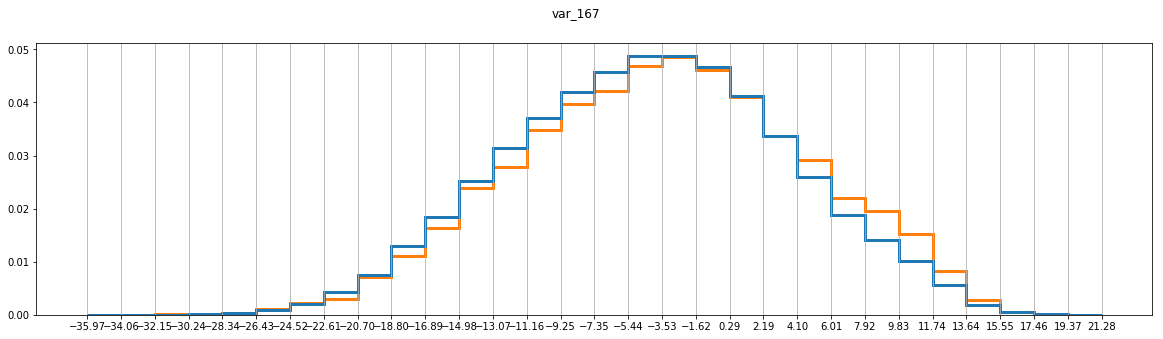

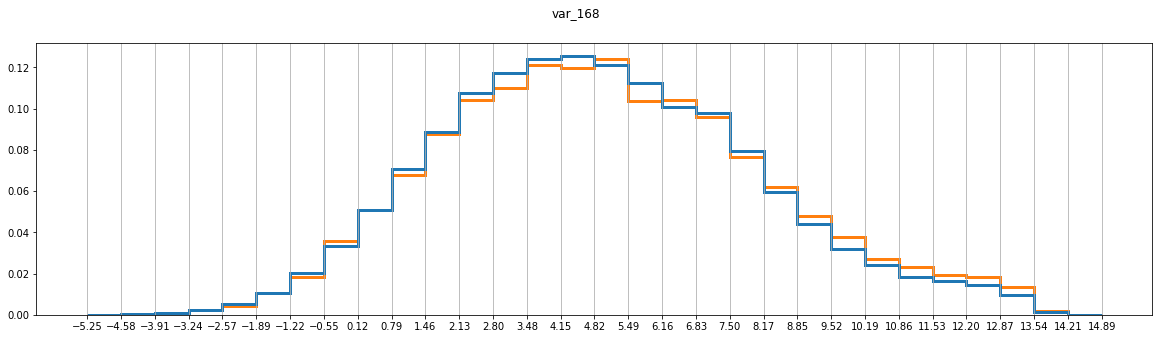

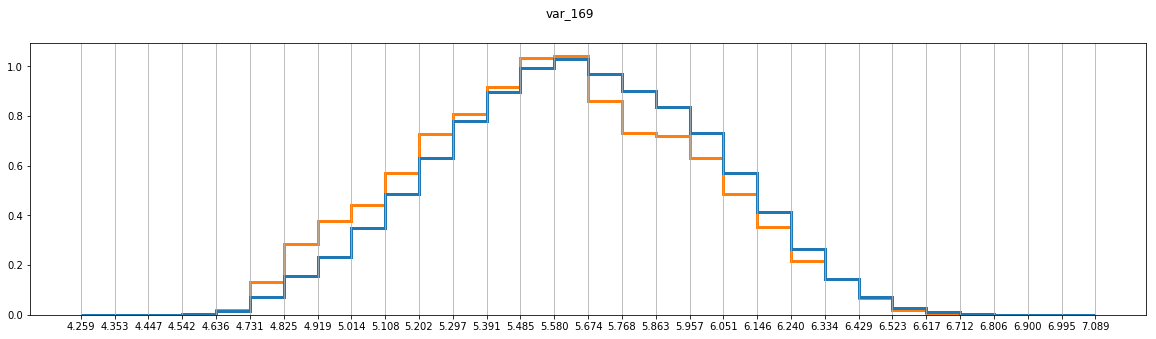

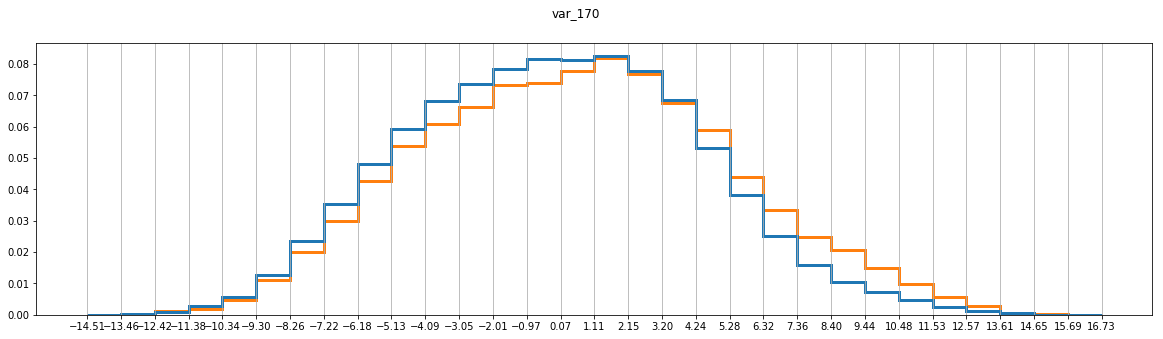

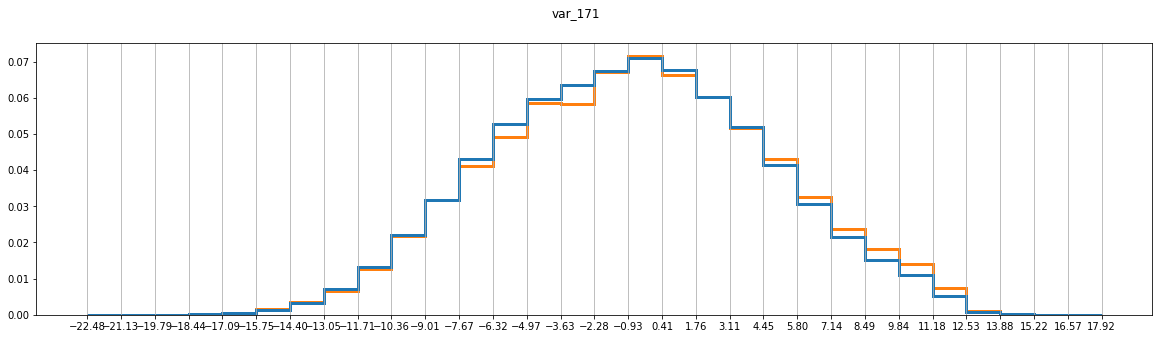

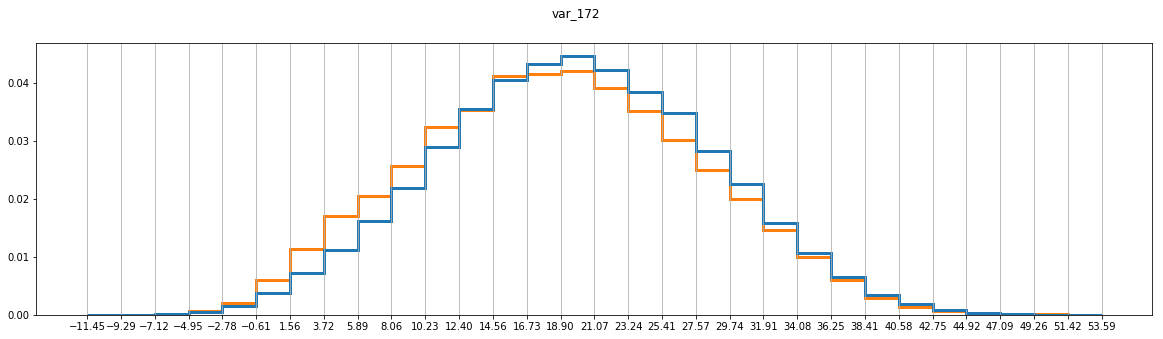

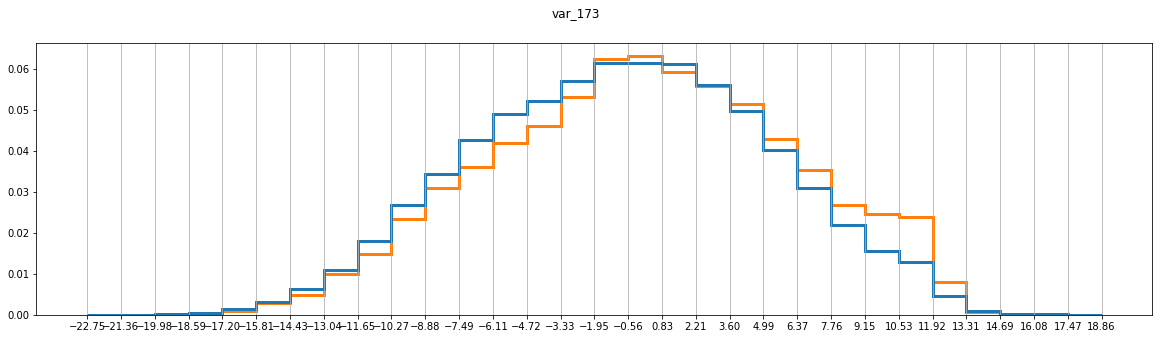

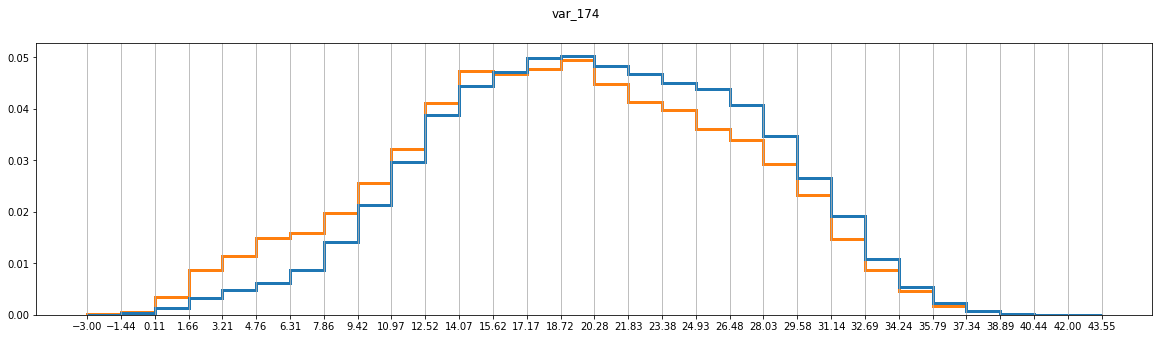

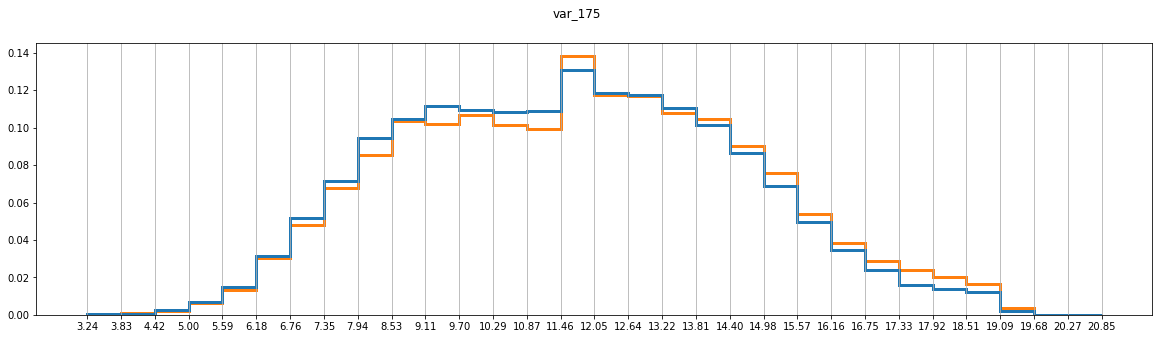

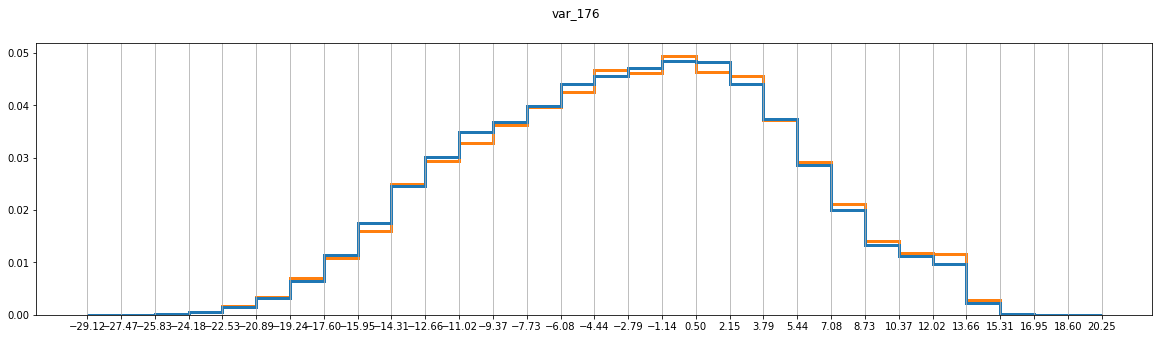

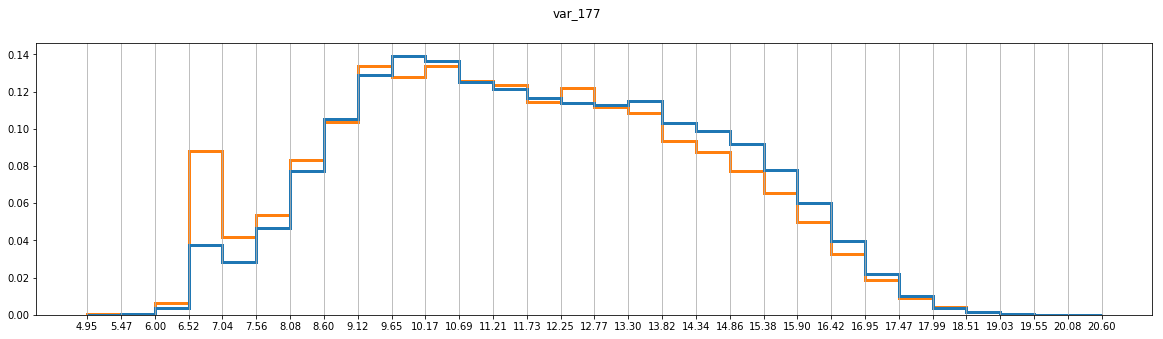

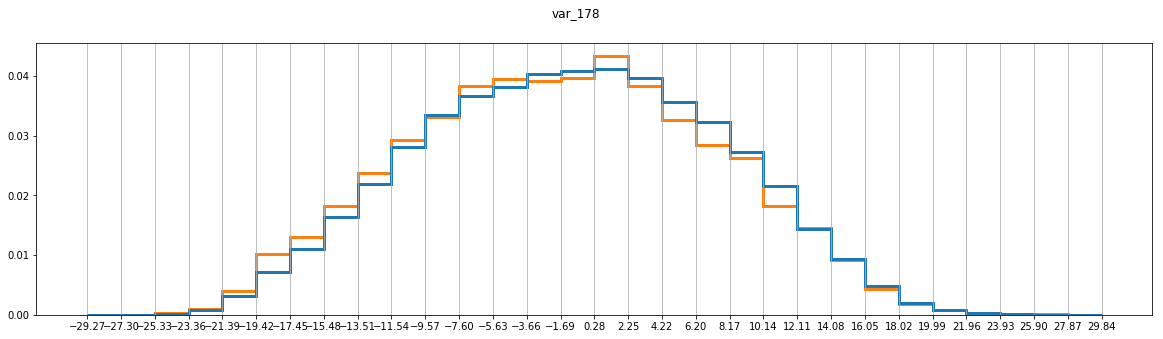

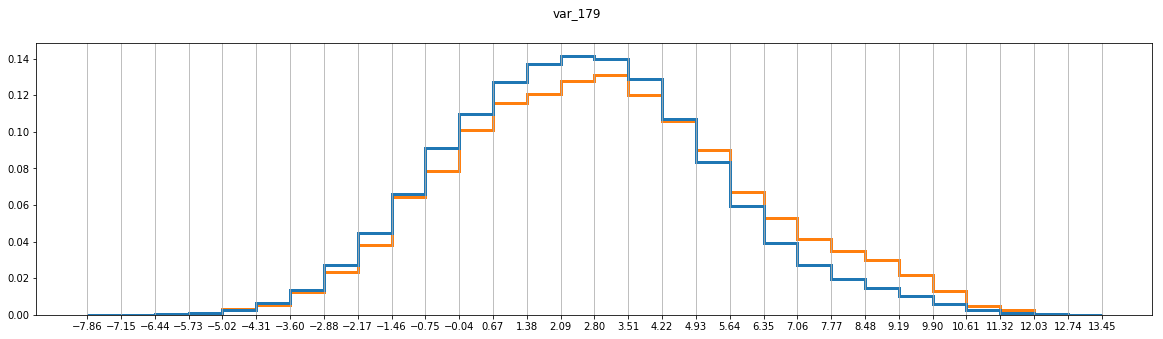

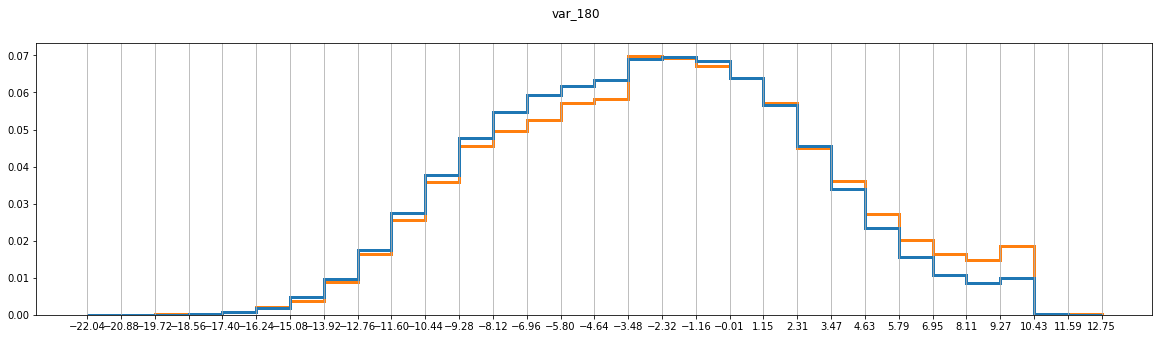

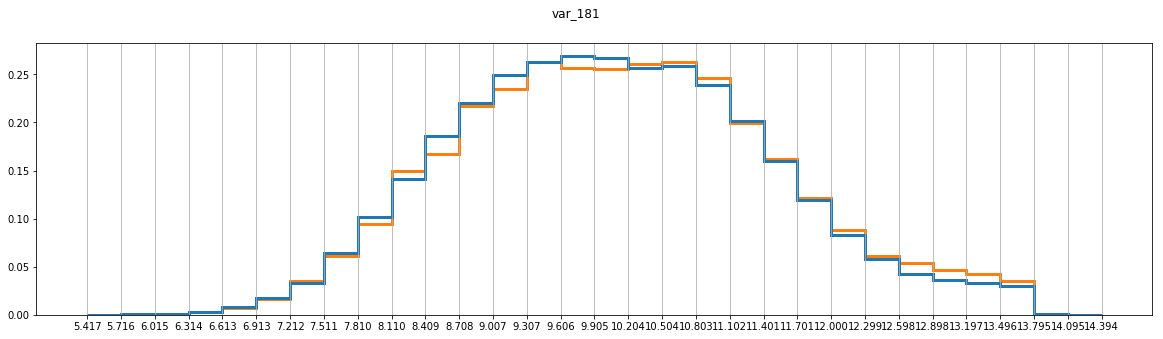

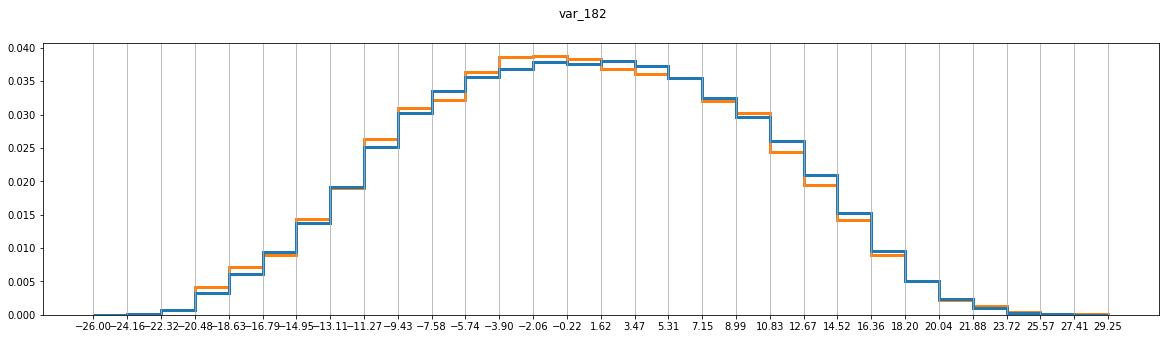

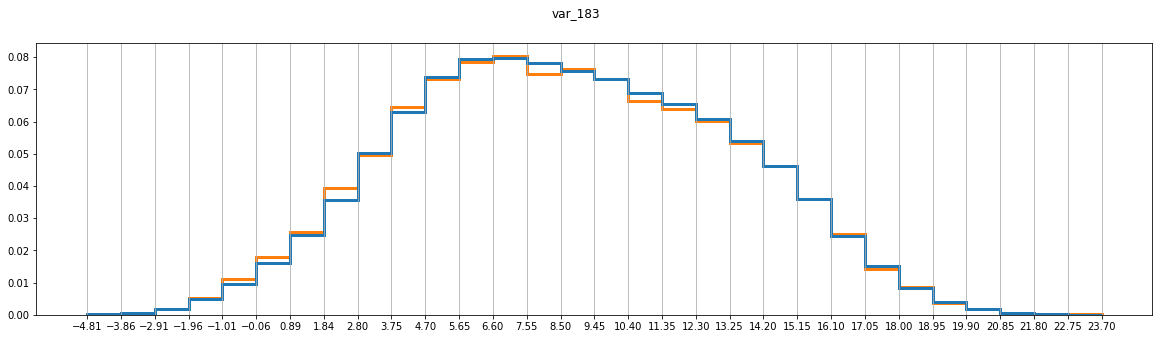

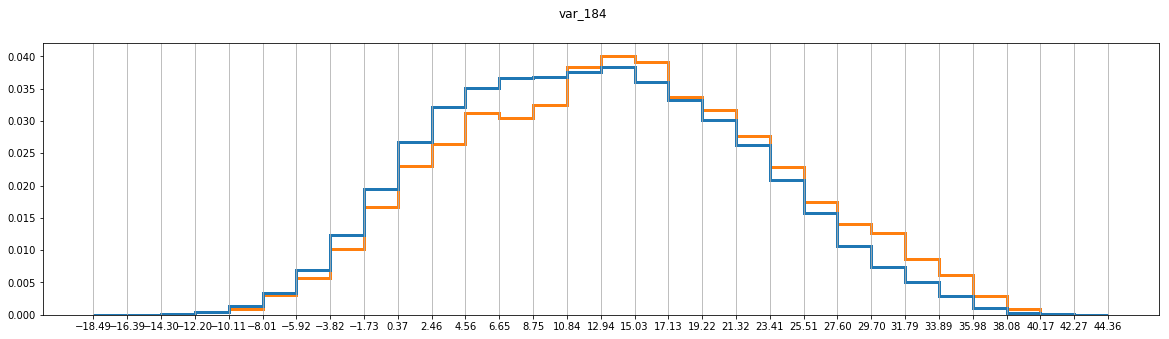

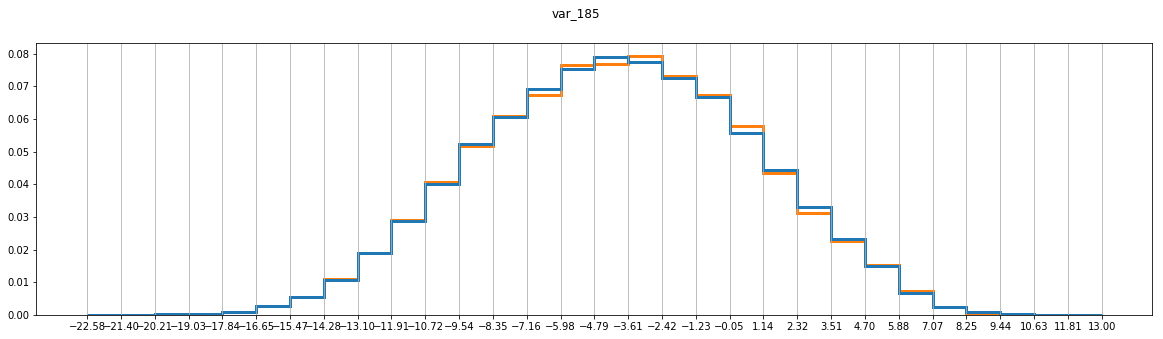

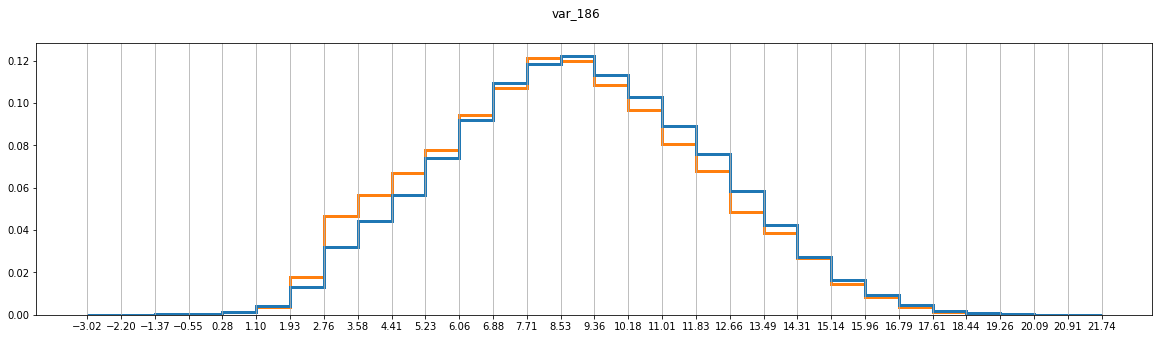

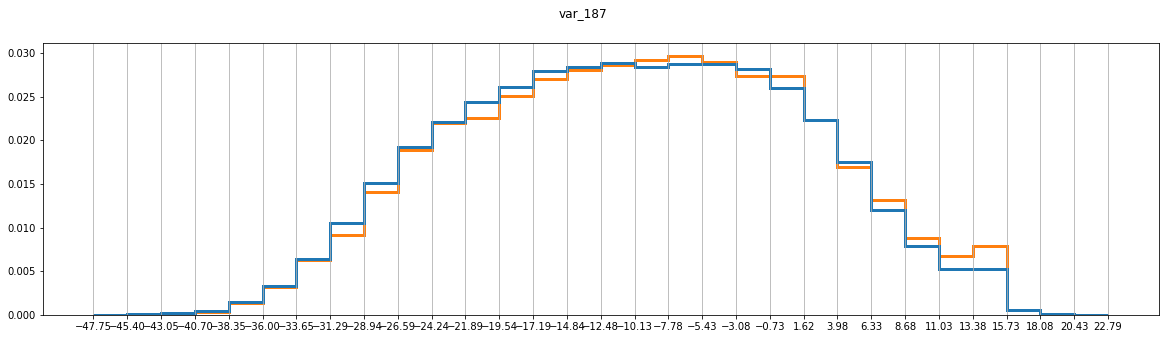

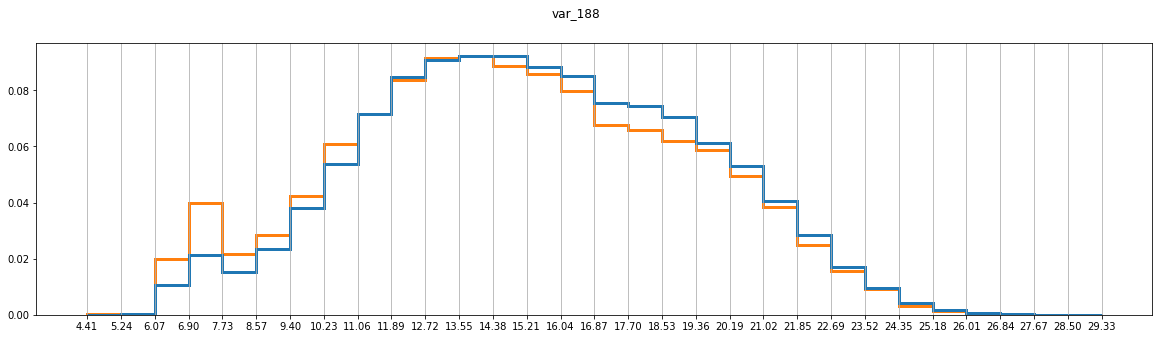

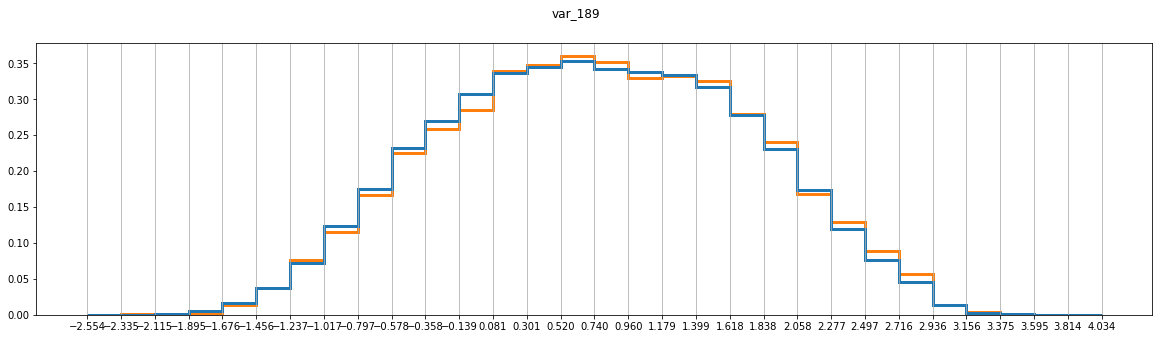

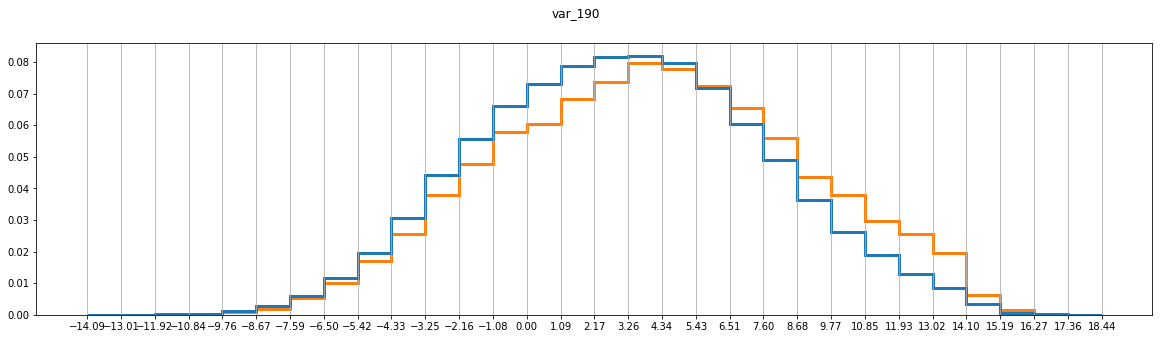

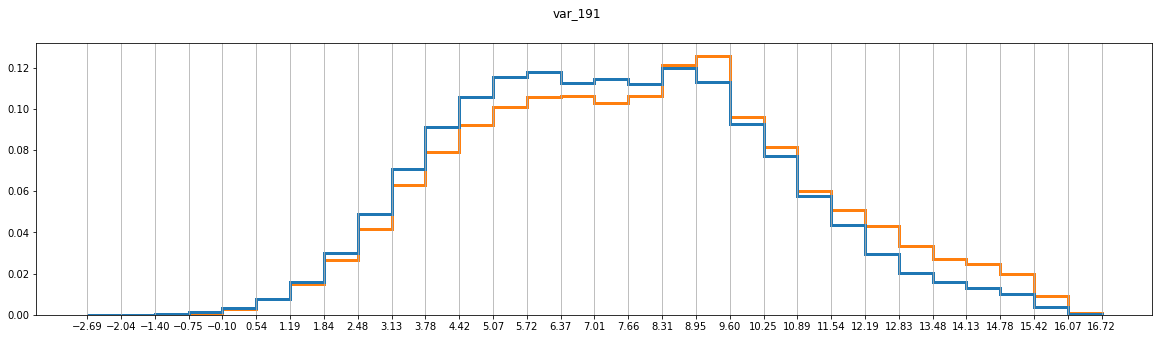

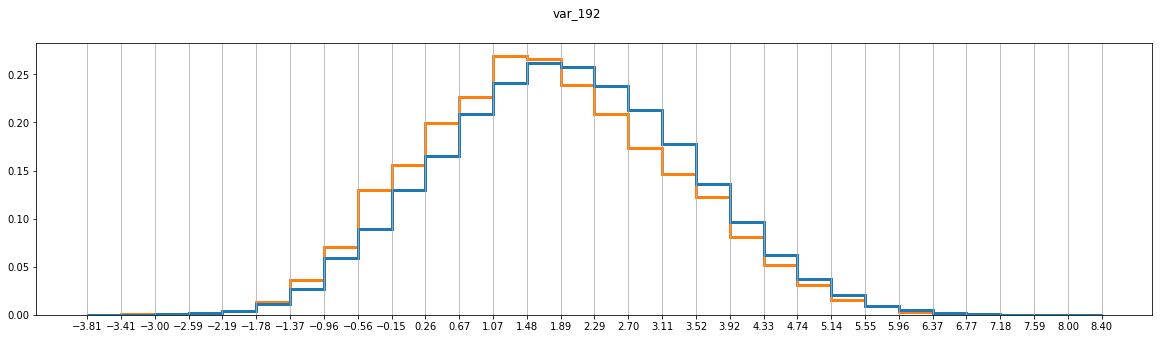

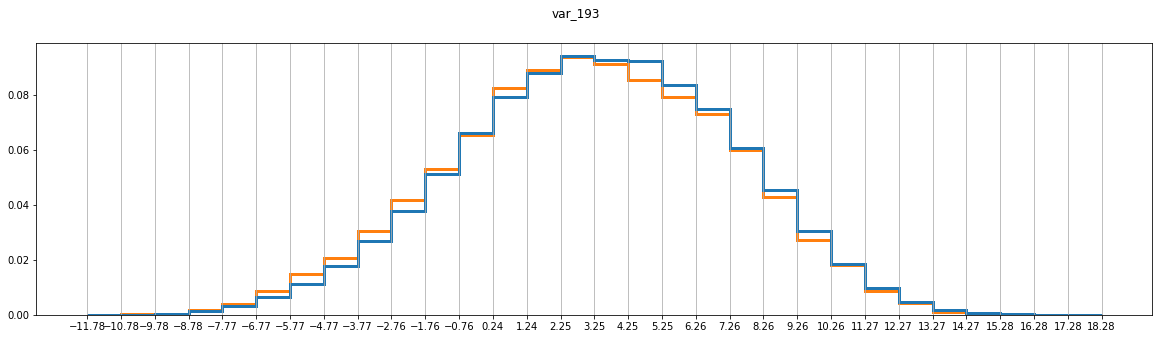

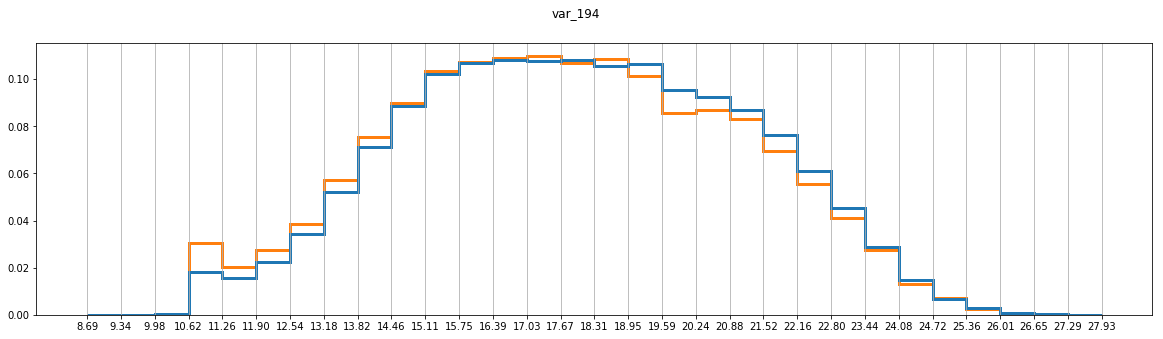

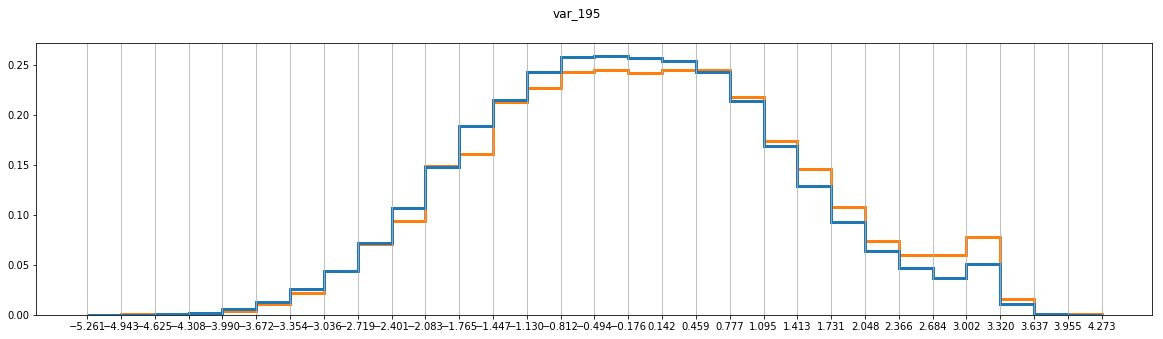

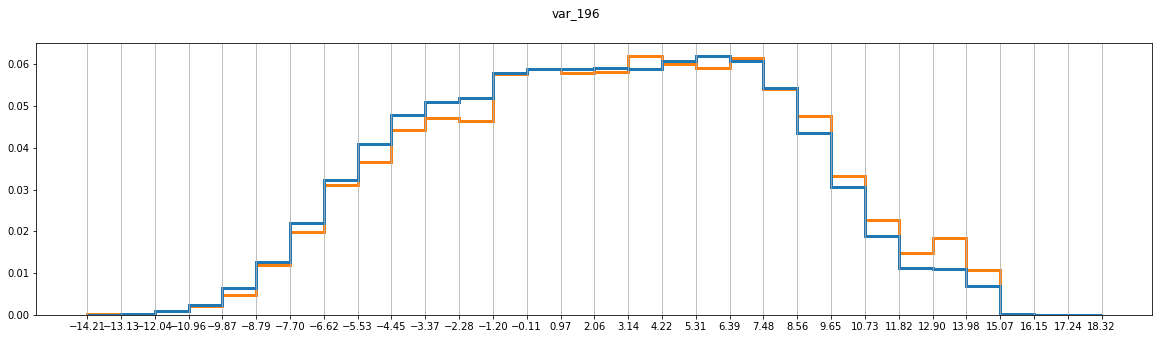

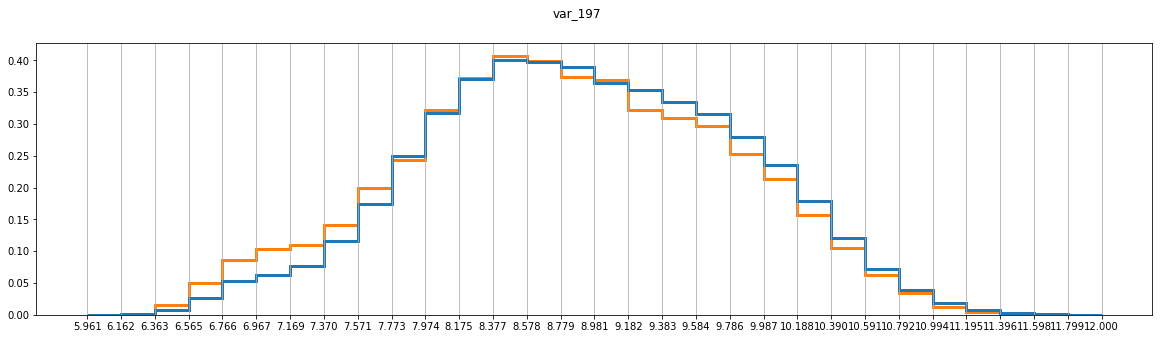

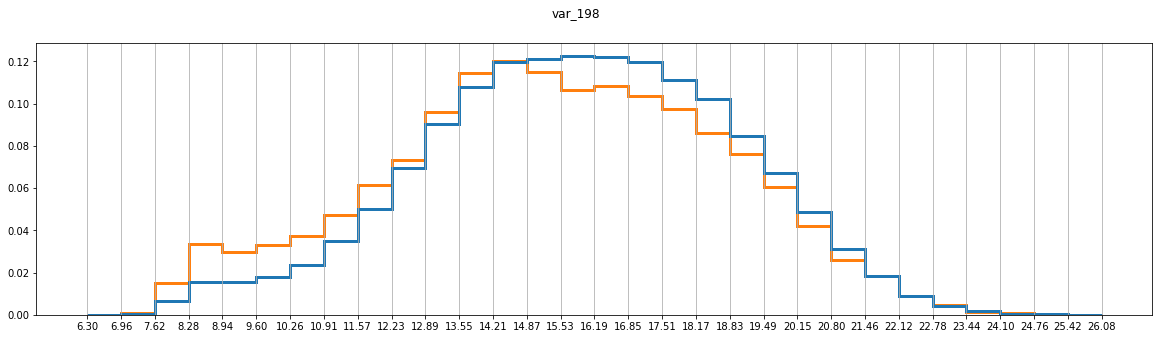

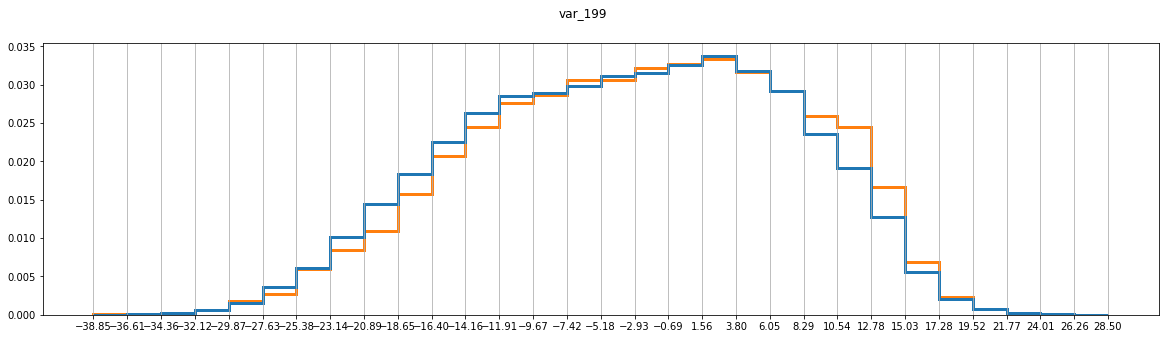

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

for idx, feature in enumerate(train.keys()):
    if idx==0:
        continue
    negData = train.loc[train['target'] == 0][feature]
    posData = train.loc[train['target'] == 1][feature]

    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData], 
                                  bins=30, 
                                  density = True, 
                                  histtype='step', 
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)

    fig.show()
    plt.show()

# 0 and 1 distributions in outlier features
Inspired from [Nikhil Bhatewara](https://www.kaggle.com/nick2logan)'s kernel [EDA_outlierRemoval](https://www.kaggle.com/nick2logan/eda-outlierremoval)

In [3]:
def IQRoutlier(data):
    b1 = data.quantile(0.25)
    b2 = data.quantile(0.75)
    IQR = b2 - b1
    lower,upper = b1-(1.5 * IQR), b1+(1.5 * IQR)
    return lower,upper

In [4]:
lowlimit=[]
highlimit=[]
for idx, feature in  enumerate (train.keys()):
    if idx in [0, 1]:
        continue
    lower,upper = IQRoutlier(train[feature])
    lowlimit.append(lower)
    highlimit.append(upper)
        
train['lowliercount']=0
train['highliercount']=0

for idx, feature in  enumerate (train.iloc[:,:200].columns):
    if idx in [0, 1]:
        continue
    train['lowliercount']  = np.where(train[feature] < lowlimit[idx], train['lowliercount']+1, train['lowliercount'])
    train['highliercount'] = np.where(train[feature] > highlimit[idx], train['highliercount']+1, train['highliercount'])

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


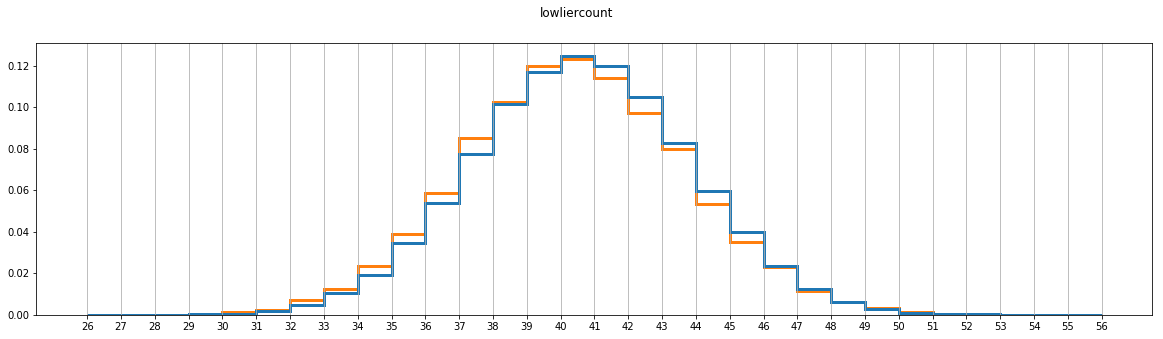

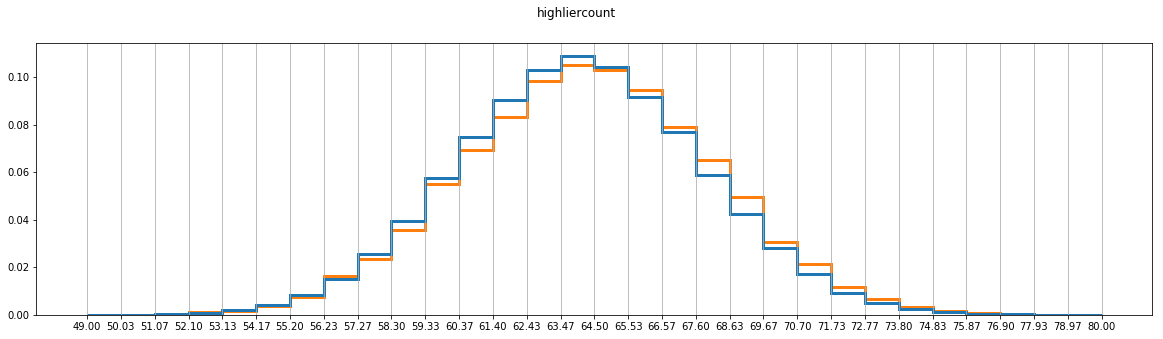

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

feature_name = ['lowliercount', 'highliercount']

for feature in feature_name:
    negData = train.loc[train['target'] == 0][feature]
    posData = train.loc[train['target'] == 1][feature]

    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData], 
                                  bins=30, 
                                  density = True, 
                                  histtype='step', 
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)

    fig.show()
    plt.show()

# 0 and 1 distributions in additional features
Inspired from [Youri Matiounine](https://www.kaggle.com/ymatioun)'s kernel [Santander linear model with additional features](https://www.kaggle.com/ymatioun/santander-linear-model-with-additional-features)

In [6]:
idx = features = train.columns.values[0:200]
for df in [train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


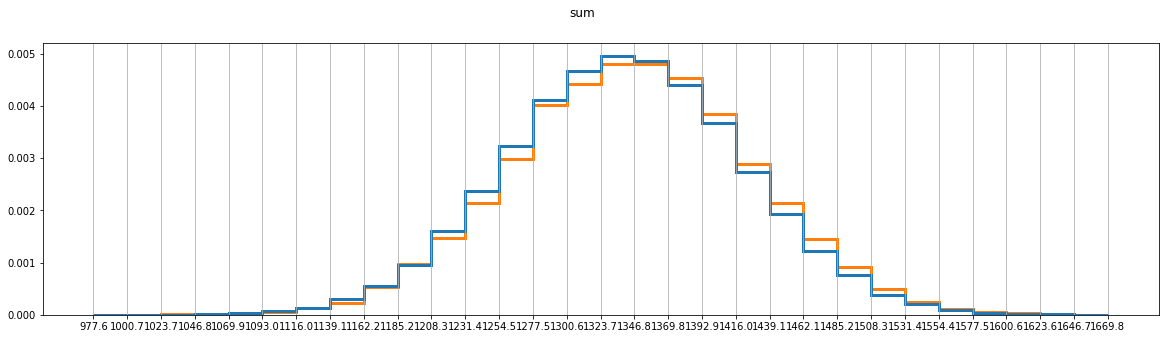

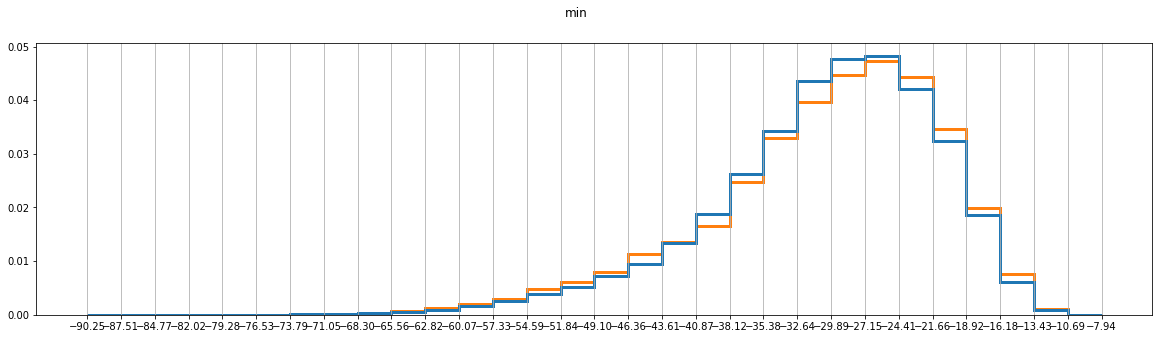

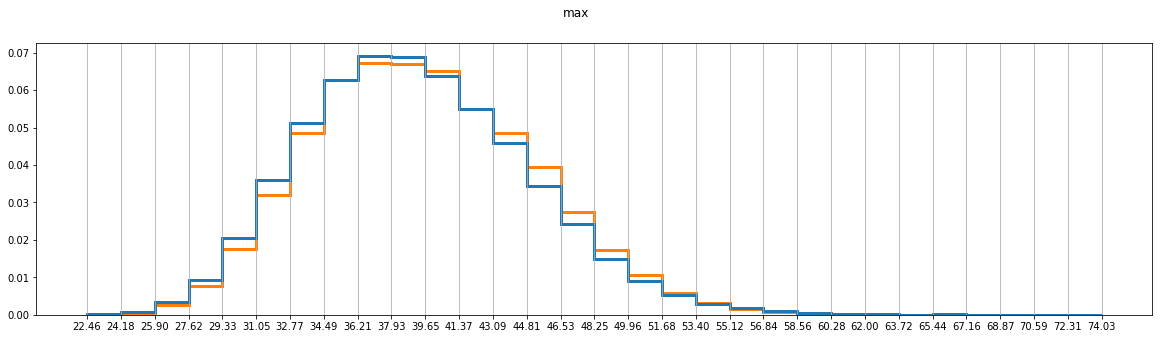

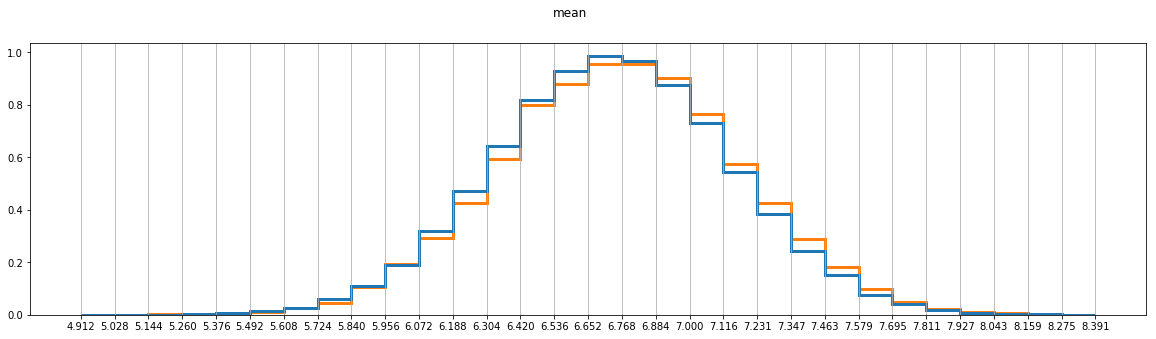

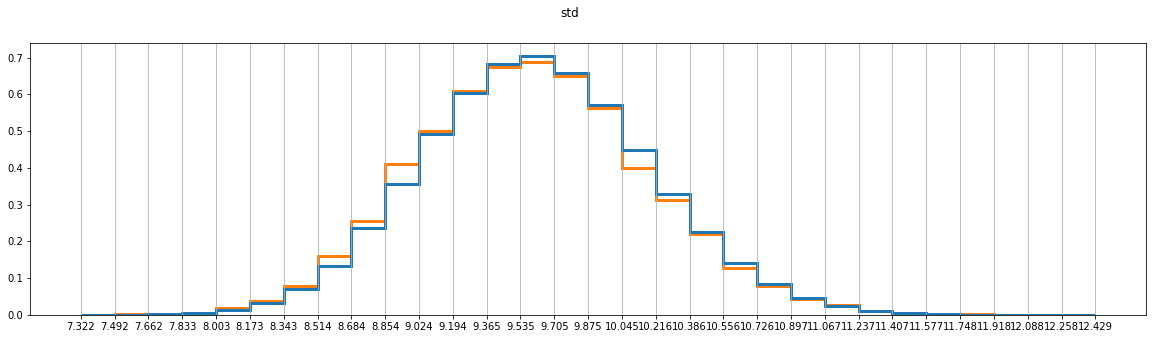

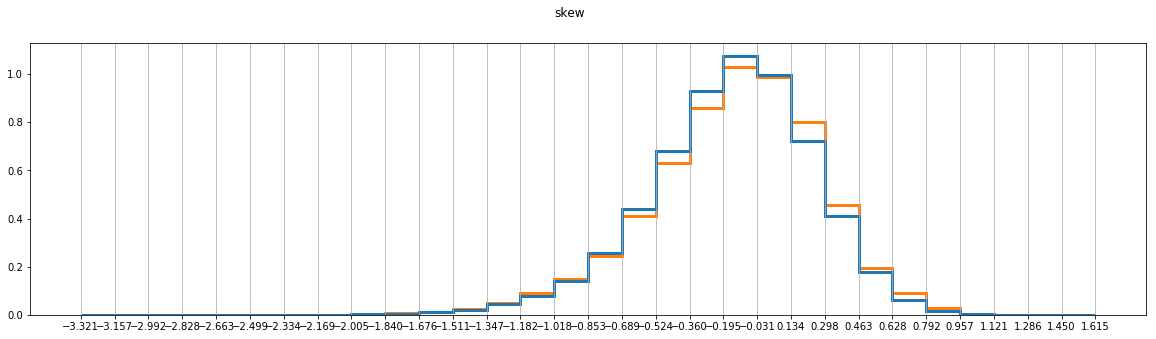

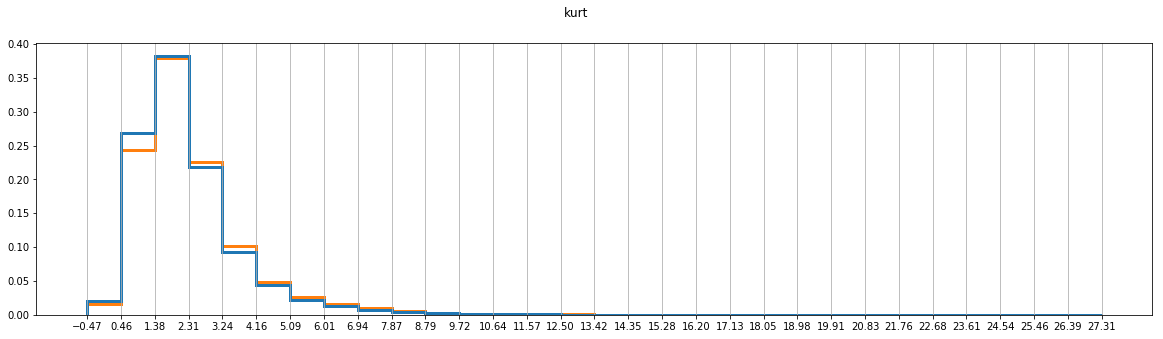

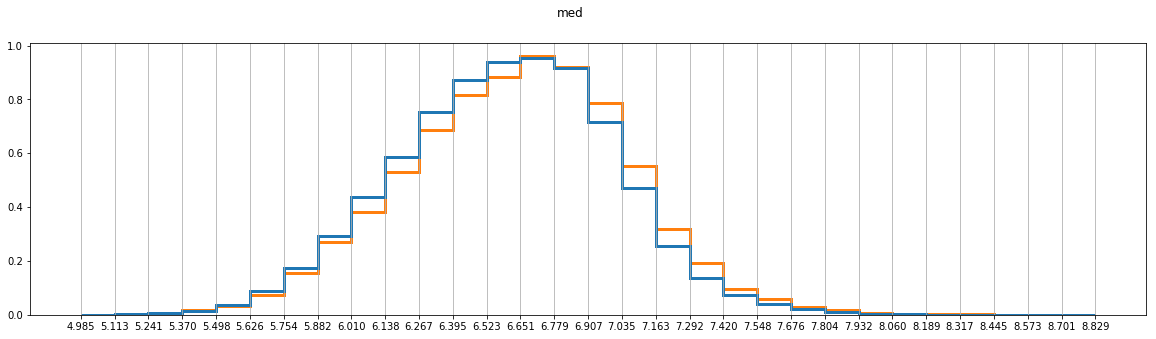

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

feature_name = ['sum', 'min', 'max', 'mean', 'std', 'skew', 'kurt', 'med']

for feature in feature_name:
    negData = train.loc[train['target'] == 0][feature]
    posData = train.loc[train['target'] == 1][feature]

    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData], 
                                  bins=30, 
                                  density = True, 
                                  histtype='step', 
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)

    fig.show()
    plt.show()